In [64]:
import os
import pandas as pd
import numpy as np
import mpu
from pyproj import Proj
from shapely.geometry import shape
from scipy.stats import entropy


# VENUES GEO SPAN

In [11]:
city            = 'london'
outfolder       = '../ProcessedData/' + city + '/'
relevant_venues = list(set([line.strip().split('\t')[0] for line in open(outfolder + '/venues_info/venues_ward_full.dat') if 'venue' not in line]))


In [13]:
### get the user list of the venues
venues_users = {}

for ind, line in enumerate(open(outfolder + '/venues_info/london_venues_users.dat')):
    #if ind == 10: break
    fields = line.strip().split('\t')
    venue = fields[0]
    users = fields[1:]
    
    venues_users[venue] = users

In [24]:
### get users coordinates
eps       = 0.01
mins      = 3
LIMIT_num = 0
outroot   = '../ProcessedData/' + city + '/'
infile    = outroot + '/user_homes/centroids_filtered/' + city + '_user_homes_dbscan_' + str(eps) + '_' + str(mins) + '_' + str(LIMIT_num) + '_filtered.dat'


users_location = {}

for line in open(infile):
    user, lng, lat = line.strip().split('\t')
    users_location[user] = (float(lng), float(lat))

In [15]:
venues_users_coordinates = {}

relevant_venues = set(relevant_venues)

for ind, (venue, users) in enumerate(venues_users.items()):
    
    if venue in relevant_venues:
    
        #if ind == 10: break
        for user in users:
            if user in users_location:
                if venue not in venues_users_coordinates:
                    venues_users_coordinates[venue] = [users_location[user]]
                else:
                    venues_users_coordinates[venue].append(users_location[user])
      

In [16]:
venues_coordinates = {}

for ind, line in enumerate(open(outfolder + '/venues_info/venues_ward_full.dat')):    
    if 'venue' not in line:       
        #if ind == 10: break
        venue, lng, lat, ward, lng0, lat0, lng1, lat1, length, area = line.strip().split('\t')      
        venues_coordinates[venue] = (float(lng), float(lat))      

In [17]:
venues_w_coordinate_users = []
venues_geostretch_feats   = {}

for ind, (venue, users) in enumerate(venues_users_coordinates.items()):
    
    venuelng, venuelat = venues_coordinates[venue]  
    venues_w_coordinate_users.append(len(users))
    distances          = [mpu.haversine_distance((userlat, userlng ), (venuelat, venuelng)) for (userlng, userlat) in users]
         
        
    social_stretch = 1.0 / len(distances) * sum(distances)
    social_std     = np.std(distances)
    
    
    polygon  = 0
    lat, lon = zip(*users)

    if len(lat) > 2:

        pa      = Proj("+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")
        x, y    = pa(lon, lat)
        cop     = {"type": "Polygon", "coordinates": [zip(x, y)]}
        polygon = shape(cop).area / 1000000.0
    
    
    print venue, polygon
    if venue not in venues_geostretch_feats:
        venues_geostretch_feats[venue] = {}
    venues_geostretch_feats[venue]['social_stretch'] = social_stretch
    venues_geostretch_feats[venue]['social_std']     = social_std
    venues_geostretch_feats[venue]['polygon']        = polygon

   
df = pd.DataFrame.from_dict(venues_geostretch_feats, orient = 'index') #, columns = ['Llikecount'])
df.to_csv(outfolder + 'venues_info/' + city + '_venues_geo_features.csv' , sep = '\t')    


4bd5c35e29eb9c74b9dc93e1 1.06133827168
4e4cdd6e18a822288dd7706a 0
4cbadba60180721e6d5e9c61 0
4ade3b73f964a520217421e3 7.06948295376
4beec861e24d20a121587314 0
51b31b74498ee782ec519a33 0
4c91e73051d9b1f758358446 39.5459456153
4fb14b50e4b0c546fb6cd55e 0
502e5024d86cfb1f6f465f7b 0
4ac518daf964a520c9a820e3 3.60327530253
4bbb8c3f51b89c743a5a862a 5.22092707518
506999623d7cfe42e733a747 4.35877296716
51237f0fe4b0b01f1da86578 0
4b73fa13f964a52054c22de3 0.0967712310604
4fcb914de4b08a365364f737 0
4cb9f53c035d236af64fd74e 21.9642826617
4c0d0f46b1b676b09ff7df86 0
4bfa3a915317a593f161027f 0.0659191657204
4b7a702ef964a520e22c2fe3 0.939304539897
53983a83498ed180c0a78ae1 0
4bfbb9d3d2b720a1594c336a 11.1349599421
4d6d39defcde2c0feeed8b81 0
56e42aaf498eb4f0dcd9e385 3.51999575887
4ad082f3f964a52048d820e3 6.84582876037
4cc2ca3682388cfacdbe6235 0
4ee9be90be7b7263d9e721e3 0
564a0193498efa22fad80838 2.72867842824
526a7bb811d215abdcba1e47 0
4c14bc2582a3c9b6bdb0fdf8 4.26602915318
4bf69f229abec9b6301a26e8 0
4b530

56754b87498eed3ca698eafd 8.7513529552
5081a488e4b0073ffa767996 0
4d5edd3114963704589bcf94 26.2649575911
4fb25817e4b0f8eb2a19524b 0
571b987e498e8504cebafded 0
57092a9a498e19b1dcca06b9 0
4c877dcab231b60c6d9519ec 0
4adffd4cf964a520127e21e3 0
53c95ca1498eff10bcb16a59 0
59340aaef2905e1661e9facc 3.69453943681
4ac518d2f964a52045a720e3 40.2715167542
4ac518c5f964a520d2a420e3 1.73639103236
4e09ef8a6284d9ee92e5f663 2.98972370528
4ac518c5f964a520dca420e3 0
4f9c22b7e4b07e720d7787fd 0
51b08bee498e237396b85bfd 0
4b9fd9e8f964a520994437e3 0
54a708cd498e9722fa507bb5 4.00093417632
4c39f3710a71c9b69a4743c9 0
4b72a884f964a5207f822de3 0
4b8b7106f964a520939f32e3 0.0365715847529
50156302e4b08f147cf7f1f6 0
4e03be7f149509caec6f9fdd 0
4b0b01d3f964a5207b2b23e3 0
4cdc2cd5a1bba35d48df98e5 0
5019b5a73d7cb4a6b4f68166 0
500072a8582f784bd4d3276c 0
511aec5be4b0b9ae12de3020 0
4c94969872dd224b05429b91 0
592eb34a0d173f152ae6b1a2 0
55240362498e83f28bf0100a 0
4ad6e877f964a5205f0821e3 9.49989149095
4c6907b31226c9b6971cdaaf 0


4d5401b3f9f9b60cf08a29e6 0
4b2630f7f964a5200a7924e3 21.2547389957
52cbedef498e64ab5011bc2d 0
4e30255bfa7614797dea1d91 0
4f9b4d37e4b060642ec0da9d 0
4ac518dcf964a52038a920e3 0.04654575623
4ff87199e4b05ae52490ebf2 0
4e1225d11495c8d31bcd1140 0
50ec3149e4b0190389b63403 0
51d683d5498eeffbf43eaec4 0
4c7e2247d461a14343197ff5 0.0398001955261
4dfb93ebd4c01451df5929e7 0
52224a1211d26e3387378e1b 0
4b1a3107f964a5200ce823e3 0.280186259254
4c3c9bf57d002d7fb2a9ae18 0
4baf37a1f964a52094f13be3 0
53cecf73498e451ba5609488 0.903283380517
4bed4cdee3562d7f9fc5fef8 0
50c5371845b0cefa1cb0774c 0
5178e9ade4b076e1be555635 0.276769393898
4faa7504e4b05573314fff1a 0.800876033683
4f0ac93ee4b0ca3a5e9884fd 0
52ae0d9a11d2e830690363f6 0
4afc12cdf964a520ba1f22e3 19.0487365805
4adf8698f964a520767b21e3 2.2234726521
4cc6336ab2beb1f7b647274c 0
566334f5498e59f4a229c583 0
58bbddceaf7d17615e87a0f4 0
4bb4f21a310276b00193cf90 0
4c80d83f47cc224b063e769f 0
4ed4cbf7f790888b53d91dbf 0
578920f6498e94398f3c3a54 0.88486402091
4e3410c6fa7

4ac518e8f964a5207fab20e3 33.0157110518
4ba5556ef964a520e3fb38e3 0
4bab82e8f964a52022af3ae3 2.02693353589
55d9c981498e926c5a77c699 0
52d7f8cf11d235436dd14700 0
589494439398ab157a85eebb 0
4f4a4583e4b0d5cfa00bb790 0.777737120277
557797fa498e4c5e740e9f18 0
52dbf550498e37b47fc29a2a 0
5177a1ef19a9a7a0768ea464 0
4e2de9021495329632f56bf0 0
4d5cd5db9ac9a09377c77494 0
562cf785498e1f962737ae2f 0
4f55f163e4b06e95a3b00818 0
4d0716722f96f04d38272b54 0
51782148e4b0075e45b5f26e 0
4cac64a214c33704ce86ef3b 0.0
4bbdfbf98a4fb713aea13d9d 0.318995114951
4ad7a8ddf964a520650d21e3 29.0846999073
4d23a3a62ac6f04db59f2e45 16.0343166036
57052fed498eecd5fe8a551e 0
4de7767dd4c0086a950a19d5 0
55be4438498e7982576ff483 0.384502361321
4d934f787b5ea143e967c5b8 0.859145757285
4bc78b2093bdeee1867f37ae 0
54d4d597498ea948f6083b4c 3.03745935482
4c8fd06fde3d236a94956618 3.53563054365
4d8b842f401a224bf0f8b818 0
4ceb9f0dfe90a35d40f3530e 0
4ae1a19bf964a520818621e3 2.64968751543
4ed7879161afca7b258501e5 0
4c626e35de1b2d7f4038e270 

4b63f635f964a520dd982ae3 2.48710902238
520f46aa11d24aeb1586d82f 0
4b1aace1f964a52014ef23e3 38.7620860192
4ceea0397b9437043e7e2e53 0
4f71d4ef7beb1d18abca9cce 0
5800e450498eb504409e0572 0
4dbfef286e8124d25dc099be 0
4eb31ec6e5fa7306e7c3e17d 0
51a0c19b498e0c5aa8a86c48 0
4ad21f70f964a52082df20e3 1.75964247744
4d887f77f607a093e5e8d686 0
537da0c7498e9e9e015cbde2 0
4fac34a7e4b03481b4ecb38b 0.300804636563
4e9dbb41b803b7506dbda681 0
507994c4e4b0ef94ac706fbd 0
5261511311d2d7cfe4189803 2.47907316879
4c5ad51df54376b02ae1848b 0
50741cf7e4b0cfa6345097fb 0
4e10835822713f7d7bc8b1fd 0
524d27d1498ed1702d912f92 0
4c07b3c98b4520a101488797 0
4bdfc3276198c9b65d5618ff 2.42867434447
51745f46e4b0f15940964019 0
4c3353d916adc9286268c39c 0
527f26ab498e9cdc2858fd9e 3.12358489485
53150c0ee4b0e72a36ea7012 7.21754418978
4ad6231ef964a5204b0521e3 3.24301242529
4aeb08a7f964a52062bd21e3 0.179801233493
527e7ea1498ee38bdf698c95 0
4f6240eee4b071dd73df3dbd 0
581343e238fa4830895d749b 0.524060981207
4e733317b0fb38bb72c4e89f 0
4

4d7ba0ad8f89224b871d9426 0
50a604fae4b0d5aeb311c1b0 0
53b7bf71498e9ba407e2a51c 0
4e5caf222271b7fb29672ad4 0
50fe7ff8e4b0d36cbab3d4c9 0
4bbb1eb67421a593126cc440 0
4c1bb11cb4e62d7f0aced993 0.0644316657112
4d305261236aa143112e53eb 0
4c7659a13adda14311b709af 1.30381279442
4e0af585d22dbfe2dd77f90e 0
4b51c3aaf964a520c25427e3 33.8227996719
5296fc0311d2c4238422af78 0
4db289af1e7229bb763ce284 0
4f3d06c8e4b0a8ba8f46481e 7.2249206631
4ebae5df29c29ddd428929f3 0
4b6d57a3f964a520e6712ce3 0
4c0f809f98102d7fc743e506 0
54465798498e57860e994fc7 0
4e20a12cae6015b2129d7473 0
5218c3e711d21bc076e7a1d9 0.361686420367
4b660ddff964a52002112be3 0
4c2b4e0357a9c9b68ea5f567 0
4bdb1e54c79cc928683981e9 0
4eb6d39d722e578a500c8104 0
4d9b2e54674ca143fc80cc43 0
57672c2b498e72aeb3002373 0
51dbcda3498ea9d15f95516a 0
504a0653e4b04f7ab4ea1819 1.67285089212
53352b54498eeee630b7e58f 0
4c9a4564b8e9224b7e714c3d 0
52bf92ac498ebc6b0f6c3bfd 0
4c90b3e42626a1cddd922b6b 13.1558913089
4dcf6b51d4c065592f98bf25 0.467660919584
4ba66b88f9

51b742418bbdd9c54a1de8be 42.2423858294
4b08529df964a520010923e3 0
4ac518bdf964a520b5a220e3 12.7751241275
4b76bf8ef964a520665c2ee3 3.15106735184
4b9a6aaef964a52082b335e3 33.456390255
4ebaa0128231d54a3da936b9 0
4dc6d6d4d164eb9ca011cd62 0.0670351326019
559d2d51498e98163698a01c 0
51570f99e4b0edb00d5ca339 4.87250196766
4d6d37d51dfca35de83245e0 0.774026056684
531733b311d2f36ab26a7144 0
4edcefa829c2b9122b6acb52 11.4931705877
4ee798886c2521dbe388e103 0
5114ebf0e4b0ec68c2b81f62 0
51698669e4b0a2ef21164d9b 0
4acda5bdf964a5207fcc20e3 0
50e03210e4b01e17ecd9c7bb 0
56cd8aa7cd100886b393e388 10.6458128398
51768a68e4b0ddc25a202f2e 8.82860265196
4b6c6a47f964a52044382ce3 6.17292203987
4c88d960bbec6dcb0becd658 0
4b72def0f964a5209c8c2de3 0
4bd588c77b1876b0a6d58a86 0
4af46986f964a52031f221e3 0
4e26c58518380c0d4df9a02b 1.02536807475
4f88cdd0e4b0c71a71334899 0
522cd28811d2d87d2cd1173a 0
4ba416a6f964a5202c8038e3 0.387720479882
5261e38211d2056e75300618 0
527a8ded498e7da626b13253 0
4bb4ee28b1edef3bbd512cdd 33.829

4d99753f744f370441aa0758 0
4d9ec2ef47ad3704f64e41e5 0
4c6be2859c76d13a8af04e0f 7.72354104392
4bc43d8b920eb71319771e2c 0
4bf2ebfe706e20a19fa4a798 0.473459844172
4c44cf732d3ec9b6a3682fae 0
4ce2a6ca41ed224bc9dff03c 5.54766959895
4df8b8e91495b7db1b0f614e 0
4e8741c6dab45c95a9b4b015 0
503a6377e4b0fd37180ea5a6 0
57a39d44498e208b977e3fba 3.06019650966
522db75b11d25f697bb4cf26 0
4f12fcfbe4b0d3f8a6ff0176 0
4fce2e61e4b05f3297bdf836 0
4b506250f964a520da2127e3 0
4ebfb1be4690d233894f7902 0
4c37331a1e06d13a1d71753e 0
4ec67be50aaf9c3ccb19f389 0
4c36f4642c8020a14c228800 0
4cc84ae6ee718cfa0642b73d 0
582216af31e59d538d03e68c 3.57603407954
541d9835498e78ca0881272a 0
5863a30d4bc2f1753b4fe9de 0
4cb5c593589f236aa58f323d 0
4c6e732f4d24b60cef9cd8d8 1.69978004715
4d9a2aed3182236a01c3f0b8 1.6137524662
52696d2d11d22202e36c1bea 0
5274e25211d2b8b437c4daa5 0
4b02a6d5f964a5203d4922e3 0
4ac518c6f964a52007a520e3 0
4ee2b03d722ea7b943745610 0
4bc35c934cdfc9b6fa3a9721 15.4416967043
53023a1d498ef538c1f74cdf 0
50632ab7e4b09

4ac518c2f964a520f0a320e3 34.0209596119
4b8ce424f964a520ffdf32e3 6.41510375058
4b594f0df964a520ae8428e3 36.7749623205
50f95eaee4b0b14e56fa11d0 0.289406457266
4ea85bbef5b9173170258e95 0
518e4150498edb5dcb599fcc 0
515458a7e4b02b4f03b155f6 5.02190140007
4ddf7ef4e4cde756db342f2f 0
4bfb9b24bbb7c9282d4d0843 9.41002780605
52e9b28f11d298e9fb7ee5d9 0
5301f1d611d2e934d734be33 0
4cb581c29c7ba35d8dc58a06 0
4ce3de9fdc85a143573148d2 0
4c7ff48551ada1cd675f0510 0
58cfb4e315fb433bd09275c4 0.14983502573
510f60fbe4b0a910d734c0ba 0
4e0995e4d4c03ae0b9d76349 0
4ac518e3f964a520c6aa20e3 3.60955412733
4b76d8e4f964a520c0632ee3 0.106271649448
4c419247af052d7f97877d79 6.19437046595
54df420b498ef8170fe27ef4 11.8658793463
53723a4c498ecfe2420acecf 0
51856aa3498e622f1abcc5fb 0
4f3cd542a17c8a4ed1db6367 0
53eba251498ebe3ddeb8cb3b 7.6016577084
4e0affab149563b079c29c70 0
53246c8c498e06c741e3becf 3.0156976697
4b51c64df964a520295527e3 16.3597358633
4f3e5d93e5e8d1f97c4ea7c3 0.00841748490119
4b3f8ca7f964a520e1a825e3 0
4f3cdd7

4c8e753258668cfa513ad2ec 15.3852675536
4f3cf096e4b0b928ae4594f0 31.6920220967
55cb6c7f498ed85322d28e2d 11.1996977509
566bf36c38fa37fd4736c0e5 0
4e318825ae6085c3ad1bb946 0
4f84b724e4b063d3eb0de7d9 0
5350fc86498e1d4f75381fdb 0
4c418a16d691c9b602e58c0a 0
4f1ff6cee4b0aabf5277ee5f 2.32469192844
50fd3d2fe4b0ef4ba41a4f6c 0
4b50b7b0f964a520272f27e3 0
4dbeb01c43a1d8504bc402f7 2.92065252096
4f93cd04e4b0f639258354a8 0
4d579fe592326ea8cd5c5ec0 0
53baf21b498ed374843843e2 3.98737327077
4ba50dc8f964a5205dd638e3 0
4ace1b6ff964a5206ece20e3 0
4efdbfaa2c5b66f33a360a00 0
536f4d2d498ea92014918982 0
4bf80e995ec320a11c0288d3 7.89717493923
4f3f8828e4b02d0e6b94a7a8 0.761895629302
4f34e2b8e4b0b9c46490f1ee 0
4c24ab5bb7b8a5930aca3ce8 0
4f96d2e2e4b04b56884559d4 0
51c0413a498e99a99f932029 2.82189178531
4ac518b6f964a520fca020e3 0
515df4f439503ff3310dbc22 0
571b9527498ee5843e29f0c6 0
4cc2e952be40a35dd16f744c 0
522da50211d203fd9a20f028 0
4ad0b80df964a5205ad920e3 18.6460506195
4ecc1b74d5fb416a029e2b97 0
506b047ae4b0ac6

51474868e4b0554c3920aa86 1.6018704311
4ac518d5f964a520d1a720e3 6.51698919744
50018387e4b0382b9fad8284 0
56eeaa67498e7524022b3552 0
56052fe9498e21a5e48394f8 0
4ac518d0f964a520a7a620e3 0.210114220812
4ccaffccee23a143c03514a8 11.7785763927
507cfac5e4b0b49e1f31e4f6 0
4eafa8746c250ddebe69fc7a 0
4c22f5307e85c928ebe7bc21 0
4db5dee24b226b343da95b88 0.0
4e9e92df7ee511e1b7b2e124 0
50780793e4b0c101c575bb8e 0
4cb74b8b3ac937041e98da0a 0
56c23b19cd10e080d8c45ca5 7.03655402188
4b51ded2f964a520d95827e3 0.359376739023
4ac518def964a520d5a920e3 1.68408242335
54971801498ebb1019e05b77 0
50658299e4b0105355b0d437 0
4c4535fe2d3ec9b61c0630ae 0
4e4159cab0fb1399f6eb6240 1.58134446177
4b1ad90ef964a5201ff323e3 1.84242430882
50b0ea00e4b03ce491b552c3 1.61563553157
4f763ae6e4b058597f57db3c 0
5465ca95498ed060c445cfb1 0
52e8c1e2498ed1b5a905874e 0
514062e3e4b0f8e5edea83ab 0
52443c3211d208d550ff4597 0
5786732f498e2f4828781b68 0
4bad083df964a52078263be3 21.9647979419
4e71ef8a1495e4ca14126b50 0.622849615003
4d5a504ee092a35

4d5a58b9f8ff236a2bd3d44a 0
4e7798d8d22d80eb34267fc0 0.179640807119
53b98a4b498ebfb1adf1969d 8.51812353606
4ac518ebf964a52064ac20e3 0
54369b96498efa4bed47bab7 0
4c7f871cfb74236a423cfab9 0.834375007157
582f4b2d7ff1e43c19555e45 2.72529841628
52583a4711d251283ccb3194 0
4c5a77626407d13ab1beb428 29.8787844252
52a71e6d11d247be12d80ae6 4.44707003916
4c16201ea5eb76b0e841c4b7 0
4ba9c904f964a52001383ae3 0.631695744544
50b3f12be4b0923cb6ef914e 9.88621338639
4aeaa713f964a52006bc21e3 4.92135707449
4c335788213c2d7f62c1365d 0
4ad9f573f964a520611c21e3 0.97109836917
4bab333cf964a52011993ae3 0
53261d0f498e93d1cd87d14d 0
4bfad9bc65fbc9b6169e906c 0.0
4b86e357f964a52010a431e3 7.51683527522
4c741e95db52b1f7032a75dc 5.43740817786
4e96ecaf5503e24777cc3192 0
4ffee409e4b0ee3968689968 0
4de11c2245dd3eae877eef0f 0
50fac453e4b028b4a453e313 0
4bbf630882a2ef3b58b02cd2 0.0275895214086
4db90e788154ce84dc2020d7 0
5825d09dafe1013e03e88c3d 0
541950a5498efeb92bff0e3e 11.3676745395
4ec10fa36da15b4ddf8e5b6b 0
4f8fe59de4b0d41

4ac518c3f964a52043a420e3 12.3946734036
534000f5498e37d3658f0a9e 15.9535475454
4d4bf5b3e4fd6ea8ce5abe61 0
52544e1c11d264e054971813 0
518e2dbe498e21b9a27c4b18 0
5146e64be4b08f7790c68138 0
4bfd55098992a593b3f2abb0 0
4e7af070b80330b08364692d 0
54175a82498ee5ed6eb82feb 0
52798c5711d254701e02f7e5 39.4993817657
56cefac4cd106ae44cc17ac7 0
4d9e0014c4b537049203242e 0.419088753173
4f92c274bb3d34cccad5bf44 1.69778077394
554365eb498ebbef163e0ea0 0.476816611325
4ac518f7f964a5209faf20e3 17.7465035569
5090fbbce4b0e0de793ab1d3 3.41035729116
5236a9fd498eda22c07ed304 0
58927ce6cf11d448aae2eb06 0
4c8f8081d80976b0b9c58975 0
4c2f08eea0ced13a97dd0f6e 0
4d466324c3e5f04df099ad20 0
50f2b258e4b09716f08ff1bb 7.00518474681
52f55d4c498ec985c57ac22c 0
4f639018e4b03c2708f6dad9 1.47236340512
50c7564ce4b072dfb8856fc8 0
4f5f48b1e4b0b2ac439f4779 0
4f119263e4b0042054789660 0
4c3c59d47d00d13aa3ba3850 0.452061059988
4edcd6f7f790c04548936a8c 0
532aeb4a498e0014b29d60c0 1.59193262417
4c444ce5dcd61b8d9e177b56 3.36250180233
4cd9

4af00bcff964a52081da21e3 10.7268448727
4d9b78092e6d8cfa97102717 3.87743506115
54cb9bd2498e90135b42c14d 0
4f631a30e4b04d4b144708a5 0
4b5da672f964a520166529e3 1.85498373171
523a065311d2cc1571568558 0
4ad33665f964a5206ce320e3 13.167734727
4d0f9a809302a35dbe14766e 11.1584358798
4f5bbc81e4b008b15699dfa3 2.04255022374
4f565936e4b09c08b97b4bce 0
4d1c7541763fb1f7bfca8a66 0
53b6fea6498ef8731fe0e77f 0
51b875eb2fc6422edcd7b311 3.12690022513
52c41b62498e357bb4fbf73b 0
4c2f639f3896e21e15cce390 0
56fd255b498e2d1302108039 0.0747917004684
531c8df511d20366860cc724 0.0620136517771
4ad992c3f964a5204f1a21e3 6.28855707856
4c3c3c727f49c9b67f906be3 1.91410307298
563df963cd104e181eff9715 0
4e9962ac82310013a10bb863 29.3236374668
4fa40a7ae4b0ed0280f3663e 2.10473564491
4c6bbe8099b9236a7aefe0c9 0
4e3921676284250071b9f886 0
4b23b9cff964a5209d5824e3 0.795069839036
52e2c0fd498eebaaf7950b2f 0
4b549950f964a520e5c127e3 0
52483ff0498ee2dda9f473a9 0
55312cf5498e0bb386acf178 0
4d27687177a2a1cd487758b7 0.513012325533
4f447

4c6442253590d13acea4e2bc 5.67980675109
578b9775498e93e42a0ffce3 0
4e78cb6952b19ee4c84b1bd9 0
4d9083d7fa943704f50f33c6 0
4f905989e4b0ffc465b38967 2.78969916717
550d3bd9498e5be935bc91f9 0
4e771f71483b0cf5ed78b070 0
4d4d7d13819554813254d893 0
51795453fe70e46bd92bbe8a 0
4eaa6d5a2c5b5d71e6c65a08 0
4c35b335a0ced13acc231a6e 10.263172817
5346bfc1498e9d6d1e3d77ae 0.0947231306594
4ac518eff964a52066ad20e3 0
4fa07f08e4b03a1030167450 0
5085653ae4b08785ea969991 0
4f6dcf96e4b0738fb2824f4b 0
4ac518d7f964a52069a820e3 2.57048689722
5058c002e4b018f7e65b68d0 0
4e9bea3529c27d6ad7277e96 0
4bd478034e32d13a8225bf80 1.90585940228
4ad3298bf964a52047e320e3 0.694808201229
4c18ca9e1436a593e2c88d75 2.5968386195
4f8d7b30754abf3657ab5b6d 0.263075609442
4cc190a0967d548147737857 0
4ac518eef964a5201ead20e3 10.519993394
4bd2d902462cb7131e08dd07 0.432068095967
4f92855ee4b020d1a28d282d 0
4ad4da46f964a52040fc20e3 0
51a47a6b498ef989137fb56c 1.99455044527
4bffe50192a6c928483f43e2 0
511c03e5e4b096e87f97cd32 0
5040ee75e4b055ecd

54df5816498ed72398d431f3 0.0579888262431
52eac848498ed4ef07c8473b 0
51c818ce498e8f1d26c9269b 0
4aeeec8cf964a520b5d421e3 0.240461432744
56901afd498eef4843ae2dcc 0
4fbf73dfe4b0ccc91e392baa 0
4f3b8bd5e4b06a3b8f3eb4b4 0
4c3da37cb169c9b6373f4768 1.58224533783
4caf793df2dbef3bc3ae78e5 1.6890115313
4ef858380e61a0846e2a63f1 0
4ac518b5f964a520b9a020e3 3.07346851365
4f6d29a9e4b07fa2c57240ae 11.2357113858
4d5690ec58856dcb315b596d 0
4ac518f0f964a520b3ad20e3 0
4bebc6bf415e20a177aee6bb 0
4ec2e3158b817d2b850570c8 0
4c3b08a416cb2d7fe02002a9 6.14263549753
5311beb6498e11436d917cfd 0
4c1fa43c920076b03512c5e9 0.143687057846
4c4d624bdb2c20a12730b972 28.2139551767
50803288e4b0ec60c3be6791 0
4ceae453baa6a1cd0c713b6c 0
4b7db56ef964a520bacf2fe3 0
4c0e9229c6cf76b01df38051 0
518e3509498ef741764aba04 0
5325870f498e88235ee5c723 0
4e1dc7351fc73bfe97b8e8f8 7.61141682657
5385954a498e8a382392e3ea 0
4b20fb61f964a520c73524e3 5.36876406886
50b17b65e4b021622795ed33 0
4ade0554f964a520706721e3 6.02417180548
4bc2c98e920eb713

58e8a67bae97564a4649d3d9 5.0432604747
4b76b56af964a520d8592ee3 3.26023619362
4ac518e1f964a52049aa20e3 0
4bd2d5f7caff9521067ed3f0 0.228062094514
57fca01c498ec2b5a3e1fe8f 0
570e254fcd10e78cfe1e0e37 0
4bacdf8af964a52061143be3 3.96252970933
55b739cc498eef4fe5845827 1.56812824982
4e57ce5f483b0fb7715ab2ad 0
50a226d3e4b094fddbb88d4c 0
4c73e57e9e706dcbb3964e62 0
566eb1a9498e239a15ded215 0
4ff6fb3fe4b0903668254f61 0
4f6c61dbe4b01d94fb987f20 0
514da3c9e4b0bdec70d8529e 0
4b6f2022f964a520bcde2ce3 0
54d0d7c8498e7c67eb5c3931 16.2540677671
4f5507a4e4b065b5dbf8a6e3 0
4c77b3e759a3236add75c218 2.68695783434
4be3fc6bf07b0f47dc39f943 2.05691349262
4c21fd607e85c928e63abb21 5.09796787801
542ebca1498ef7f7cf30ac2e 0.538510106712
55918cbe498e0599624a1d28 1.704268774
4dbbfd816a23e294ba21dc27 0
584586478ae36321db8e1b65 0
4ba5183ef964a52067dc38e3 1.39992895616
5887bf2024fd716347ef0c4d 0
4b756396f964a520c7092ee3 3.73754334299
560eaac6498e9d437718cbfa 0.0358776633488
4bc2de2a2a89ef3b9048f488 2.54848364637
4ac518e2f

4d91dcdf033ba35d63b3780d 0
4b77eb6ff964a520c4ae2ee3 14.1789217514
503129b1e4b0dea8035f43a8 0
4fdb1467e4b08187e9b2af74 0
4eb53720f5b94bd85bb485ee 0
4ebd565be5e8c3fc3c0e23a5 0
4ac518c6f964a52015a520e3 3.35679843847
4f69f2a9e4b0c237d71e1f2f 0
4c41b299ff711b8d32461205 2.75288237741
50261839e4b030d4ec7cf640 0.264708039621
512b5137e4b051c72463a6f3 0
4ac518f1f964a520cead20e3 0
4e883f7630f80da7d099d563 0
4fbd57c0e4b0d84e5061c7aa 31.9963692002
4ddd53a852b155583de92b36 24.896530426
4f854f5be4b0ce71752f5e2e 0
4e2ac9a652b1b8f19859bbbf 0
4f25fa6d0cd60817f852725f 0.341666573285
55c0bc8e498eaefa389001b2 0
4ac518c4f964a52063a420e3 9.15519385069
4d62ace0338bb60ce3f241bd 0
4e9ac2919a52edbd65720a8e 0
4d3af0d1325ff04d91172145 1.27417046113
4dce8db2e4cd130e166931b7 0
4cb6e35e3ac937041defd60a 0
4e81cbb930f856c1923c61e6 0
4c3dacd0b169c9b6f24c4768 0
4b32869af964a520c70d25e3 13.133363045
534fcea9498e6ba76220e771 0
4ac518f1f964a520e7ad20e3 2.10520343395
54fd7e5e498e758f24c6e6cb 0.648943983111
5762ac81498e3bb354

528a90e9498e503490e818bd 1.98843999239
5287bb38498e1c4a8515d578 0
4cf3a94ae94254811fb276c5 0
4e4a50148877bebe848ba85b 0
4cd3fd99baf2f04dbab6b1a3 0
4ac518c6f964a5201ca520e3 2.45213309715
4bfcefb54cf820a19fb0ebf4 0
4eec7020a69d8afe69bfe81d 0
4e1ecce71f6ee97064769315 0
4cc720330a8c95212326bda6 0
4adf2b28f964a520fa7721e3 3.54228394835
4f1fe12ee4b0aabf526270d2 0
4bc7251faf07a59321927e2d 0
4b9e061af964a520ecc636e3 14.2014049842
4cf697c81801a14356aaead4 0.123977424997
5470e83a498ee87303661337 9.34949790973
519a86a578e1cd2a1355dc5d 0
4b5b2060f964a520f9e428e3 2.9274028533
4ac518b7f964a5202ea120e3 0.723086655589
503c969ee4b0f56ed625450c 0
4c56f2d4d12a20a18d8d65bd 0
4f720608e4b068eb3e5b0aba 0
4b45c8f3f964a5204b1026e3 0.440151813228
4c0bb5427e3fc9288fa0f582 0
51aea4cfc64082261aff39e1 0
58bea8e852e32d4bcd374c40 0
4c2ef50416adc92860cebc9c 0
57cee907498e75e3c6c9d797 0.105417193476
4c63eaa3fa7bc92852a91127 19.2441769176
4ea074104901ba7e0d1d9d8f 0
4fa3e8c5e4b052ea287f199a 0
4c5de22ed25320a1dc60c77a 0
4

4ad5ac9bf964a5203c0321e3 0.40706319299
4e367d461838f85189b15b4b 3.56027361569
542eafcf498e283e387dc646 0
56dc3069498e97c61fc83230 5.24855615262
4acf33aaf964a520b4d220e3 0
4b531290f964a5201e8e27e3 0
51a5f10e498e624adc3c3969 0
515f1f57e4b027e895f42103 0
4ec29f938231b62f439eeeda 2.09998864283
58a18aa3e7f1cf49876274f9 0
51ece417498e2787256128c9 0.0440759124785
4e348aa945dd1c42bf1594a4 0
53d6483d498e5bc57a14a265 0
4dda5bf1922ef477d2b85064 0
520e038711d26b68da0f6830 0
4cc84831a32bb1f7354eada8 0
4ac518f4f964a520e8ae20e3 9.84596968502
57498295498ef19a147a2b80 0
4e74ffbd8998ed82a4542098 0
4c0e463fd64c0f4763de275d 2.51439987265
4f52aedae4b0d3a8f501f0f7 0
56d30f87cd1043e8e8bf4105 0
4b9c9f36f964a520367336e3 1.11928192947
513365e2e4b008f26e7b8adc 2.32112676177
5055afece4b04df234c2449b 0
4ac518ccf964a520c8a520e3 5.14317762332
50b8a13ee4b069aae8f09850 0
4d0a9d7ab93b224b144247bf 0
562903da498e36b7266d4387 0
56a96527498e70193b271e42 0
51704686e4b0cac9425c8b8b 0
4de630dee4cde71744b9315a 0.294393557959
4

4ac518e7f964a52043ab20e3 27.2474173014
540b5224498e9d0f44c3c28b 0
4df0de6fd4c04d0392c7d740 0
4d370f734d8a6dcb63df663f 0
4ccb1efc566aa093cbcf18fd 13.1087636151
4e7240b3b0fb9f3b3525003a 0
5765b163498e5783ebc9a81b 0
4bb25dd5715eef3b2f2285bb 0
518d3f28498e7c19884ff3a0 0
5864fdc4d4390729e0a8a10b 5.95286319534
4d1eff4586e15481ebe9ae3a 5.5518781058
4d9342cb52ed224b28d918ac 0
4f7a00e9e4b0d6936b7815f4 0
4db2ec3493a017099db75034 0.432742907677
4b06e501f964a5206ef222e3 0
4b509c4af964a520572927e3 0
4bc46231abf4952128e9c493 0
50ed7672e4b0addb770fe96a 15.7918616318
4ca7070f97c8a1cd971976a5 0
4bc08e4d461576b024467a32 53.4105086467
4c4d845e92b6a593f71a656e 0
5226dfc911d2b9db73c26b53 0
55716b3c498e61b3f54d5970 0.425050208467
4ac518e8f964a52072ab20e3 14.419788193
4c010f22147bd13aa6aa2a4d 9.99941441546
501688b4f47051155f35e8b1 1.64165463111
53069237498efe99f91f9767 0
56d5563f498ef59cb871ed08 5.09128771945
5188de9c498ee426266fbb61 0
4b47444cf964a520d92d26e3 3.3753265438
50b3659ce4b03ca4f646c769 0
4bd07820

4ac518d2f964a5203da720e3 98.1073543196
4fbe26e9e4b0492153d7785d 0
4fc79f6be4b088f388cc8cda 0
4fd5b1bce4b0abd665dd1bc7 0
4b67e6d2f964a52099602be3 0
4b65de23f964a520f0042be3 0
58d7d9809f8b861f5f16c83f 0
4b54e92af964a520c5d227e3 0.165421481467
53ea3ffd498e4b67a5a58878 12.749388181
4d0ac14546bab60c200a2490 0
501d2bcfe4b04dbcf0cc11c5 0
4c5ea49a6ebe2d7f5f21d62e 0
507dae57e4b08f6ce4dd60a8 0
52ac792f11d2dfd8f51245a6 0
4dd664a42271c5d36d20722c 0
4b5437bcf964a520ccb427e3 12.5938536135
513f4df219a9a47c452be4b3 0
4c3ece51ca012d7feffa2fbe 0
4c4096c4ce54e21e56bf091a 0
53b7c326498e018010b099c7 0
53b1d165498e1978c88ad869 4.43933293863
50264374e4b04e431b9e5afc 0
4c6a6dc70e98a59387e52659 0
4ec84de229c22cc60d68e91d 2.63576780589
52ab0a6511d2a560c56d6207 0
52ed7933498edad71a83635e 0
5225936011d27714a99a6bd7 0
4c599d90ec2520a147754f12 0
4bd1b6855e0cce7260e0a184 0
540ebfc7498e9b339bd70aeb 0
56438870498e7b7627f12cc2 0
4cdbd5255aeda1cdf10dbf11 0
4f47d513e4b0291e47a2420b 0
4e000c2945ddd9364c2e1e85 0
4e539e4088

4bc6ed75af07a593473b7e2d 0
539090d1498ea928667defdd 0
4da48c6eb3e7236ac81a4979 0
4bdaaf2fc79cc92826647fe9 0.805379584347
4c8e21cbd68c6dcb2a5cf9a1 0
525c6861498ed2542e8455c0 0
4e42e82fd164e180fb82a095 4.69711875625
4c404c7ace54e21e0f3f091a 0
4ac4bb54f964a520e49e20e3 49.0925314018
4ccc5bf5c0378cfa9dec8548 0
580376e838fabdd8cfabcfb8 10.3815007827
4f7d5195e4b006944e9b3e65 0.31590911427
5596d5f6498eff04325e7ce5 3.69445498564
4c988c2705a1b1f7d91b8e53 0
56059ea1498e563ad16a14bc 0
4d978949a2c65481ee04dc53 0
4c669446c2ead13a1e04b480 0
4c46c6321ddec9288f4f9b32 0.3898952977
4e9849f80aafaa1ef9182d8a 2.34353830528
4e6356ad922e6a5aaaabfe60 0
5807df5038fae576e9964bab 1.64244953348
5257f54011d2a902669102c9 0
522219f711d25b8092d2293a 0
50d0cd8fe4b0ab4544f76cb4 1.20281818948
52878c1d11d2520304b2ecfb 0
5049d9afe4b05dd195a00c8f 0
4d8b4d7f5ecdf04d595ad08a 0
5555d729498e7ffc69da577b 0
4da8c37f5da3ba8a4761201d 0
4dc561db1f6ef43b8a1388d4 0
4acdd5b2f964a5202dcd20e3 41.9669070847
4e43e585fa76eeb2dabc51d3 0
582e

520a6d0111d2c02970c98cad 0
5021836de4b0c8a12be6f6a1 0
51d82cd6498e32f14b751cb4 0
4c63ebf569a1c9b6ab3c3ca4 2.02263898324
4d52d81e8a592c0fbd65a99f 0
50a61a1fe4b0b3c0ab02cfc2 14.7606205493
52d94a2611d258745501f8e5 0
53183d1a498ec246a429c086 0
51dabbf2498e9e404afd21d6 0
4ac518c7f964a52078a520e3 146.87652202
53eefb12498e52a63d2460ad 0
575542b5498e26dad3c29e5d 0.0
4fa11b64e4b0de2b9b8bc0db 0
519498568bbdaa47e6deb538 0
4ea824c58b8154b19ff38e49 0
4dab1bef4df01c19b19858b5 0
4b49e9e3f964a520e27526e3 1.44092551369
4ac518e8f964a520adab20e3 86.7287968957
4ce961400f196dcb67874bae 0
4b00398df964a520ad3b22e3 35.550128185
4b792154f964a52076ec2ee3 0
4d2d9e05fd2e236a23bdf1de 0
524d47ec498e4919bbd9bb1b 0
4ca2fb95d5a2a14375564590 0
572af72f498e7b0b7656493d 0
4bcda25afb84c9b6c541223e 0
54c60247498e94b295322d67 20.7164046827
54b2ea37498e341bc745fec3 0
4bfe28018992a5934329adb0 0
4e2978fa7d8b61336196de7f 0
57eebc1f498e33efe0edd7eb 0
4cca8681c010f04d6498efcc 0
50a95a86ebcae5c247e09757 0
528e1f6e498e40b19e7a9f6d 

4d00c69af1605481dce59fea 29.0240197969
555e5e19498e7cf662d71d3b 0
52447618498eb79fa750b1b9 4.42718329082
4ed777d382311e04d2464ef9 14.9560720215
4ade37b4f964a520037421e3 17.1863253187
53c907b0498e67a87f55b695 0
4f45255be4b0ba1693bc723c 0
51337d16e4b0a08cd9677861 0
4d9a025d647d8cfab874153e 0
4ac518e9f964a520d4ab20e3 321.892546943
4e29fe6252b1b8f19851b767 0
584c38aced0a3236a596ce13 0
4fed8567e4b0e7487e470c10 0
527d41c511d210b44eafa789 0
518d6d41498ea077469dcf6b 0
523e382a498ee053d26b1043 5.214416842
4b954829f964a520f09934e3 0.484547452489
4ac518bdf964a520cca220e3 13.9935430938
4b1bdf1af964a5206afe23e3 29.4431635822
5504a175498ead60ce5becbe 0
4e344c311f6e9e21ad41dd44 0.107930060557
4ac518d5f964a520e5a720e3 41.8567211648
4cafb5dfef1b37048cd03400 0
586ffe71e753561092dd4778 0.521037054389
4bade488f964a52070703be3 0.117728305223
4c584ed26418a5932656810e 0
4bae3553f964a52065923be3 3.04101538931
528909f411d20b07829cbf52 0
4d94a1c098c88cfaff2a2149 1.83741214232
52598804498e7a505a4b9e19 0
5001512e

4b7171f8f964a520fc462de3 42.8594393082
56fae357cd10602d9e7f2b12 0
510013e1e4b08dc4f7ff17a3 0
5117215be4b034f515c70c3b 0
5314f6ede4b0e72a36e15ce8 0
4d09412c84ec224b5eee2d62 0
58aeffb72bc5e23bd296503a 11.9389974259
52deb702498e4a3ec05410e7 0.56882035266
4e38f2766284250071b8b7c7 3.7761136962
4d5d61e2b9b2a1432498818c 0
4acdd17af964a5201bcd20e3 0
4eee2acf93add02fccf8c8e1 0.755011120006
5246b42811d2f4b8d9ff590d 0
524aa9198bbd1d474d7148b4 0
4d12eb2f7a8ba143a446cd69 0
4fb04c72e4b0df0ef8137754 0
4e7bb49022716948916d3c56 7.49205983989
53218e3c11d2fa014bbbe406 0
501bec3fe4b0426676279b99 0
5677df42498e3b0c1f77b053 0
4b7323c2f964a520ba9d2de3 0
4b658b99f964a520ecf32ae3 3.60343665845
5182ce65498e030270d6facc 0
4c6913ff8e7c0f475aa2de0f 0
4f444509e4b0f766d4152a66 0
5846a3844287c970c38f8f34 0
4decbdc9b3ad083a33d7ce75 0
4b656205f964a52006ef2ae3 1.89140043364
4bc1ca75461576b0d0527c32 1.01319950415
4f1ebba5e4b0475dfa585bb3 0.94760097776
5127fae2e4b0d9d0f75da670 43.5513229294
53541e4e498e69dfaa511c8a 2.4938

527bd29e11d2a86739d180c6 5.50443755415
4dfa1604d22d964c6b9bdb43 0.223823587325
4b98b5cdf964a520614c35e3 2.22646645975
50c21601e4b09fd0a7d62249 0
550441fb498e8da63ad717ec 4.70514884434
4e5f486e62e1624313e1aa16 0
4d46ee181928a35d3a88d170 0
5390a226498e6350ffb59cb8 0
4ef312cf46901f70804bfcb5 0
4bcb2ea268f976b0ee7e6083 4.64468094635
5395ef55498efde5f3277aaf 0
56543011498eea8805f50740 0
4ea6d2f161af7d6a0c16a65e 2.31281022297
50af81ace4b00a661c1e415a 0
55663264498ed369722c30f3 0
512cc6c1e4b07446f28ea923 0
4f3e697ae4b0b8bcf2a2f5c1 0
4c4adfa242b4d13ae2b4da7d 0
512a26b3e4b0b35366261e7c 0.3197357986
4bfc18741be376b00b29f8b4 1.04251490588
5117a0d7e4b02a04bdfecda6 1.92497312308
585292e4c0c89b662c9c6517 0.386425118467
4e307b62b0fbb3b111234170 3.0296022887
58cc4d41bd871313118c9b99 0
4c9c798454c8a1cdc0447a4b 0
58247fddd050c57d93164e0b 0
542d9a21498ec6a30e31a475 1.7395803941
4c39c3ed1e06d13a04117a3e 0
52f3ae5b498e0a7bc34e75cb 0
4d76ccaf4e81a143632ca6e4 0
573f470e498eae6ffd229a9b 0
4d76bc3953aff04d0315

4b7f0035f964a520710f30e3 1.96489435479
4ac518d6f964a52036a820e3 16.4629316206
4de7a8d8887710a065bc5a70 0
4d25d47a5886a093ba3cf652 2.13267348831
4bcf7f3f046076b086706e71 0
4c2124a59085d13a135584cc 2.20174415686
4d8bc196ace98cfa23d25c9a 0
500295c1e4b0444ec2818e86 0
4c4afdb65609c9b62f8e7d90 0
4ae9f1eef964a520dcb721e3 6.61222166728
558dbab9498ecb14cc50522a 0
4e7daec90039b80714732f32 28.3809637307
55bfe1b6498e089ba8b3754a 12.9187075062
540a464c498e7fb901e6286d 0.750998864993
5169d9b4498ee52d356f93ea 0
54147c86498e05d0b8b2f2d0 0
4f1c0196e4b08fa6655ccb3d 0
4f394a67e4b01139d7af5aad 0
51daaa4e8bbd2baecc30f3dc 1.47254721909
51093d13e4b0ab63d0536dda 4.2570749429
51c46b33498e570eaf840048 0
544a532d498ecb0abc82bee1 0
4b152adcf964a520e2a823e3 0.374797609315
53f4f154498ea1af7a48d3d4 1.20148173437
4b892e49f964a5204a2132e3 0
4ba13cc4f964a520c6a437e3 0
52f23653498e2ae6e106fc37 0
4ce4ed89e571a0936c678787 0
4bc05fa0f8219c74c179b110 0
509668b5e4b0e34d638265a8 0.337270602602
4f8187ffe4b0e533ad57df21 40.7735

4eb422029adf11527318e8bc 0
4d26d635c406721e6e2f62b6 0
50ca02bf245f2d4aa8c2b124 2.31901972286
4c2d9d7f987f20a168c449aa 0
4e1b51021f6e24238ddf4ad8 5.95748069105
4ac8ca02f964a52094bc20e3 0
4dc7a955c65b89d3caa3b747 0
4b191af6f964a5200dd823e3 15.5489200342
4ad0b4ccf964a5203dd920e3 1.47497518478
4eb7d74ccc2143e828fba98b 0
533301c4498e819cfdc49c09 0
4ad0796cf964a5202bd820e3 3.45521605377
4c2109819a67a5937753da87 0.784475849665
5170225ae4b01e6ab98583f4 0
5151d9a1e4b0735705449d89 6.9803556399
4bd21ffe046076b0094b7371 0
520651ee11d23a9575e08494 1.74604720869
518e8e71498eb9d7a4d73eaf 0.453814861211
50119570e4b01bcdb10c4de0 0
4e48dbb1fa76a07fde78c109 0
4c0fbb3cc6cf76b0c1bf8251 10.0078141341
4be288ca21d5a59346be1611 31.8940508037
4ac518bcf964a5209ba220e3 3.48460211882
53ac0026498ee596ef17218b 1.1594045337
560a6e13498e43d567ceb39c 0
4b3f604bf964a52023a625e3 22.8602193933
51eabe2f498ea48f03cd0da9 7.49491469146
4ad3708cf964a5206fe420e3 0
5602dc2f498eca5d7dbdf804 0
4bfa52838d30d13af0650318 2.9975421099

4ad478bbf964a520f5e720e3 20.68227428
523b28d211d2ebbba964520f 0
4b1630b0f964a52072b723e3 2.15810675972
5130ab81e4b04f7732678ce8 1.40847118425
530797d9498e3e727d7420c0 0
58e338ea8ab03f23c35fab7c 0
55f71d2b498e324dc4471111 0
522ddf5111d23ade6359c521 0
4f09b5fae4b08f524a020129 0
50bf94bbe4b05aeb84f06b74 0
4c74c7ac3adda143f99705af 0
514d9005e4b045df9d3f0d0c 0
4d8a949426a36ea82c66f8ad 0
4d5cec00590b224b0f1aa66d 0.186371808666
51ed3052498e4ec0b17981f5 0
4bb892b57421a5930be1c140 1.75534082513
4c1b4d29c09ed13afb73828e 0
4d8cb86bd00a6ea815ce904f 0.712780861378
4d5aca51fe7c224ba4c386b5 0
4b7e8de1f964a5207ef22fe3 1.42270199854
4d5575a648ea6ea8326fd5a3 0
4eeb62f1b634b469c387c430 0
50f82530e4b0d27ba7101cf6 3.31922723688
53446f11e4b0ba8851580afc 2.07490320745
4bf28c1a82002d7f11a6d0bb 2.04223892083
4acf9e8df964a52000d520e3 1.14606375713
4c506074371520a150fd38c1 1.24669424158
4b1197e8f964a520208023e3 6.20209366113
4f6ce40de4b0a4e20f17f592 0
507af90ce4b02bab1a75d047 0
4f9b42cae4b0e1cbfe44ec4e 11.732280

4ee358c60aafe03523be7701 0
4b1e5627f964a520e01824e3 0
50111cf5e4b0bc7cf403e424 0.244182482631
4ef34a3a7ee5e5892ab119a8 0
4c601b21cd522d7f2f59cd3f 0
52b6f34511d22f848bed04ba 0
4f26a2c3e4b04f6e6b53aa1e 0
5560c75f498ec92fd3ef76f6 0.0
4b3b7ca0f964a5207b7425e3 1.94258189744
4b98bb07f964a520414d35e3 0
4cfbaaf834c1a093c04c470e 3.31385558263
527d51cc11d2b5a1d73a36ce 0
4e0c4c1cd22d9e3b2fc0d77d 3.53065537955
4c59bd752091a5936ca85dd0 8.78552011285
4c961dbaf244b1f75e6a311d 0
5023bcb2e4b065e24eec0c7d 0
500731a683021004bb195c97 0
4f646480e4b0656124afbbd3 0
4cbdef8a575d236a8917b68e 0
56d1a40dcd10a99384399b72 10.5437937833
4b792140f964a52073ec2ee3 2.02433778409
4f4a229ae4b011fb7737f1f2 0.197180952515
53bed250498e62336ebddb3e 0
4e8f30d09a52db7db9c179db 0
55fa80d9498e97a388347d56 5.04795593843
4ca9c04e97c8a1cd776891a5 0
50323161e4b0504d9fb3c122 0
546fa0e9498e56e04919dfc6 1.07120291233
4c5b0b0a6407d13a9028b628 0
51d85086498eb4a6d5a6f939 1.27478955716
4c5bfe9294fd0f47264dc745 0
4f11a6d5e4b045626756322d 0


4b2a3cc8f964a52061a624e3 1.59049725685
4b991b47f964a520bd6135e3 0
4bc3051ff8219c74ea78b510 0
5118eec1e4b04e9f78b60559 0.344546649823
5314f71de4b0e72a36e17b98 1.79123374542
516950f1e4b0ad0b55f91642 0
4bc9c597b6c49c74bce88e91 4.15397364154
4c556fc3479fc92892fcd194 0
50c0986de4b05bbcaf398690 0.00134421345992
4ac518e6f964a52020ab20e3 6.96038578553
514cf84be4b0fff02790d90e 0
5105246ae4b0fcbbb54aacd7 0
504f7976e4b07bde9bcc95f5 12.1138314995
4b157a43f964a5206fad23e3 5.68203336416
4d04c89ea268548102bab9bd 0
4c1f669f8b3aa59317609d5f 5.95818493687
51fd13a9498e320df7f9add6 0
4d63b37cdbeb224b3747a245 0
526b9b16498edc288ab0bac1 0
5268bee3498ebe948282144e 0
4ce1b608aba88cfaaee056d7 0
4ba5fcadf964a520e82c39e3 2.22105310029
4c74cd2bc219224b28d3a028 0
4cc3a50e306e224b4a93986c 0
552c7e99498e0b8e6e911183 0
4db6a24e6a23c31a03420bf8 0
4b8d726ef964a5205bfc32e3 0
4d91b6135f33b1f72bef727e 0
4cfd1f8afeec6dcb775c5036 21.9215303196
5287982811d2dd3b45db0845 0
5002a2fae4b0ed5449bf3611 0
4d0372d92f96f04d07ce1754 0


52ecdf59498e1d1b0b109efb 0
527e1ff911d25fd0760633c2 0
4ed6348d2c5b3d826e688167 5.32035356717
4bf5163b6a31d13a2f6d962e 0.73850407134
4e737d11d16472c0372ebdf7 0
54b12c22498e563854b3b0d8 6.05276348979
54b4fcd7498e7930b80a300f 0
512a1b1de4b0964b1b9cabbf 0.293258676092
4ebbcdb9cc2178857e9cc9cc 0
4e72055dd1647c08d3f0939b 0
513a9ac05d24cabe6926e28e 0
4e1d50cbb61c7cb34d90ca7f 0
4bf938dab182c9b66e8d785a 0
4ca08f47e9a7ef3ba2435116 0
4db2cf50a86e8d2707613bb6 0.0945512355067
4d8361bf8de9721e1d8c1a51 0
4f92a85fe4b0f08d3f8300f2 0
4c46eb0f972c0f479b072221 0.791541516481
4f96adf8e4b0f12351312706 0
4bc20cf2920eb7134b881b2c 1.70798750605
531b13e0498e0ba3cbfdb1ef 0
51e982aa498e9ecdb472d2d4 28.6546858484
504f9844e4b030e87a6b993a 0
52435c0b498e2278c9d3e038 0.0329852373349
4bcc6fbb0687ef3bb131dfcc 0
4e90ac2c9adf26eeba1e5e80 0.997006860586
512fa01ae4b09a95227fed83 0
4f353ccb6b74c7c24fc66ea4 0
4c5ff5ab47429c74c26e1c7a 3.98635256384
5015616be4b06a7cdb3f82e9 1.21129593072
4ed4e339775b45f6edd23586 0
54ccf76a498e

4c87aaaa821e9eb0a4cc8d89 27.1285485478
582e0d87fdc36c5e86f96fc4 0
5519509c498ea63bf99cb64e 0
5547c23b498e6091e28489a4 0
4c5c41207735c9b6d9b98b72 0
4af14d03f964a520ede021e3 26.6728762018
4bf450c5cad2c928f8c69b99 0
56bd9566498e17276fd1943c 6.40007300617
4bd17e98caff95212fb7d0f0 0.834318991886
52309dae498ec7f3ba3f4445 0
4ba34927f964a520503338e3 0
4c61090d13791b8d1b0451af 0.145682428633
50a7518ee4b014b7aa9477b5 0
4eca6d287ee537da81ee14a2 1.15802152523
5050716be4b0361aabb45b67 0
4f91606ce4b047933d870b44 0.581452983719
51ff618e498e320d0cede819 0
4fb1186ee4b0df0ef847355d 0
4c98a81c7b9d3704fac3df85 0.721200441113
52949b9711d25ac1715d7c04 0
569f9d8a498efee6a27cd9eb 0
4bf6c8785efe2d7f4abd6734 3.15658334972
53555854498e94883176031f 15.193829126
4c391fd1a52cb71364885f26 0
4ce5050142f0b1f7b96690ce 0
4dc8ee7145dd9aa940b2a820 0
4eba49f40aaf8d2e25cfd7a2 0
583c6ea9f59572665930b2b6 0
4ac518bff964a52043a320e3 0.0305649646352
4c449e132d3ec9b674212fae 0
4e92bfb193adf0b000797274 0
525457b4498ea5d7bd467c36 0

50de0feae4b0e3d2b3909674 0
4aec421af964a520b5c521e3 5.87454379035
4baf52b2f964a520e9f73be3 9.37251480145
54eecdbb498e5976c7ec7e8a 0
4b97968df964a5204c0a35e3 0
4ba77cc1f964a520a29739e3 0.0732348358863
4ff0f12ae4b0cb1358b884a2 0
4e70f96ec65b340cdea5db54 0.457233865124
4e6f5b28a809952e23d265e6 0
4cc1c8febe40a35d7c2e6d4c 0
571912fa38fa5d03e6aa3788 0
50e333b5e4b070c041f7c850 2.92294476729
53ef822d498e01d5d1ec4cb8 0
4bc5c7ec0a30d13a1c705a9c 0
4dda648d45ddced820cca44d 0
513f0634e4b03f32c0703ae6 0
56783c95498e204a757fa6f8 7.31347397259
4be548aabcef2d7f639e03e5 0.307576702344
4bd1b45377b29c74d0068d82 0.234696463435
4ad463d3f964a520bbe720e3 8.29842756634
590228b0446ea609292fbc1d 0
4dad7f23f7b1e810c130441e 0.224877740784
52516a7a11d250f3dae3807e 14.0706737571
4bae545bf964a52084a33be3 0
560a51ee498e1743dec0a650 0.384893250551
4b0c65d1f964a520753c23e3 8.56412297411
4b830510f964a520e8f230e3 17.6624600563
51927e79498e632571b90498 1.45699218952
4c2250389a67a5930c4adc87 42.2426727493
4fd798c5e4b0e8d36e

50f3b719e4b03ea4cbd462fb 0
4bfc153a1be376b0b923f8b4 1.19491548483
4db1dd1a0cb6442b2ed31175 7.68060181825
4ba61e1ef964a520dd3439e3 9.94804734659
4f69dc70e4b0b580585bfa48 0
50901545e4b0a324278d30fd 0.247519475736
4cebb844fe90a35d0f7a540e 0.616855819651
4c7022d29375a093170c0637 0
549ed44a498e81619d593595 9.8856199977
4ac518c7f964a5205da520e3 10.5295893135
4da43b18b521224b785e2dee 0
4b40ddecf964a52083bc25e3 22.2375082184
55f864a1498e68a4f73f03a8 0.0889007145877
4b0d23daf964a520114423e3 0
51691a45e4b0aa7d35cd8bc3 0
4b06622ef964a5205feb22e3 0
5329cc4d498e1a7a2571190a 0
4b7067c4f964a52056182de3 0
57827cc5498e9abd0a6d1b42 0
4aeb0b96f964a52087bd21e3 20.7620165683
5748495f498e0063110698b6 0.362512944598
4d7d04b234f7721ec01dd025 0
4cbb69d0f50e224bd892f9fb 12.8971430228
4f2194b1e4b0a0215857ecb4 3.03349644945
4bdac7ad63c5c9b63de32468 3.79824614822
4ae167cdf964a5200b8621e3 27.2369366393
4bfa657d5ec320a167868bd3 0
4eb296a2775b979294523e84 0
4c35be126f1fef3b372ced3d 4.78799138509
4b8accacf964a520d6813

4af581a7f964a52076f921e3 14.34189607
50a56a0de4b0a46f9184c5fd 0
4b587bf0f964a520f35928e3 0
540dc56a498ef527c9a2697a 0.853054854959
4b77c412f964a520b9a92ee3 5.71610600635
4c3c2a647d00d13a83883850 0
50700a9ce4b04be431dadde3 0
4d95f070af3d236aa868fdc6 0
4ece4b5993ad987b4a9cfcf0 0
4baa0d04f964a520b0463ae3 17.9968967997
5055ee21e4b0ed8a08d8ed8b 6.43262954647
4ad63980f964a520d70521e3 0.418137551402
50d71876498e6fa6399cc2e1 0
4d249c56c5f2a1cdc5d954cf 0
4da42fb8b3e7236adeaa4079 0.0866152994391
56578d89498e74819ed01450 0
4ad9e3a6f964a5209f1b21e3 3.89582123006
4ac518bef964a5200da320e3 12.229471547
4ce5a44eb99754813e93eb44 0
4ee0c2a72c5bb0e03efe22f1 1.19152864453
4ca825cab0b8236a6301b1e6 0
4afae799f964a520791922e3 17.707195439
4bed94336e8c20a11b957061 0
4b081d83f964a520160423e3 3.00486324249
4c54111753fe76b01361f703 0.330818474523
5341ad46498ea93020e7ef35 0
50ed5e70e4b034e53ed99ae0 2.28231563171
4c345e95ac0ab71374f81c1e 0
4e85d21529c2b22095a20a6f 0
4cf53ffb99c6236a0f164a67 0.818741320653
4ed006d9

4bee77cee24d20a115f27214 2.42004253528
4e7087ad88773f007b48c41e 0
4ada19f1f964a5205e1e21e3 30.3332713828
4d69a162c1655481ad82ee81 6.28146152954
4f0b99ade4b006589930f717 0
4f213890e5e872143bff2a1e 0
585d24c5ea1c0d576498894b 1.90735252788
518e6218498e56d161b40dcb 2.53731610487
55b74c68498e93f43981fd71 0.693884106747
4b17f20af964a52008ca23e3 1.45202292672
4cd0576c6200b1f76ab8d328 0
50db32a0e4b04490d46663be 0
4c2af66057a9c9b6db3ff567 0.212677841883
5251632511d20f0299bd2924 0
4b589fadf964a520f66128e3 3.89564295208
5255ce6511d2494320e84ce7 0
51408e89e4b0f5c7db7b1ba0 0.09610574618
55f9b4d3498e284a8250d78b 0
4d8ba1d737c6a143579cae0c 7.56487907491
4bf672f594b2a593c96badee 0
4be7e73e9a54a5932b480911 7.32026052591
5071e0d9e0e2d337f95f2171 1.57332706375
561bb0a9498e8c61dfddc8c4 0
4ebef8a54690d23388ffeaf8 0
51d09a7f498e55d2bb24d4fc 0
4ec6622be300719913b822c9 0
4dca65ecae607b31c0befa2d 0
4c9ceb4b542b224bca0fe59f 0
4e3684bbb61cddd1cd484ac4 0
56ed8501498e353286f45272 0
4bf95b5ab182c9b61ac2785a 6.92572

4b236d33f964a520db5524e3 5.32561049123
56166793498e28aea937776d 0
4d6b9b3f92f6b60c3297a2e0 18.182671066
516b0c0ee4b09b1cee70628b 0
4c137ffba5eb76b081fbbfb7 1.222692628
4dcab91afa7684db0907df07 0
5755579f498e11bf85e380eb 0
4acdf378f964a520aacd20e3 6.70127927105
52a98e9711d2aa69fa8b6e75 0.433655610472
540cc62e498e320390112ebd 0
4ed7e5fe722ec4ce1f90643d 0
5184fa5c498eecebf5969fb6 0
4be842ee9a54a593d7bf0911 2.94462579273
4e37c0d01838d056d2751d73 0
514c0468e4b0ee6e0843a55a 6.97058451762
504e3e52e4b061de6e245d50 0
57001786498e759742d8e09f 0
5081178fe4b07ddb605c406a 0
50391456e4b0d3a79425ea1c 0.523197728177
54392dd2498eaaadad3f2756 1.49804651566
4bdc94beccf52d7f5b6c786d 0
4b80202cf964a520825430e3 0
53abe419498ee34934b9bf51 10.647109072
4b545740f964a52009b827e3 15.7672090978
53187a92498e106d6a8ebb30 0
4b0c3550f964a520ed3823e3 0
4ee138ea0aafb73eb5c51738 7.7855318825
4b1836abf964a520ebce23e3 9.35298430866
4dd8091fc65bee535ac1b697 0
4dfdf4a5149599f28fcfc882 0
4b25333bf964a520de6d24e3 5.1254301004

53cb7a97498edc8c0e5162ee 6.5520734865
4e7e22ef9adffa2ada10941a 1.40875489094
526e4388498eb308a7713bec 0
4c1502c77f7f2d7f99b1e168 0.906757711375
4c404c0fff711b8d791a1005 0
554dd911498e4393b7852d1c 5.48606536293
4ac518d1f964a520c3a620e3 95.8396477875
50ffeed852627c5b8f52e473 0
4b17ad59f964a52005c723e3 0
4bcce2af937ca59375f9ab92 1.41435186623
4c3eb9b4ca012d7f86ea2fbe 2.76606149335
4b718244f964a5205f4a2de3 0
4c23977a99282d7ff8ed68b0 0
4dfbc66018382df84287eef0 0.0652961458093
57a372b0498e45230811fcb7 0
4ae32b94f964a520369121e3 0.730004433066
4b82a9d5f964a52022dd30e3 8.0806019665
4c04e0f7f56c2d7f79c51e66 0
4b1a3037f964a52008e823e3 5.05968045017
50e1c25fe4b0b93eef660d45 0
4d96ea8e647d8cfa5572c63d 0
4d84c75f5ad3a0933a8bd6fd 0
4ba7300af964a520f28439e3 0
4d7530b78e7188bf84aee948 0
55081c54498e44f9c70a2c97 12.6085218442
5284146f11d277570a581cd8 0
505f2f63498efd4a9bb4d840 0
4b4771faf964a520563226e3 0
4d1f4d83b69c6dcbd6186695 0
56acacad38faa5155d924463 0
4e649b6981dc804fc941d43c 0.152754360175
4b86

5409a467498e585830bbb479 3.86843264157
55c34222498ea3659799733b 0.321338263273
4b92941df964a520370634e3 33.2209284435
4acf3e3ef964a520dcd220e3 0.428875577778
4c76311166be6dcba973c20f 0
4c0e4564f319b7132d794b9a 0
4eab1fc14690ef1f6c2ab030 0
4bb4e68262fca5934616f17e 0.0602812078311
52bf4da5498ed044b6713baf 0
4b5c6a33f964a520bb2e29e3 2.65361209031
4c38eb052c8020a1f7c48b00 0
4fdc7f71e4b018d07895fc45 2.13002012629
5033ba42e4b09438462ab9d7 5.56313985193
4c77dfdbd06b224b9bc2ffd6 0
56c61530498eaf36a2e6b646 0
504b5bb0e4b0f7c8ce989665 4.38343961437
56a13d0d498e1693972bea77 0
530cd008498e137bd5ed1d9e 0
546341ce498e7ab0f081a8b8 0
4c0a496f6071a593593edf32 0
4bc7ffe815a7ef3bf47b7ada 0
4acdc9bef964a52005cd20e3 0.0505759313134
4d344c8e306160fc672d6b88 0
4af7f0cdf964a5208f0a22e3 6.14338972425
4ccee008aa25a35df51c230f 1.08894082592
4c99a270b8e9224b0217473d 0
4b50e95ef964a520533827e3 0
50841926e4b08a31a90bafd5 0
5838cbf06b0cdb5909cfab5f 0
4b5cb4ecf964a5209d3f29e3 6.57792015054
4d5118df529dcbff5dbfdcc4 2.9

524062a88bbd1409bdacf675 2.24957667115
4d46e4541911a09319f9efd8 0.731053175301
4bb0a104f964a52085503ce3 1.79160011765
4ccbef30c9b846882620b9c3 0.646070313463
50432af1e4b043734b7b5576 0
4eba7dfa7ee58c2d6632b585 0.98750730178
4c619bcaeb82d13a596303d6 21.1536316645
57060a5c498eec1a2ae861af 0
4c0cdfba3561ef3bc787da2d 0
50d9be0ae4b0ab0ef045daf5 0
53f1bdc7498e92f15f6de797 0.768725339816
56df31d0498e863edb072b5f 0
4bbb1fdc53649c7420ac49fb 3.15966764353
4c670d0baebea593601075d0 3.811333973
583826332f91cb61f4d52826 1.46949118015
4f0f5cfbe4b06563a6ce1d92 0
4db6aa326e8179a913a76a73 0
4c0b523432daef3b33d04b50 33.5531843503
54a6a2dd498e959269afc843 5.6275721053
4b015721f964a520264222e3 5.62900846215
5174d387e4b0544162427342 0
4e6cae041f6e84ca4c79167d 0.32452565179
4d77e68d926a6dcba2cf5000 0.336681156877
4ff7ebd6e4b0fb4a83964790 0
4c0e5be37189c928a651d8b6 0
4ae487c0f964a520589b21e3 10.0754299316
53c7d9ad498e04400a47e340 0
4da054febcc4a09348680dc9 0
53c17004498e4340418bdef9 2.68455185134
4c3e0188b8b4

4af1300ff964a520d7e021e3 3.39668366364
587ce15f2b04f82f1be3d7e9 0
53242aaa498ef5ce493aa942 0
4ae8369bf964a52037ae21e3 24.3985756614
53da3988498e5e940b50a40a 7.45123619806
55d21b3e498eecf64bb74679 0
537a50ce498edb1da5584006 0
5944371aa0215b689b8c5bd7 0
4f0c9005e4b0f72c81984c32 0
52029947498e88d2032f12c0 0
4b5c93fff964a520a53729e3 1.3765202896
5012d1dce4b05edd9a6b9642 0.822787967174
4ac518f0f964a520b0ad20e3 0
5121ff58e4b07ee5a6bc4ea0 0
5644e2f6498e3f71094f3406 8.21113122484
5013e7fee4b08f147c4f5cee 0.917097667148
4e2ae4337d8b7deda6ca3237 0
4e78a59db993adb6be007656 0
4c24a118db519521f1012c3a 35.0148343085
4bceb0ac937ca59356f0ae92 26.8478933478
4c3c18817f49c9b6a2746be3 16.7355655173
569d51f8498ee77c40c190d7 1.82134678669
5096e03ce4b08e0dbf2208a6 0
4b57806ef964a520453828e3 14.8466757662
50ec589de4b09da2d7780993 0
4af5e54ef964a52071fe21e3 5.72117052686
53612a94498edd4d06dc2d82 0
4c4989f8a3ace21e07e0ba3b 0.293353447486
50141610e4b08f147c673d24 1.73783323063
4adb684cf964a5201f2721e3 8.34802297

53150be0e4b0e72a36ea504e 6.4840878298
4ba0a057f964a520dd7437e3 17.6715951343
54b66f93498e59bff59b6806 0
556b091d498e9296e7f15292 0
4c19dc1b834e2d7f69082b80 0
536a1193498e75776e3d7f9c 0
4b7d974af964a52096c82fe3 0
507726ffe4b0cc316dfa511a 0
4c6cdadc7bfe199c4be1d8ce 8.99545380607
4d42a42151cca35d5a2103db 1.08482336483
4e02174aae609fa8ede47810 1.42960692737
4ba95977f964a52005213ae3 4.92777514415
4b9c0ce0f964a520de4436e3 2.36127614308
4c7cfd1aad90224bad9e8b0c 0
4dd0d9277d8b975f1908319d 0.644256906007
4ebf7c349adfe2b7b608c3aa 0
4dde2a2bd1641542183c25ce 0
5813327538fa16dc495fd34b 0
58a1b9ff04f4d71277474b2f 0
4f944974e4b0e29f5583f88a 0
4c84e3a72f1c236a1c7f4f43 0
4cb1b4bbc5e6a1cd02afdff6 0
4ea3e83b003934222ed4f92e 7.50787397583
4c9de69754c8a1cd7af5874b 0
51c5adaf498ea67eaa2df5ad 0
4fb76404e4b01f388c7ca460 1.5102003163
4be44948cf200f47a1ba113c 0
50d35695e4b004bf1b5218e7 3.05653312156
55509774498ebfd16d222e00 3.54818407506
51ea5c54498e1d4b17187009 0
4ad753eef964a520880921e3 17.7576867979
4bd2f4c3

4c32155ca0ced13a6a88146e 0
584bfe4544587f042f5ff30c 4.13237604703
4acf61f4f964a52052d320e3 34.3225814991
4bf79727b182c9b61a07765a 0
4c3370193896e21e6007ea90 0
4bb2222ff964a520d2bb3ce3 0
4f3fee35e4b0f13aa68c7132 6.24606929565
4b1b9f73f964a52045fc23e3 10.8913309281
4dfcaa35149599f28fcb58ea 0
4c67e675e1da1b8d00d29ec3 0
4dba26bb815445c8ca4689b4 0
5290ae9a11d20cd8fa03ee5e 0
4d20a3690901721e9b3294a5 3.68385766016
4d45af3cbf61a1cd559c15ac 1.46801181641
553e751a498eca7b1851e3a6 0.334855998714
501430ffe4b03546298bf94d 29.4366455586
4c59d88bd3aee21e15406955 0
5262af4f11d25c4da1e48ed0 0.629656370889
50a8e688498ea24de158d47a 5.42297743237
4bc4ac1774a9a593cd28d6f6 0
504da8b4e4b086b5995c59cf 6.42367860139
4b7d471ff964a5200bb62fe3 1.84906229862
536bc5b1498e9415bf11b7f0 0
4ad3b393f964a520bde520e3 0.214705532855
4b7d141ef964a52002ae2fe3 0
4d121df312916dcbd766d38a 0.812754602105
5017e46af136ee2746cb8b0f 0
510ac20ee4b0d403900d478a 0
5147b071e4b06c21605cc25d 0
4bc0f72b461576b038287b32 22.3979571061
53a86e

4c35d19da0ced13a17571a6e 0
4dcd54dac65bdac71344fe8d 0
4c87aa51821e9eb051cc8d89 0
51b82b40498e8d03c8f3e2fa 1.70684909705
4f8894ba7bebb59a3fc0fc50 0
554f9c34498ed46250fae792 0
4b9a1243f964a5208b9d35e3 16.1983280307
4bbcc7bbf57ba593d03aadb9 0
4b52d8b6f964a5202b8927e3 0
4fa69ea0e4b02e6a563c7343 0
4e9ab64df5b9d59004a599c1 1.42644579915
520cc34611d2200c44f60d38 0
4cf26175e9425481dce56fc5 0
4ba28fe9f964a520990438e3 0
4d305d2fb8e78eec10819752 0.596240605044
4e182c4acc3ff2757ef089cc 0
4bb39882715eef3b7a9086bb 0
4ca365755720b1f7205a31ef 0
54b7bad4498ebb76c50778b4 0
4b5c550ef964a520542b29e3 0
4adf3bacf964a5208c7821e3 0
4cc86700a32bb1f7b613aea8 3.02047458681
5310d799498e9724b992287f 11.1600267286
4e8864dbf7904371c9327487 0
518290e3498e6bbc0dc0cab1 0
57162265498ec8aff4074c4f 9.10087708257
51ddd695498ef21371252836 0
56f18fe4498e7db44687fa14 1.43256550404
4dd143bec65bdac713a4f3c6 4.43368191534
4b53362bf964a520789227e3 1.12853608879
4cd3e07e11e65941ede07252 0
4f6e03f7e4b0a235d72ef062 1.48909117349
4c5

4b781710f964a52053b52ee3 2.89684376668
4b5306b9f964a520ee8c27e3 1.5686036916
532c0c4f498e2df217f69183 0.749178597799
4ef4c5ed6c2507422698ee6e 0
4be42ea52457a59352d7a915 0
4ac518cef964a52034a620e3 74.2449931104
4b969875f964a52053d734e3 0
56c0849bcd10e3e8d23bff8f 2.55592434272
4ac518ecf964a5207bac20e3 1.40806950664
4bf2ce4e6a31d13ae5ec932e 2.93139138939
4d9628569079b1f7ed23f309 0
4cd43eb908f48cfa3e72a585 0
4d55150c9e508cfa613afb9a 0
587e020813bb770a9187dc6e 0
530cda1011d236cbfe775260 0
4b992edaf964a520ad6735e3 0
4f24f7bae4b0085e4a8edfc9 0
4ba20b5ef964a52008d837e3 0
4c93909f0341370457b769ef 0
4c5a6a00b05c1b8db843d8b1 0
4de28593e4cd056f7445be2b 13.4408006188
4b76d17ef964a52070612ee3 0
50ecfe50e4b0b2dd14d7fdfa 0
4e88dfcd02d5b8ebf116db8f 0.119738126113
542c2308498ea28b89291e8a 0
4bc060db2a89ef3b6c6df088 0.963403166427
54947027498e25e66e08ad35 0
4babe8daf964a52070d43ae3 0
4f439ccbe4b0402af1d52b8a 0
4c0cf67ad64c0f4768ed255d 0.0606691379564
4f6cc58be4b0725b6086b35f 0
4c61519c12e5c928573e214c 3.

4b1973fef964a5209add23e3 1.66029349902
53577736498e672d3d5c7c86 0
4e0d7d8618a8bf9784c349b5 0
4b28fe5bf964a5201a9724e3 4.46632373887
4bd08d3f046076b093327071 5.18932719626
4bd69d725631c9b68425a630 0
51680002498ee1833bcb0cf7 0
4f4e121be4b027287361c710 0
4f4905fa108184d2b39f9272 0
549063d9498ec33f03d90121 0.188019881019
4ff2c057e4b020c287d7b71f 0
4bdb47bd63c5c9b65d2c2768 1.04415584369
558e956e498e334413c11ba1 0
50f6a1f4e4b0802580052e1a 2.54514343699
520ab672498e4dd3a350b43a 0.355833920547
53485a14498e376571ea9795 51.0783124379
50681ba7e4b05eea704b452a 0
4f54ba9ce4b07c31b5e05620 0
50606f0ee4b0f9bbccfd6f89 0.406185720121
4b7d41dbf964a5200cb52fe3 0
540192eb498ee424eec87015 0
51b9bb648bbd46d9ef9052dc 0
51a46700498e0981a9065ed7 0
4adc5c6bf964a520db2b21e3 0.28062830266
561565c0498eaf22ca7de76c 3.23927129636
502666f3e4b0d0acd275c287 0.621842395005
4f2c0acae4b048e466df240b 8.3113157843
537f3aaa498e6cfcacc7143a 3.0429145776
4afaa530f964a520371822e3 0
50cbb595e4b0bd9095b7459b 8.0547708895
4cc2d850b

4da6fd585da37feee8941901 0.201528194212
4bd7208d4e32d13a95c3c380 0.637980481968
4ef7cd77a69dea74fb098663 0
51164ebfe4b00c195a20c92f 0
4d9b1a39422ea1cd3d36f44c 0
58b2e7f9bf1a6d6f3b624ca3 0
5785131c498e1186faa52a8f 0
4bd34c879854d13acd6efd4d 0
4c10b693ce640f47ab4f3a52 0.150236482813
55affd5a498e280277c4c347 15.9225769347
4b6de7d6f964a520b09a2ce3 0
4f8c51aae4b05ae88b88a45e 4.90266441538
4b977666f964a520bd0435e3 0
4ee6141377c8e89319a453f0 0
541ad2a8498e561ee5d7940d 52.5541777533
4bf2809755c7c9b6ab236204 0
54788a33498e88307333705a 2.98297159007
4ac518baf964a52000a220e3 0.95621900502
4c94ce6638dd8cfa5b33cc62 0
4c5ae1776407d13aafadb528 0
5107e285e4b08010805de285 0
553e99ad498ec2f470617f13 0
4c9359b616efb7133f950089 3.72488484461
4be80de34485d13a040194ee 0
4b2e3947f964a52073dd24e3 0
51503314e4b0e3990045b1d9 0.987253825249
577e4334498e78dc366ed08f 0
4c2b6d188abca59389200020 0
4e7dfe34f790a2e115f84331 0
52860e1e11d2b716eca595b9 0
4c24e742c9bbef3b4d59afac 2.66323399685
4c0fa99598102d7f208ee506 0


4bd6cf22cfa7b713380e28da 0
4c8cfb7bf87e224b337a3905 2.5765720533
526e376d11d24e479721be83 0
53f87de3498ea66a498ee8ad 0
4d02110418ff8cfab971c257 4.62090182189
5243578511d29c7a459afac8 0
4bb07738f964a520cd463ce3 0
4d79f88dc307a35de2df4c31 0
52641d4d498e16a8463bfafd 0
4cb071a0562d224bbb361688 0
5375e829498e7da1f79ec924 0
5454cc68498eca78acb453a7 0.779638240477
4c32146f213c2d7f95d6345d 0
4e8f4ba6d22dccc37e51b149 4.86117014342
501154c8f1ba875c090351b1 0
4c69c072b56e9c7461cfbd85 1.97922294948
50e1a3e3e4b00e617c088419 0
51756138e4b0bf645ea97831 0
4c977e1b6b35a143017d36dc 5.16958841639
4fbfddbae4b05570386aec75 0
51814dae498e686b1ae8380d 0
4bc0ffc54cdfc9b642f19321 1.32084002358
4b5feecdf964a520fed029e3 0.0
560e8137498e3a90f94c95c6 0
4bbdd2af593fef3b22da0356 0
4b462efbf964a5205a1926e3 34.2069568569
4f4fa68fe4b0f7bd4df699b2 6.47961103511
55081b72498e14264e264451 0
51618649e4b006e8fd68fe21 0
5190fd33498e9443b3f287d3 0
4fbd5eb67beb0c9cab0db693 0
4c3ae2f417689c746750aa08 0
4fbd5eb67beb0c9cab0db699 0

502f7d16e4b09116a14264ee 0.289656435074
4bf568d1cad2c92886019d99 1.34902774336
4fd97046e4b04a33844897ed 1.19045310711
519bdb9c498e0e000d87b616 0
4e231a3a18a88345f05d4a27 0
5691755d498ea41fb464b562 0
4af93419f964a520271122e3 0
4dc1373bd22da015334989aa 0.397656676548
4d1529bd85fc6dcb942c9e4e 0
50193fa0e4b0c1aab7f79ad6 0
4b56f9acf964a5205e2128e3 0.140550243726
4f7c47c6e4b02cc04dc847e8 0
4cf24d251c158cfac0d9d6b5 0.24654389017
539c20e8498ea14ee55146b3 2.41286455888
4e23291a45dd950bb036ce14 0
535ac93e498ed355bacb5f56 0
5468f1ea498e07ba31744aca 0
4fb26a49e4b07eeb439ce063 0
4fb2710ce4b0b9253b620c46 0
4af45005f964a5203bf121e3 0.0
4ae9c2def964a52029b621e3 0
4b1a9315f964a5209dec23e3 0.475606798254
4d11ffa7ffa1224b06ff95ad 0
4b5b2229f964a5207ce528e3 9.42295184725
50e1c667e4b0471659f97080 7.8010088758
4aeffd40f964a52071da21e3 4.99259432262
4e5e152fd22d7239c19ce78c 2.05177708637
58d6b29d98f8aa0d67d4c0fe 0
4ae094eff964a520968021e3 0
4dc6b891d164eb9ca00e7f4e 0
50b4a36be4b0be5fbe23ca50 0
50a77995e4b027

4bf7d2755efe2d7f5d8d6934 0.192816515596
57dc28d2498e4bf3f56e85fc 0
4bcdda36fb84c9b60eae223e 5.35332078938
50d04a4de4b00db5a1a05fda 0
4d3b4aa2979ea1432e2d9afc 0
4ca3c92bd7c3370428eca362 0
4ba64fbaf964a520024539e3 2.28692079234
4ef337567ee5e5892aa47144 9.99111794837
54e4a7ed498ea1093dffbcbb 2.17484272151
54afcffa498e0da4c0057188 2.27535423525
52f7a7b2498e521cd3e55698 0
546a502a498e7c9570c79160 0
4ae5a4a2f964a52038a121e3 0.36491981828
4b2fd935f964a52023f124e3 9.16663975784
4c04ab26187ec9281461b77b 0
4ec10158b6341cd41f3fc690 1.11605132327
54149b00498e740c6562d94d 0
5340460c498e8007e5b585f6 0
51a766ec498e62cc53c0c560 0
562d3b13498e2c786774196c 0
5278f9b311d2ec151badd4bb 30.0055601613
4c1684206470a59366f356d2 2.72686451278
4b506931f964a5207f2227e3 3.73488937248
4e2f2e626284021061ee52cb 0
4cfcf9817945224bd0048ee7 8.1573418138
4d20c929bdd7a0934c4af0ce 0
54a8a0f7498e6d5ac9e7b51d 0
510ab5bfe4b051f418178c14 0
4fb27558e4b0886233b8d7e7 3.89955493721
4ca6f55cf47ea143d0dc6521 0
4c3dd791933b0f4782ebe5

4b8ba8a4f964a520eca532e3 0
4d2f2c7279dd6ea85e728fd3 0
4ac8b2b4f964a5204cbc20e3 45.4320192525
4ec7d3610aaf9c3cccb98761 0
4f411a0d7b0c5e99ca523e2e 3.46993003609
50d25a4fe4b0be2a41d70eb3 0
4bb0e46af964a5206d673ce3 3.81777688554
4f300fd4e4b007725d2284bc 0
4d555ea1c6edf04deaeac3a2 0
4ee8f0c80aaff80c6960db29 0
4c2b3a7957a9c9b6c982f567 0.936539381021
4df7db8045dd816eb5a54315 1.3925234603
4ed6553fe300d4f60451f85f 14.5715038175
4dc16550fa764d03e9fd26ba 1.69723390454
53150bebe4b0e72a36ea5704 0
5054c717e4b02204c2b72843 0
503cb665e4b089d2360c58e1 7.58750232032
50e71655e4b0e017c5d7632a 0
4efc95eac2ee80dc2e652f5e 2.13341036058
4d665eb6c2ccb60c762c6fac 3.46933190296
55e08615498eb6646e66471a 0.56811515206
541bf819498e5af295571f55 0
4bdaba2763c5c9b66fb82468 0
4d40188d46775481157454f4 0.298975337714
4bffb124ca1920a1d419ed81 2.27610992109
4ac518b6f964a520e4a020e3 0.603455559116
4df3fb3f45dd4e269342bb07 0
4c5d2b9b857ca593d52bcccb 0
4d94b996e923721e592373fe 0.682613982458
4adda8bdf964a520356521e3 0.4467112

519fb356498e107af6fd7b3e 6.62068040223
5334688c498eae28a2177244 0
4b2aabb7f964a52068ad24e3 0
4d13048012916dcb14c0da8a 5.88785690159
51c73517498e2a0623c1c94f 0
4f2d7b67e4b0479649616769 0
508ede00e4b0857f7ec70818 0
4d25edb0002f5481dff6a4f3 0
524194a311d2e09cea812c79 0
4bd19e9441b9ef3b6c32fce5 0
4b7ac405f964a520a33b2fe3 0
4c6eb94806ed6dcba789a722 0
563cf9facd108d475f104fe8 0.368840864522
4fe982cbe4b0b2eb5e2898b2 0
4f892847e4b005979dfcb49e 0
4f337717e4b0cc4cf7b9cf5b 0
56158054498e14a8f53de053 1.17596005638
4c10a31cb4aeef3b5d53fc0f 0
4ac518c5f964a520d9a420e3 10.5602446715
5322157c498e72496f789834 3.93040394619
4ec7f4da7ee537da7f1cbf97 0.214417835398
4bee8e3e35dc0f4798ef3f5b 0
4cfbc61e7f2db1f7ee4c2fd4 0.545781259141
53c6e986498ec2e0d33b2242 0.265010672073
4f7c669de4b0023304889a07 2.68898781087
5246c80911d28515fe70b2f5 0
51446f00e4b0111d9e2dfd3f 0
58c49dfd297c16462ec51516 0
4e21d98aaeb7026395346b32 0
5299ee6e498e059d5dacda1b 0
4ac518baf964a52007a220e3 45.6946665376
4cf50b8c88de3704bb53882b 0.

4ef5c6e76da1f7b65fa24d46 0
4fede844e4b078413a369e71 2.78343772087
5566fd40498eec1646b03a1c 0
4b08704ff964a520e50b23e3 0.85605816877
4eeb87857716f3951bdf7de1 0
4d5d535eb9b2a14336dd808c 0
4b8e2f45f964a520ad1a33e3 0
4c5406385b839521e44dbd31 3.03475376451
4eb8731f30f8d0f18da0e82e 2.95510209759
5060d2a7e4b087ebeb683950 0
519d106f498eb1e16873b92b 0.180435372058
563260a3498e59d235628e04 3.89366507259
4b7d071df964a5207eac2fe3 0
4b9d17b6f964a520e78e36e3 0
4e6df0eba8093d29ff081775 0
4f5b6735e4b08380674c2a07 0
4b56ef3af964a520cc1f28e3 0
4fa248f1e4b0e0605de318be 0
4dc24e3dd1643ed27a4c05b0 0.353881904442
4bceff3bb6c49c74eef39791 0
4e8ce43449016b5c6a8813fb 0
4c8b4b47770fb60c7cb7dac3 0
4b796ad5f964a5207af82ee3 0
4ccb2a68ee23a143a87515a8 6.93300283607
502bde94e4b0661ae3c98a5f 0
5040e83ee4b037986701983a 0
4c3dd51f980320a16d848ce4 0
4b1a6d78f964a5203cea23e3 26.8353909862
4bfd4a88f7c82d7f98ef8d04 0.499019744686
579dd551498ef514c4c2d2c8 0
4fd99a4ee4b05b8592cd3ca0 0
4cc46b5706c254813fa29647 3.09644226137
4

4c08eb94bbc676b02e3b47d5 18.6662034058
5097d296e4b07ae1b8d9f511 0
4b75608df964a52010092ee3 1.25291622189
564b32cb498e972d2c4628c7 0.130802452085
4b506370f964a520f32127e3 0.387072055757
4c0bf4f77e3fc928ec13f682 0
51bc84e7498eecfed205ff84 8.14225996629
4fe03b01e4b0e2a009bdbd04 0
51cac474498e6da5510d9108 0
4bc080ec4cdfc9b6ffe89221 0
4b728fa2f964a5207b7e2de3 0
4e88d190be7bb036d13dc85d 4.43737682462
4b59cbbaf964a520859828e3 3.12182619731
4bdf18170ee3a59356ee32b0 33.4098322618
5714bd71cd10230b6d4fee8a 0
4b02c3edf964a520bf4922e3 0
4e84918a754a59101a934f8a 0
4b164002f964a520ceb723e3 0
4c320b7d16adc9286c72c19c 1.49273449865
4e81e37e6c25a807f012dc89 0
56250390498e38425ee2e40d 0
525c718e498e4555d36a534e 0
4b9256f0f964a5201bf333e3 5.14502307272
4bba04cc7421a593be44c340 5.7453229908
5682fc89498e0e343a82d3ef 1.07189119356
575e9bdc498e773584489265 4.4454501521
4f395abee4b0156e8980b025 0
4d0b50816d26a093ef56772d 0.292333025077
4cb369cadb32f04dff18d74d 0.403514848291
59615cffe2da196c100ce6e5 0
4c71897f

4ca43fcdf832a1cd368ba4e5 1.11682074011
4b962d82f964a52081bf34e3 0
5069ea0e8aca26a7dc6baa58 0
4ac518d4f964a520a3a720e3 7.95887291166
4b472f60f964a520852c26e3 0
5124fdcde4b080a1896ee6dd 0
56ffdbd2cd10141e14090bd2 3.37283439951
504e110ae4b027ee7fd11e51 0
53dbacf8498e411c7506fa38 0
52b2e1d2498e7b701c5b0d03 0
4ecef025d3e3521ce3f4f904 0
546f393d498eac135a9f8d41 0
4fef48f5e4b021c91c3068a7 4.60697498566
4ecf5a2d99114b4886df9236 0
4fbbad87e4b0de8be8b240a9 0
5256be3a11d2cd032feb9850 0
4e8c4a9461af432b3575f81a 0.00315263643902
525d734b498e4fe538b7d49c 0
4ac518d9f964a520a3a820e3 5.54474215644
513cba26e4b0334dad4e8292 0
4d7d241d8f89224b0629b126 1.2915632069
5167b2a9498e1725d0eaaa1e 0
520b481611d2d24c0620f325 0
51c45058498e90f6b81d83ee 0
502f7ec4e4b08345ccd51052 0
4ac518d9f964a5209fa820e3 1.50605625293
4baa2cd8f964a52092503ae3 0
4e9f1b280aaf5cc08fc17860 0
4c1e2c94eac020a1af3f49c2 29.6083796643
4cbe0f087dc9a09365c530f5 0
4c6d579e6af58cfafa248917 0
4b6ed116f964a520d7cb2ce3 0
5290cf42498e66f4904920fa 0

561bdd9f498e8f45807d0caf 17.7057623365
4af568f4f964a52011f921e3 0
4b9bf515f964a5206a3a36e3 14.6317005889
4b7f00c9f964a520900f30e3 1.94301537081
4e7e93a97ee631cfd1a9b5f9 0
4fb64873e4b05cfe9eda6509 0.963639929793
52b211de498e87cae3ea0f05 0
4ce6fba6678aa093a27adfea 0
4c4af2dc9e6dbe9a0dd24e0b 2.74533500684
4e8f448402d5ee38b64f31ad 0
4d74de349a296ea8900a5ba9 0
4f082c58e4b0d6422a8fa4d3 0
540213a1498e07039e8bb992 0
4bffbeb758af952153aaf1b6 0
51c809bd2fc67d54a61d9928 0
5527a99e498e2f11fe2530b7 5.42565277015
4cd4595c2944b1f7278a56ec 4.07405111668
4bc44d3dabf4952105d0c493 2.11454964327
4b620354f964a52088302ae3 0
4f1aa62ee4b0e6badabdc153 0
505495bae4b02204c291b453 0
5032543aebca1eac28037255 0
4ce945c4f3bda143a7eabee4 0.887965518432
573efcc8498ecd68cf684392 0
4f902770e4b054d987eff436 4.79073993767
5434ef81498e17201aed38bd 0
520b53b811d2a51491c90ab6 0.715744258195
4be9a8eb6295c9b6717e8508 0
4d72cb76b7525941a6dbea9d 0
4daae06a4b22f071eac139d3 0
512105c5e4b02709628365a7 0
4f147062e4b0472047b9d34e 0
4

56979a01498e5a031a625098 2.05831762464
4debd21245dd3993a8afabec 0
4b9e2b66f964a520f9ce36e3 9.86846836049
52971ca611d2c5b2d1aed15f 0
4e4fd2d3fa7626401eaeacd7 0
58d18bb1fef5fa416c0b4a5c 0
5581cd5b498e8b238a86d4d3 0
4c66a85db80abe9a007ecde5 0
4e412467ae60920b0175661e 0
51865c71498e4754c9542fe4 4.3707442216
547f1638498e37b7693adb6c 0.988385330601
4b9a3fbcf964a52043a735e3 0.250149724128
4feb499ee4b009d74aca557d 0.409592795097
5478c861498ef97a10759816 0
4eaa914a30f823f86de91b02 0
52284f6811d2ca96b90fad48 0
5015243ae4b07ac9f23ddbf0 50.8392594427
4bc0623bf8219c74287cb110 4.7555890058
4c85d8f5d8086dcba48b9552 0
4c5d74217735c9b650018f72 0
57c693a8498ea0b1be0857c4 0
4ad057d1f964a520e0d720e3 0.378122404104
51fcea1b498e27c573122ea3 5.26434255427
4c14abf4a5eb76b0321dc2b7 0
540c4756498e9f07abb36c13 2.13688048875
4ac518f7f964a520c6af20e3 28.3819667524
525d30a4498e2407cd63b58c 4.20519195465
5224ea6011d26c3520e36445 0
4f64a099e4b0ce431d4401e1 1.24458215363
4c06961ccf8c76b0d8b93a65 0
4ba76b1ff964a5204a92

4c434391af052d7f161f8079 0.0804351773143
4bb6eff446d4a593c5fac6c0 3.50167274353
55f475b9498e2e9e326983d5 0
4bf530ffd2fbef3b58e5a4c5 0
4b2223d7f964a520f64324e3 0.059564854733
4ea2c5dc29c2abc8deeb270e 0
523c3e9811d2ce2b4629b9e0 0
56b8d3c2498e8dd6a0743a39 0.0949562682914
4da1ad529935a0934fc5a46f 0
5040c734f31c1632eb1b1ef0 0
593aa8c9123a196a3fafe538 0
4b89a9eaf964a520234a32e3 0
534da002498e35488777ac32 0
4e8b0aaf49018e0360f0ccf4 0
4bfbf7df95a4a5933574ab70 0
4e32e77fb0fb3bf8109f2dd4 0.765325889563
4ad8b5dff964a520e01321e3 0
4d662d7059afa0905fd6913a 0.0434386905914
51786228183f11e30dcf7bb7 0
4b51d971f964a520eb5727e3 0
4e82c9fb61af29e4de3512f2 0
51728fcce4b0a0a1bca30b04 0
50f53b65e4b04f6acf460082 0
4b8e2bd4f964a520461a33e3 12.2506018898
4c91efa97088a14344dab443 0
5395b19d498e2faabd619cee 1.98064538184
4b62ff4ef964a520e05c2ae3 0.111614386653
50a38245e4b0446626efd40a 0
4c0bf4cdbbc676b030534cd5 2.95326018156
4dde0cd61f6e0369473a8537 1.56334080855
4b30bb3ff964a5203dfb24e3 0
4fae5327e4b047f11d1661

4cd59509dfb4a1cdad0d5a5c 7.35821577407
4ac518c5f964a520e8a420e3 10.3080216906
4d91d977939e54819184d59e 2.97116574265
51b07673498e70adc4fdaec9 1.19758424643
4e75d3a41838f9188a02b5ad 1.48628129578
4b76ea2ff964a5200f6a2ee3 1.12385297555
4de0e7bed22d2a7955794db8 2.15527976058
55447f0b498ec9fbe6fbe750 0
550722ff498ee7519ac0fb4c 0.24326460685
4fafc0d8e4b081590854d823 0
4ec7f61b29c22cc60cf29984 11.6481904016
4c937119418ea1cdbf63ad85 6.89434299674
4bbf0d62f353d13accf67d10 7.37628927038
4c0b7b39bbc676b0349b4bd5 4.43332147567
517268a4498e3b9ba66477b1 0
5081703ae4b0975a3cd4bc86 0
58529908d6fe9034fa210dc0 0.0
5469b72e498e2e08a2553ada 0
50b282aae4b0dabb590f2fbe 0.765871027068
4bf5674b94af2d7fdfaa3b72 0
4c54ab4afd2ea5934842712a 0
4c41b88ce26920a1b7d55ee7 0
5299c71d11d2209a6d883942 0.140240361561
5470ccf6498ea81c5ed9a95b 0.052386182862
4f080f49e4b07c8f8bb6f640 0
4adf8a61f964a520947b21e3 44.461093422
535bb06d498ed283212868ac 21.4710508091
4fd0a259e4b0cdb6e6892191 1.09334232509
56db2063cd104c19d9ce4371

4be6b75fd4f7c9b6acfb2620 1.06220594509
4d77775178d5a0938cd37f72 0
4d07b3ac9d33a143066dcd78 2.02891093038
56fba693498e90e5ffd08b3a 0
4beed5cb35dc0f474d5b405b 0
4e33d287aeb722686260a3c1 0
558580ef498e12103c6c2b2f 1.09734955509
51b9e091498e101f9fc7c7d7 6.73880991168
4c1b5fd8b9f876b0a8127a46 0
4ef60a9302d5abdcba4c616e 0
4ccaf2de54f0b1f726220cca 0.311897277803
4ac518d0f964a5209da620e3 8.81234479751
4aded4c6f964a520c97621e3 21.7288429068
5140c391e4b0b797e62ab8c0 0
55959587498e2245333a21d4 18.1603814808
4c875e2551ada1cdfc204710 0
4f872b44e4b02c4175193547 0
4c9a03e89c663704bbc054fd 0
526c9d9c11d283b7df1cdc44 0
4e6f5c00fa765666a2dd454f 4.05925191584
4f018060b6346feaee568893 3.01908910209
53cc213e498e33be37e1f063 0.543589895666
4bc9bdd60687ef3b785cdacc 17.4594196842
53e4e804498ec3e13b3ea14c 0
5696b8ba498ef01aa389c6dd 0
4c44e1e8dcd61b8d7dfe7b56 0
4eef5f11f790c40a8c33c926 0
5932c182a4b51b0812577a33 0.499044785453
4ad3149bf964a5200ee320e3 4.26238665228
516042fae4b0b47458771c05 0
4c56b2a912f0d13a675

50c1ea0a222f3425846ff232 6.73753598135
4d4002a915a360fca9757dbf 0
51b34c69498e9cd9479c22d9 0.437480217925
51314073e4b0dbd9e979411f 0
4cd291c0773ba1433393bbe3 5.91625210175
4fd1e95ce4b08f355ca4d02f 0.451332315582
4b4468acf964a5209af425e3 0.901823854247
5364e5a4498ef8d7525afeda 0
4bd2fcc1caff9521dab9d3f0 0.888719266789
4f6c61e2e4b04cb292b85928 0
52aadc9511d2202fbf6a0469 0
4ca342c27f84224bf028c358 0
57ffa75e38fa774bca04d69e 0
4c13fb95b7b9c9288396aa37 0
4ac518bdf964a520b0a220e3 4.02497814839
5881e54d966e551ef84d3000 0
5363e078498edd00c571a622 28.5137627074
568d1197498e6b03cec1cb32 0.112773949524
4c33785eed37a59325696d03 4.45637344248
4ed4bcab7beb5f8ffac8e762 33.4771361198
4b532a99f964a520e09027e3 2.86834747472
4bce01b2937ca593c8bfad92 0
52a21c5e11d21cad43fe67f3 0
4e19ddafc65b6bfb591c4000 0
4efb1718775b54cdb7aa37bf 0
4cc891475c17b60cdf110405 2.18840060037
4aec4a71f964a520dcc521e3 8.4237994636
4bbf93d24cdfc9b63a819121 1.06687155613
5106d77ae4b09d43bbf2c8c1 0
4c701534d7fab1f7274f5dc9 0
554875

4e00d53fd4c0836163d9bed0 0
52ed6b6711d2275fe44c9b88 0
4d7a2272f87b236a7e453b1f 8.55010467849
4bfd72fbb68d0f4729cee857 0
52ac467c11d2f11db02380f0 16.0402480799
4fb74d5fe4b06c5b8f641146 0
4bc9c03cb6c49c741cdf8e91 0
4fbdf0aee4b0f1c2f5cc73cd 0
4b6c6347f964a520eb352ce3 0
52dd65fc498e37dbf3aedf52 0
513fb605e4b08d2282385dea 0
4e5f885eb61ccae8fe693435 0
4bbcc56b4e069c745be29de3 0
511d6d35e4b00f7fe38b6240 0
51dabe0c498e3dda71063bde 26.2460824816
4f108084e4b019e990215c3a 13.9889668269
4ac518c5f964a520c5a420e3 20.6376774782
4ad63fbcf964a520090621e3 0
4dc019804b2221ec2d68c817 0.524752027392
50ddb43ce4b0ec80adfb8b30 0
4c17b5494ff90f47894e0d49 0.244360086812
4cd92cd251fc8cfa2588ed5d 0
4f589317e4b0882cd6c205a9 0
56ec9c23cd10ffe7a3422080 0
4ba66c17f964a520d55039e3 19.5332495911
51f64880498ec5b1418b244e 9.22506905446
4c06433791d776b06a88f8f9 17.2729175528
4deff257fa76042fed6c1713 0
57606734498ecd641ab13444 0
4b643c48f964a520a0a52ae3 0
58b5b00eda54ae03201438fe 0
522f7b388fb1bf67c4dff7c6 0
515ea615e4b059

4ac518d3f964a5204da720e3 57.0099683278
5253ccf58bbda29ba48dc6c2 0
504ce9b3e4b03dcfed789b6a 0
4bc498a6920eb7139df11e2c 0
55c9bbad498e7b639b2e494d 12.7540249072
4b3681a7f964a520fb3625e3 14.1753450046
4b407c65f964a5207db825e3 1.03343388454
55118ea6498e10c0a61edfa4 1.04775826007
5219175611d22f4db707810f 0
4f63908be4b04b2442c9e2a1 0
4bbf759ab083a593827aa3e9 4.22547323213
542fd5cf498ec4159f02d511 15.0154218578
4ca326f6750ca093a20b1667 0
4cdff06e3644a0939f3a559f 0
4e4bf3bf6284a0b024b9a691 0
515ed7c0e4b05bf8866660c4 0
57cd8086498ec0379b8a2bd3 0
4ca9004f965c9c74cdecc9fa 0
4ae0acf4f964a5208c8121e3 4.2239847432
4c9397c6f7cfa1cd6acaab15 0.891610043179
5268ffc711d215ed0aba3a12 0
4f747c98e4b0250b71551509 0.766817754344
5632332b498ea2b7147805c7 51.6726804935
4fb4e36ee4b0a6875b13c62c 0
50f0120ee4b01d8d1d01c0e1 0
536a27fa498ed75827dc6248 0
4c0e2021adcd9c7490a402f6 0
4d7dcf309df3f04dc836b994 0
4ec3a8065c5c881bbe15de89 0
4ead8adccc21b06a57a43f3e 0
56c8767acd10be26b7b39de7 0
4ddd1aaab0fba481fc908415 28.73

4bdfdf73ffdec9289657eda1 1.71609509923
4cce81d4c9b846883cf9c8c3 3.30779321375
4bf177f299d02d7fdd35c948 12.7611101001
4ad0965af964a52098d820e3 0
4b728932f964a520a17d2de3 0.114878223212
4c4ed82151c2c9283cb9ff9e 0
4ffeea2ae4b02b4ef98e8fb4 0
5359309e498e7834951105ed 0
525a788311d29562cbc05bce 0
4bf7ce165ec320a1bd8687d3 0
4ee3956e4690f8893fad3d87 0.549933073071
51f2a911498e5ea7bde11d4a 0
4da833fa81541df437b6c3d8 0
4b484b7af964a520444b26e3 0.255935944079
556adcb7498ee3c9c649c9c8 0
4dae18ac0437710b812c1d60 0
565190a0498eabd5e3e2b2da 5.0596908417
4ac7a512f964a520c0b820e3 9.10099859085
4f1eb7ed6d8661a1ecdab406 0
50435116e4b09fb67b7fdad0 0
589b4483469aef4c0e1c9ab9 0
4e55350b18a8071bc7f5ac4f 0.256576838285
4e89f436722e174aa5462271 0
4b544937f964a52080b627e3 0
4ea6bace61af7d6a0c0b43f3 0
4c73874113228cfa75ed2d65 0
507dd773e4b0095c85d1ff43 0
4c3373db16adc92889a5c39c 0
4c16438677cea5933c62d360 0.565503777126
4f2d2943e4b083c426e43bc0 0
56a64c45498e087d97c051a0 0
4d3b35070edc5941a0a98eec 0
4ba6029df964

522fbebd11d235590ade53c8 0
4dc56d0ed4c0ad9c0f87335e 8.37630381449
5163d0c8e4b0adc5cefaab1b 0
4f367726e4b0532468174c00 0.82768830873
522ed63511d224402de04557 0
518014f5e4b0af04d9bb7bc8 3.93364523412
4e7b6bf2b8f7e8cf4703b119 0
4e417b521495c3b7024a7554 0.906938658279
4be591b8bcef2d7fbbf103e5 43.4655231246
52247b9211d2264c2e4a80ac 0
5041e7dde4b0af4f72e8e7ab 0.306615903328
570bb856498e951011d7a2ec 0
4ada5f87f964a520fc2121e3 10.8299637962
51027826e4b055abb02ef3c7 0
51867305498e58bd4874a1d5 0
4b2b8569f964a52021b724e3 44.9170110045
53fe25ba498ea1afe5dd1fd8 0
4c39d66d1e06d13a422c7a3e 0
50fac3dfe4b064cc7f8788c2 0
4b0117baf964a520b54122e3 0
4bd316f5caff952164f3d3f0 0.0860424377844
4c877d6051ada1cd8b114810 2.47538107393
4dd69b1d7d8b322663db01a6 3.10923750196
4e83768130f82b8bfa596fb6 0
503bc263e4b0451d7e1db7a0 0.00482186936507
4ce7f159f86537044d0aadc4 0
4d739bf7d145a1cd600ac5f3 0
4e615386b993678bb5e057cd 0
4f9c7241e4b0ef2f70dec26c 0
544f7115498e4d8c2f182e07 0.230179560617
51362664e4b0e122e7a1845a 7

4ce84a92595cb1f742fbc714 4.65764518163
4fca9e37e4b06598d5bdde01 0
56f29bc0498ef1b351d85581 0
4e16f90e1f6eb653a5eb3eb9 0.723329412016
532db37b498e96e0e1fa77f9 0
4d2303f6b69c6dcb91418795 0
4b8eb366f964a520e93133e3 3.8743193123
4c5685326418a59353487d0e 3.14016630286
539a0906498eda0a5f845461 1.2838808949
4c70ee1fdf6b8cfa98c8b94d 0
4bd42a0b9854d13a9024ff4d 0
4ac518f6f964a5207eaf20e3 4.74574833296
577d626c498ee26c2f05b08c 0
50265f3be4b0c80452a5382f 0
4db415081e7248d13599f845 0
4d7f598534468eec5e6ed993 0
4ae07241f964a520557f21e3 2.66050362032
515302b0e4b0cffe8e918f3f 0
4f6e1945e4b05c9c2b7be475 0
513122fce4b0d707587f9728 0
4b6446c4f964a520e3a72ae3 0
525c80fd11d29fff7f4180b5 0
4ac518f6f964a52053af20e3 0
51acc9f0498ed0297ade4e6d 3.04413035648
4f6f9702e4b08d8da7cf116a 0
4b180378f964a52075cb23e3 0
4ccfdebc3e63721ecb779acc 0
4df220c6c65bf55ee526212c 0
52d4326d498eba870618d5d2 0
56addae2498e0fa6580184ba 0
4f4a5873e4b007d390a42bd3 0
4ac518e7f964a52056ab20e3 3.13122889294
5777800bcd102e6385502bd0 0
4a

5210d74611d2d908b77e0777 10.7849072835
50475bd2e4b09930b539c809 4.14251634622
4bfaae7d5efe2d7f85f56d34 10.0573301861
4ad84d83f964a520fe1021e3 1.65228489864
53b0c70b498ec433ee9882e8 0
4b868071f964a520e38c31e3 10.939305489
4f1b279ae4b0889e05037cfb 0
4e271afc2271e4f3075e7bea 17.2014001405
4fd35707e4b088343a8c1e69 1.92747637778
4ff83722e4b0211bc3153955 0.0373295043877
500abfbee4b00d76e4a933e8 0
4e79c7627d8bb7882ac76d1e 0
4fbfd19fe4b0758d90f47f53 17.7671536216
4b4780adf964a520283426e3 4.02556608594
4c8a7f0de51e6dcb6e8669de 17.8202852068
54f9d022498e612370729fb7 0
4acd796ff964a5202dcc20e3 43.3816370125
4fa16817e4b0ae7d35438d67 0
5674015c498e6669d13a00ac 0.394678822767
4ace2965f964a520cfce20e3 12.3953495623
4e8c6882d3e303e9db7903f4 0
512b4acee4b0a2d7b62f523f 0
4dc55739fa76d685cddd4287 0
56c387d6cd1062e5f59eeaee 0
4e1f1c56d4c0fc6e343f4f39 26.9740462836
4c1cc92163750f474b0bb767 0
4c790142566db60c6d53430e 0
4cadee410050952185750e50 0
4b95267af964a520a29134e3 2.17353411545
4fab8150e4b087ed67446f3

4ae2d9f8f964a5208d8f21e3 344.970931682
4c3c6d7317f2ef3bd20a81f4 0
4ac518b6f964a520d9a020e3 20.4104842746
4c0cadd3d64c0f477e8d255d 3.20909880538
51100fe4e4b0256d8b334da8 0
5315b15e498e547d8d9c3cb5 2.68777529678
53dd251c498e26a926d1740d 0
4cfcd8b3ee9cb60c415297ad 1.9528725964
4ecf481ff5b9832ad8ddb171 0
501107d3e4b064ddc6a78fbf 0
4c97c057e471a0936b415a20 0
5373c4af498e828768eab076 1.22832981006
525fb113498e81e155ff5d3a 0
52741511498e3d837b97e57e 0
514244c9e4b0823a317259f7 0
5564adea498ee79ebd98efbb 0
4c4d84d651c2c928a3c4e89c 0
54bd5086498ef9e5ee60ddf3 5.91600379182
4bbf31b885fbb71323be7167 0
53a54909498e7d48287e8447 0
4fe25c20e4b0f20130733a01 0
4bc45d68b492d13ad3e0a960 2.15641452281
585d78009398ab08301ecd0c 0
4e8dada36da1d5bdcf3da8b9 0
4fcc7a8ae4b07c4ac043c172 1.56273639592
4ac518f8f964a520cfaf20e3 2.84695312986
52445281bce6a8eaa949936b 0
537e07b8498e9239c526ddd0 13.0522943333
4d5834ed1901224b910788a6 0
4bdc7bc8c79cc928edc286e9 12.2484207879
53e29864498e95ad0ebcb3c1 0
550cb95b498e0e905103

50548183e4b0d211d05d61c4 1.44077096695
4e95bc6f29c275d2ab0971de 0
5009aef7e4b001d6c4ce2637 0
4cbdbfddf50e224b715f06fc 0
57459355498e83da6375a9d2 10.4372102531
4c7d1ada9221236a97207e3d 0
4ba6ac28f964a520ca6739e3 0
50bcb95be0e2387ecf4a0157 1.36555767117
579b97f6498e51784c2028e0 4.32462306799
4d7f465af635236a71f17516 0
50aa1905e4b02dc98e2af009 0
4d9dcad5a695721e342c190d 0
532c2677498e49cd58147179 0
50aa1425e4b09f72f3ea14c3 0
525d998b11d211f17e6f5a62 0
4ae066c9f964a520067f21e3 1.45701824038
4c606dbbb36eb713eb5ca4d2 1.50732175219
4be2b93e21d5a593ce1a1711 0
52ac67dc498ee8bef105d330 0
519b6711498ea922c8390ae9 0
4e17462b45dd120c12031739 0
50184cd5e4b0ef00814fa658 0
51606c4ee4b0d19a90202016 2.4686380374
4d08f02305216dcbdbe81db6 1.21183006846
4acd90d9f964a52049cc20e3 3.63995330755
51a39dd2498e0c5ac2892abc 0
5395e07f498e3d1061e99535 11.1542990709
4f290927e4b015f8e43cd1b6 0
4e11e2c81495c8d31bca4880 0
52f2a2e4498ed94ca73e6a1e 31.3649698353
4ac518ecf964a5206bac20e3 0
540ec659498e234758131198 0
503b6

4bfcfca5b68d0f47fa0ee857 0
4c9b224f78ffa0931c327275 0.622036912844
50449d78e4b0591b2418a2f3 0
50a80cdbe4b0eaea6e6a4250 0
4ced22e90acea35ded08e2ae 0
4e3f9a317d8b0e96108574f7 3.04353895335
4b9f5e2ff964a520a91e37e3 0
4d4024cecb84b60ce36683ab 1.70488876213
4dac2384fa8cc764975b9720 3.2568572892
4da9d21afa8cc764972448cf 10.2751011805
4d342c7ec75a6ea8462e1dae 17.8997867222
4ac518d6f964a52038a820e3 6.5830994083
4adf7396f964a520af7a21e3 6.14088461645
4d192da681cea35db632f3ec 0
4be6b1d5910020a1db86d414 0.00717679809361
4e2167a1b3add90f9f4a7180 0
4b47592ff964a5207a2f26e3 14.8916297074
4b813586f964a520899a30e3 0
50c8a359e4b006c11363a6e6 0.856237466264
4c370db6dfb0e21e6202aca8 0
4bd6d7e96798ef3b67aa658d 3.31994899235
4bd462419854d13a0573ff4d 0.154314374774
4b5c3e24f964a520532829e3 0
4ee61a462da504839760f904 0
504ee97ae4b07b1acfd8c93f 10.6287996817
4d72aee6311f6ea8928ddfea 0
4b683236f964a5205f6b2be3 16.6444160609
5162e9bee4b09eab5413be17 2.56391990728
4c24360ba852c9287cdde26c 3.79401144479
509ce246e

53999211498e40a9f66a87a5 9.17663438437
4b828cf1f964a520e2d730e3 0
4ac518d7f964a5206ba820e3 0.464334381052
4dce530bb0fb25f6e3406bc6 0
4bca3bf33740b71367666065 0
51e044e8498e0e4e68149e6b 0
4bed93f491380f47541ea018 0
4dcfb604d164679b8d1f2132 0
555ddefb498eea0c3f715066 0
5184de32498efea867af9447 0
4bdc13202a3a0f470b6db1b6 0.428905363583
4f2be5f0e4b06f824690c221 3.35448762942
4acee4fdf964a52006d220e3 7.60072188099
4b72c0e7f964a520f5862de3 8.28502487987
4e839ea2f5b9dbc089df8f08 0
4ebd3049b8f7b504a757a411 0
4afac54bf964a520971822e3 8.51043950817
5172c069e4b00c301221d935 2.60269312907
4be5c301cf200f4701b0133c 3.64092148135
4e7e0769cc211b5c22e4a828 1.65816967955
58c29d4702b60e05cedba2b3 0
4c4955a41b430f472d2e64c3 0
4bc99b9c3740b7137af55e65 5.62014096473
4b0c4576f964a520323a23e3 10.9704320256
50363200e4b05566b6812925 0
4ba27c3df964a52055fd37e3 3.81298907497
4ac518c7f964a5206aa520e3 51.9522252371
4f5e19fbe4b0a61f4d869ac5 0
4ac518e7f964a52047ab20e3 13.13222238
4bae16d6f964a520e6823be3 0
4b3b78c3f9

5013d4ebe4b01bcdb2031794 0
4e333b4cb0fb17f64f80cf78 0
4d2ec3a9a6df6dcb2961dc7a 0
4c52d8c399ecc9b6843c635b 0
5880a4c9abc6d65c0520d745 0
4e87141a5c5c136a48b22085 14.1909771993
51d6cc9d498e712df4053c0c 0
51c5c485498ea67eab1a9e25 0
4b8cce5ff964a520a8dd32e3 0
52405f0411d26840c77a57d7 0.917963172287
4fb6dbd5e4b09ac92a41b31c 0
4d6c00cab3e4a143e450ed90 0.205022000653
515b7210e4b0c0968e919870 0
57cd5018498eeafcea3b79bd 0
4e8050fdd3e3ef06fd840e81 0
57472c33498e42fbd8f1f211 0
4dfe07beaeb7594e86255aa3 0.0942190500993
4dcc2a3ed4c088f3a80c4f7d 0
4fe89e37e4b0c9ca8acd52ee 0
4f53e13ee4b063296e9a4364 4.98818757465
4b05c3d8f964a520c8e222e3 10.181780365
55171c55498ee05dc77bd622 0
5384d1e7498e2acde3a199e5 0
4c4499d28c1f20a147a53c99 0
4bc8369e15a7ef3b19ae7ada 0
4fbe65f26d86adf7813c1b33 0.543790026351
5380a696498e77bc15eecfe9 0
4bb3a6dc42959c747240222c 0
4c56ee201ec29521c640ccfc 0
54743aa5498e47d7492d8242 0
52da668d498e124cf7b739a5 0
4b9a516cf964a520f1ab35e3 1.49993287438
57f64892498ef88b4ad8635d 0.451462693

4d41eac1c95b721e0285642b 1.58344107106
50b3ed79e4b01204f9219622 4.67503706453
4adc6a16f964a5202c2c21e3 1.9783215902
50422db9e4b08d95c1ca59cd 0
50ade2f2e4b0aafa205299ef 0
4c31ddf8a0ced13a1b2f146e 0
553df348498e32049ed8527f 0
5382123a498e1120b2cad7ea 0
50bf55d3e4b0c56b423c8479 0
4b6057b5f964a520aee029e3 8.89698976503
53711fa011d25dade0eda37c 0
53628e5e498e27d57566fad1 1.85289898095
4b84e7d6f964a5203c4731e3 18.7030629262
5633e9fe498e87c16bb89729 0
4be99597b3352d7f6d2554d2 1.64732036868
4be9946f415e20a121ffe3bb 2.46221634656
4e8ef5baa17c23f1bd81b6c1 3.66643165795
4bec4fd5b68520a1e1ee1187 0.6663372767
4e535728e4cd13d1047ccf43 0
4b818cb2f964a5204bae30e3 0
4d9210c4939e5481a4e8da9e 6.77109857296
4c9b0ab0db10b60c23e0976d 2.52692405647
4ca45bd9554b236abf522e48 0
4b9a351df964a52084a435e3 2.67622060783
4c22081b99282d7f2c6866b0 0
4fb24083e4b0aed64c672332 1.46625494595
4b068caff964a52005ed22e3 12.4762292925
584b0e070802cb764184c115 0.658958406973
57b18f25498eb1af33ed2209 0
58c40015fb9d896ae43036d1 2

4b0bdd05f964a5203a3423e3 1.47341485214
4e35b5621f6e9e21ad5184bc 4.69986634941
4f3966507beb8cc434646905 0
4cc6a3ff1e596dcb797fdf67 1.27715434476
4bb2438a35f0c9b6070abb83 0.119809057099
4cdc41314006a143db9addb2 0.0638995432981
4ae74e79f964a5203daa21e3 0
58b1da9e37318105dddaafd7 0
50fc00a5e4b007244fb32e0c 0
50191573e4b0865976631569 0
5379cf65498e9620f190d01d 0
4bb09124f964a5205f4c3ce3 0
4c5ad8c204f9be9a56b7f260 0
523b412b11d2d4a7ac0bc23b 1.20101005198
524b249e498e0f789ef79509 7.00546811211
523995142fc6c90124749a2e 0.914947919626
54f4f5fb498e312397534a24 0
4d43fb25c3e5f04dfd769520 0.599547185368
4d1f7916f7a9a1432666249f 0
4ce2bb5feae02c0f5df7b826 0.125035962409
5570cbd8498e200dfc8ae499 0
4d13ed7881cea35d62bcceec 3.11335248496
510ba792e4b0eaff6b1a7e2c 0
4ba67aebf964a520c75639e3 7.65804078192
4fabca3ce4b0381a48de0686 0
4f515932e4b092980cb58cc9 0
4c80e96fd4e2370441635888 0
4bcb2462511f9521e5ceb0c7 5.5192092255
4b77fe32f964a52048b12ee3 0
51d2bb322fc67007b7c1f667 8.03018621949
4c0cf42fb1b676b09

4ac518d2f964a52026a720e3 25.5171348171
4b142152f964a520be9d23e3 0
4fe1bce2e4b0f7406df9de0b 0
4ac518e1f964a52042aa20e3 5.216122133
4fc8cc18e4b0cd33d1f2c323 0
4e87142f775b8a3951ac17d5 0
4ac518f6f964a52085af20e3 6.44187455107
4bc98cdb937ca593d8f5a592 8.87620271745
5943d372ea1e442b832822af 0
4c07cd72a0129c74b397d2c9 0.634432079877
518d5be2498e581cbb29973f 0
52128bd011d2889d931a3cc4 0
4f2d30c1e4b056f83addc7cf 0
5623e557498e220019a1b0f3 0
4b183075f964a52094ce23e3 0.845168316413
54ccdd7d498e8fe513ed3cd1 0.699836851226
539121a3498e834500340a5a 0
524b3ffb11d2708116945582 0
4b02d765f964a520434a22e3 0
4e0509f618a8382643a46dee 0
4e80771e8b81463510ff0402 1.57983224545
4ac518cef964a52031a620e3 0
50101b9ce4b0d630c7c1ff0d 0
535a5afd498e5063a559ab37 0.410490925745
4b694b48f964a520fc9d2be3 0
5297984a498e59fe04d4784e 10.9927582879
4f71aca4e4b03bf2b0031ab5 1.17202485123
58e0c88ed772f933eaef24b1 2.41958405615
4b4923a8f964a520796726e3 4.5355975901
4d5e6171865a224b555f9185 0.17590888892
4fe1a8ffe4b0edfa93aad

5287c4b511d2f74757d02e92 20.4907221789
4b0be2a4f964a5206e3423e3 8.05027542478
5411d7cc498ed3c5535a3b4f 0
4d9daef67958f04d4adb1afa 0
4c3732962c8020a127888800 0
591449d3d1a4021be873d2a8 0
4e8ee830b8034831906d9e7e 0.808181257692
57d94cbc498e7fdff9ae32f5 0.048823447723
4e633df58877954de88b6ac8 0
52f39149498e069f34fbf305 0.983643463609
4e15a1971f6e29fb7d5182ee 0
4edfabdb93ad7f74f8f275ea 0
51c6f702498e840006a9a478 0
4e2172686365caf11957e23a 0
574ffa88498ea0af97236262 6.27452769867
554945cc498e9d764bfcb6a3 0
56686ce0498e06aabc1bd854 0
508409b7e4b093287cef3bbf 0
4f273b1ee4b0c41c5563c75f 0
517d3ef4e4b0efc9080aa8e8 0
4bacbea5f964a520c1083be3 0
4e66d66bb0fbcbb043def65e 0
5605194d498e663ea8a1baf6 0
4f735ef7e4b017b4495b8cbf 0
4db55717f7b121c29f5ba532 0
515403f9e4b02965f1fd5e8f 0
584bf7f3f68d8d25caf14849 0
57d4552c498e0e681bdfaaa5 0
4db098550437a93f7f76b33b 25.6249354528
4c31c371a0ced13a150d146e 53.3310230451
4befac16d4e4d13a2e8015a7 4.94512610098
4b598be3f964a520e98b28e3 0
4b61d400f964a52085252ae3 

4acee9a4f964a5200ed220e3 34.3820492413
4fde088de4b05233744e3576 0
4ac518f6f964a52045af20e3 6.75996238017
4b1baf60f964a520a3fc23e3 0.442824900427
5073335c498e74a4f60f0ace 0
526a361411d258d833e33399 4.62526505739
4eca88560cd61745730de04d 1.72333729179
4c9b420bd4b1b1f799efd635 6.38406165056
4bf44886706e20a13e29a998 0.0575027139034
55c1f688498e1935000844a1 3.48120888856
53762e9a498ed94f0185a6ba 0
5529082a498eb98495334c91 8.00376347892
52e60e2711d2e4da88b80971 0
4ff071dae4b0309855854902 0.983939812419
508ec371e4b06966e2853175 0
4c2617cb5c5ca593857145fe 0
519a216c498e6c0d1fce2cd4 0
4ac518b8f964a5208ea120e3 7.19643588341
55b00df0498e7abd4d13dd16 0
513cfd20e4b0d67bb6878916 0
4c45e5f037f6d13a008f6196 0
5061b644e4b0c4f8dbab96aa 0
518a88a2498ea0fbec3a86a3 0.277072124666
4b88fb83f964a5208b1632e3 0
4eafbcbbd3e30d4483d823b8 0
4bc07d33b492d13aa649a460 1.67897292399
501a3cc5e4b081fdc2a3dc67 0
4fbabe9be4b0c673b642103c 44.0416792787
58247d52b39f96070802a010 0
4ceec3df3b03f04d808e3bdc 7.26938423189
4d7a7

4f69a184e4b09199ceef2566 0
4ae34b31f964a520f49221e3 7.72208564691
577655cecd1080b41f8f3858 0
5288afdf11d2ff519359f6fb 0
4d89bf1c7d4c548171805971 1.4520628117
4dfc7d87e4cdbe059c3922df 0
4b0276f0f964a520b14822e3 0
5048ab0ce4b0d296ed133241 0
59049526396de02ff83815a0 0
4f5cba8be4b035e314afa465 3.76292933387
58cbb8c95da8f41cc9728cd5 0
4b61aa99f964a5206c1c2ae3 0
4c31af67ac0ab7134b471c1e 0
50e59529b0b9ce628e7c9dc0 0
53f89e15498e48ede4dbbbf3 0
55ef0466498e2b63bb8cd6b8 0
513f2ba6e4b053f5f13a4d73 0
4c0b8b1affb8c9b620626d61 11.9049471476
4c952f2838dd8cfa3f66d062 0
4f714cdce4b0d1b3a3e8f79d 0
4bb5ee552f70c9b675a58430 0
4dd26141d16465f3f95043c2 0
4ac518e8f964a52096ab20e3 40.7125355631
524bfd9c11d21b9002376849 0.164011121192
4ffef6a8e4b002ba9a1c933c 0
4de9113488774aa92caf5c1a 0
4ac518c5f964a520b3a420e3 15.0323805493
5187ca9a498e0e31464173e0 0
4bd5e38d7b1876b09c908b86 0.122582218114
51d1cb915019b7915d767a76 3.80473539097
584433e40593e151a0d0567a 0
5569e03b498e26c049cb23b6 2.74955003255
55587519498e13a

52dd80cf498eea2fbaa41c36 0.320161820968
52b1b3bf498e60c552bcc15b 0
4dd13d1cae603b786d719aa0 0
4babbc49f964a520f6c43ae3 17.5963693803
51103517e4b07691a2207e82 0
4e3d0a7062e19d610968ea3b 0
4b536144f964a520b19927e3 0
4ba157c4f964a52083ae37e3 0.506860919255
51090956e4b0d2e64cc8c14d 0
4fd70c3b1081c5dcf4ed3879 0.0108776366055
4ebfcf728231b62f425d9070 8.96730718948
504268dbe4b00fd08f1bb141 22.0489267853
4c13f6bda1010f476aa24b18 0
5891c0d46cda1c40b3aae0e7 0
4e2be01eae605c533a3ca3f4 0
543f7928498e5b9e05c5136f 0
536f86c1498e8fb6a6d1e51b 6.36533970916
4b4dc296f964a52003d726e3 0.414249926971
4ed6fc9c6aa35a3dd1cddc3b 0
5240307c11d22e34c76a9cd6 0
528a8f1a11d2928bccb0d5ad 0
568038d3498eab68bbe79fd7 0
51e1e009498ebf3b1423b84a 7.49783761429
4bf7cead5ec320a16b8787d3 0
50ccc705e4b06fef23947375 0
584821e7a55db0288eae9e6a 10.3318266066
50000e8de4b0d0318796d92c 0
4ff35cc4e4b036acf93d1899 0
515d8749e4b0e6cd58fd4671 0
4e8429feb8036b129db431cd 0
4dede7d6e4cd032b18953b82 0
4f7b0897e4b0794c2ad404f9 0
5672b76e498

4c1664a51b5cef3baa7ceec4 2.62159287948
54b03cee498e8e82c0028bbf 0
52432c5904931b5915e2b932 12.3483925871
5001db7be4b04c8e750987d6 0
52852398498eace34efdedb1 11.4648592954
4e61196aae60e9edf529a6cd 0.89287742194
4c70efa4d97fa1436996f7ca 0
532223da498e7001a8aadd6c 0
4c5f04199b28d13aabda5d70 0
54f219b2498ef9bd208d1faf 0
4baa1908f964a520724a3ae3 0
4bc1dca8abf49521e386c193 6.27430332427
4ccb209c2dc43704ab85bd08 0
4acddff5f964a5205fcd20e3 18.0138503159
4bfec2d3daf9c9b65c37f9ef 1.22239410563
4ddd24761838306b8216a8f4 28.9784822811
4cac5bac14c33704e72eef3b 0.200422201144
53d91e77498e7f9658601615 0
4ca34397554b236aee0a2548 0.103925157274
4c513a729426c928e7496173 0
4bae8164f964a52091ba3be3 4.9472516401
4e748787d22d80eb32c63874 0
53a819de498e7021d47d4bb1 0
4cba23c23481199c7f0e6b3f 3.05192190139
579b3019498edee3c3ca1068 0
4e286eefc65ba11f4c5c4fe3 1.91310829027
5314f746e4b0e72a36e19632 0
4c08d5a8bbc676b0dc1c47d5 0
527647c811d22a383cf7cf63 0
4cd6d41176ab721e42fb746a 0
4f5d00b8e4b03a6a12e0f86a 0
5436c0

4b8009caf964a520d44c30e3 30.56329083
4ca07a117ada199c2f17a7bc 3.1212180861
539dc56d498eb12d43cf9af1 0
4f99a3b7e4b0dec198739c1a 0
4bc320274cdfc9b62edf9621 3.35279549775
53863d6c498e23f0099bb5f6 0
4c2cd11772169521a4727f8f 0
548f4835498e1d4b39a479bd 0
4ae6ec71f964a52089a721e3 26.653199053
58239d092a11fe326239cfdf 0
4dceeed845ddbe15f8966059 12.3565280749
4befa6fe5e4aa593524559bb 0
55229855498eb547450fb047 2.81936235595
4f101cb3e4b06c58890eb2c0 0
4c1bb451b9f876b084af7a46 1.20058825665
4bd4307bb221c9b63d21dbd0 0.996219079235
50e7ff28e4b0497540200b1c 0
4e635c591495676d56214927 1.81663810075
4ac518b6f964a520fda020e3 0
4f341ccce4b0faf08dc31f5f 0
50f68e92e4b0507e7689e659 0.904535758299
4c112022b93cc9b6d3d757e0 0.729519026964
50db572fe4b0fb6f1b53dad3 0
5665def9498eedf4e68ef1bd 8.89521940318
4b979c12f964a520740b35e3 3.42290778233
54240085498e62eee21eb8da 15.6432532441
54afb9af498ec95f6db14df8 0
4b75c2b2f964a520bf222ee3 0.26823963046
4b7fe218f964a520594230e3 19.4731438189
583063260b565605012fa9a3 0

4b195d67f964a520fadb23e3 3.97802911749
4ad0adf5f964a5200bd920e3 22.2160433417
4b9ab199f964a520bacd35e3 0.698128934347
4bc5694941cb76b0055f3e6f 2.24780231184
4ff73ec0e4b036acfad7a4b5 0
4c7e42588da18cfab89fa1ce 6.5521780739
4dd16a5752b1f8915bdda826 0
4cb474771168a093c9c64823 5.27540043399
4ca0a754d3c2b60cbad4debc 0
4c2876f2360cef3b1913bedc 0
58bda7fc8927fd6926343e99 0
4f749dcbe4b0e7c643c8c51e 0
4e5d096352b19f7d473acc4f 0
52b029ca498e9b06ea06a47a 0
4b537120f964a5201d9d27e3 2.62290807999
4e84620930f8918c6a81caa3 0
4c2b9a51b34ad13a440ceace 12.3547403959
4b407ea6f964a5208ab825e3 3.69077209305
54820bf8498e4eca59faaed1 7.73660048319
4b647b21f964a520afb62ae3 17.6570372578
4adba38df964a520a82921e3 6.89535426117
543a9817498ef7b662874fbb 4.09687520762
4fa54c23e4b012fefd3e7344 4.99045185735
56c9d50acd10aa9182772e2c 0
4d03b20c0e49721ed87b6c7f 3.05595614022
4f8e8f23e4b047e9ee608579 0
4d303c66236aa143d02652eb 0
56d572b8498e6fce5bdb1ae6 0
4ba68b9ef964a520f65c39e3 0
4c9935cfdb10b60c6e2c886d 3.1321941480

530dee4111d25286be539753 1.76088423084
4bd6aa7f7b1876b08bd78c86 0.746347854961
4d53d67ba64560fcabadb33a 0
4bc1ee82920eb713784e1b2c 0
4fca1821e4b0703e2836d32b 0
52c5a72511d24c0409794b09 0.890068170874
4b61e31ef964a5203b292ae3 8.05669921824
4ac518bcf964a52098a220e3 8.56271439371
56e9c481498e37117cecacf4 1.86144859947
4d74d9ac0a22236adfd33a02 0
4e26f64ffa7682ed23064160 0
51e924c2498ea1fb03a99f5a 0
520be4af8bbd437f23c94a22 3.5939304084
4da568c27ccc816e3ae6a57b 0
4bf7c1814a67c928a21a24cf 18.4467435063
513c946ee4b0334dabf356e5 1.39956503999
4b3f4359f964a52012a525e3 13.2033718948
506c5338e4b04f6e057f64cf 5.10321078851
4e2d28901f6ebe544264fbe1 0
4bacbb58f964a520a8073be3 1.2621566536
569b8174498e84a7e9b1419c 0
505a370de4b034c534cd8d67 5.33367333004
4f7af213e4b03c16bff0c2cc 0
4ba60a8df964a520c02f39e3 0
4b93ebe5f964a520f75934e3 0.412339711792
4b9a3487f964a5206ea435e3 0
4be17c07d816c9281a2ef0d9 0
4b60b22ef964a52086f429e3 5.72102917331
4b7fedcbf964a520fe4430e3 6.27431435538
4ba626c8f964a520643739e3

4d11bb1f85db5481218ac221 0
4b895a66f964a520272e32e3 7.14255358048
511f9fe8e4b06730a7b3381e 0
4d9365a87b5ea1432bcdc7b8 0
52a6253b11d22a79e081146c 0
4afc62cbf964a520222222e3 7.02139700297
528269a511d2a6f2dbf08a2c 0
5764430a498e8ccebe4df212 0
4ac518c7f964a52051a520e3 0
4af45b0af964a5209ef121e3 17.2580340016
4fc31eede4b05b8503be268b 12.0272538508
572b50e5498e80115526491d 5.96698803301
4d5e5975b19fa143bd26d8c8 0
523c2c5411d23b0b06be8945 0
4b1df1c3f964a5206f1624e3 1.0748229154
4d06695d30a58cfaddd2aae7 0
4c3eea28db3b1b8d7e026695 0
4d53e1463d735481ec5a4152 0
4c680467b80abe9a38f5d0e5 2.46297869787
4bd8a371e914a5934cdd53fa 15.2662472675
4cb401ec1168a09338bf4523 0
4c80fbcfd8086dcb92406852 0
4eda6a1db8f7fcd0404c5cc2 15.517796551
57014f50498e4d45dad053bc 1.95968901744
4bd406ab046076b0a74b7771 0
53bee4a4498ecfd598b5e334 2.41462633354
542c653b498e76106c2d1af2 5.62224226336
4ed134e630f81894af4a334c 0
507cf704e4b0277b93edb8e7 25.7986859855
5073350be4b0c5eadb6add24 0
4ac518e1f964a5205baa20e3 1.133283067

4ac518c4f964a5207da420e3 16.9527456177
56f69be1498eba49845edaec 0
4cfa6667ee9cb60c44fd89ad 6.1139013092
4c90beca1adc370445d829d1 1.47113889921
5130fe82e4b0a0026a709be6 0
4e3e9a86aeb73139a1882a49 0
4ce3b6112407a1cd68704fd0 0
5159a65ee4b0702ad25b9d4a 0
4f06ed6fe4b0803b67299125 0
4dfdafcc149599f28fcf27de 0
4d5abcdf8e1059410395e0e1 7.33930930878
4d4c583b14f688bfba0f6a3a 7.16148261398
4bc7909d2f94d13a1a2c127f 0
4b7e9ae4f964a520fff42fe3 1.32488288149
519531da498ea0d0f8e9ac5d 0
4b6f1242f964a52009db2ce3 22.9284830802
5780d647498e4ac40be7f8a2 0
547a3082498e910f8bf44552 0
4ba0eaf3f964a520e98637e3 0
4baa3d42f964a5209c563ae3 0.152336509005
4fdf6305e4b0f8bdf510d9ab 0
4acf8d4bf964a52074d420e3 2.66775296716
4feacf92e4b0e36b1a8c8fbb 0
5308ab72498e0e5ec5fe496a 0
4e8384d86da177d831417c5c 0
518e3a51498e89b9f5c2bbd0 0
58cfb0d884c4ed48188ad570 0
4b7ac7fef964a5207a3c2fe3 0
52569ef511d23130f79b599b 0.360163546348
4ade11f7f964a520d67221e3 3.1726721218
4dad317dec8e445e17700a8b 0
58de49e45e789619b59d25c9 0.3423

4bae5e03f964a520c7a83be3 18.7876275797
57f8c92f498ebdda90f95e64 0
4ccc750bba79a1cdcf793bcb 0
560a9f5c498ef2bd1a1ceede 0
50c34f9ae4b09269c4f00722 2.53649512319
5751619f498e11bf7ee1b2dd 0
4bd6888a6798ef3b9251658d 3.97458587587
4b852698f964a520444e31e3 10.2002641466
4cdd68fca1bba35d2722a0e5 0
51889b70498ef41245d1e358 0
4b0a3327f964a520652223e3 3.52274078337
4c69162e897b1b8d653aae17 4.36469799307
4bbfbd7c4cdfc9b6f7d49121 0.860320538212
4af9c97bf964a5203b1422e3 0
4e7dccf5d3e3294a67ba2f07 24.7564535769
4c4abb3b712ac92861b6df6b 0
50703d8fe4b0cc0ec0cc59ce 0
4ac518ebf964a52032ac20e3 3.6928686523
4b264b38f964a520e97924e3 1.3349547161
4edb539e93ad464d29a0c2e2 1.0104762114
55ccdf46498e2ebfc8a72e4d 0
4f32a397e4b015f62c855a65 0
5798c068498e8ee9e15d991d 1.36160927806
50ee94fbe4b0f379590baceb 0
4ae7235ff964a520c3a821e3 15.1693564771
56530a52498e99c90f131496 1.31716036198
4e737e867d8b051837f897de 0
4bd2cb8941b9ef3b5eb5fee5 0
4b49acbef964a520617226e3 0
4d247503e704b60c47f160a9 0
582e1729ae97566effcedb4b

5092cc2ce4b0f717017883ec 3.68063957353
565a120e498e1bd8647387c3 3.63775127908
527b6ab311d24a3926a023d2 0
51e62fa9498e81a5c4f742b5 0
4be898589a54a5935c300a11 0
4da1b86522a5f04d19540155 0
4bb1f091f964a52000ac3ce3 11.2207352701
4e3327bb62e1733d7a9ec25d 0
505f5d25e4b0f9bbcc7e1c2f 0
4b4c7921f964a520e2b326e3 0
5606de75498e9b2a65d89470 3.97299105408
4c96066af244b1f72db6301d 0.520685991469
4be463312468c92872b3fe42 7.67602020919
4fdbfa3fe4b019980276f3d1 0
518e4644498e28a30f8537d4 0
4bcc708a0687ef3b2233dfcc 0
4baf47fef964a52056f53be3 17.7577078558
4b2a5c78f964a520bea724e3 0
538ed3ff498e34aecfff35e5 0
4f9a3f467716e2a89a5fdabb 0
50aec801e4b05090c149ae2a 0
4f71f7b4e4b070bfab5c18d9 0
50abb5a4e4b0e93b4c3fd547 0
4dd20d10227159fef2428601 0
4ede980f8b81340ef013717c 0
51d5d163498e9243739df2a3 0
4d6180acd7206ea8581201f2 0
4b546704f964a520f8b927e3 26.0779769429
50e8301ce4b0a5a06ccb1eb3 0
51058f97e4b05ec8620d2c18 0
4e731ca21f6eaf402b959200 0
5041cf6fe4b0591b22ced61f 0
4fd886f8e4b0173fc1d655f4 6.25380809978


5226a36311d207294cf0e157 0
4bd0980dcaff95211d24cff0 0
4f188056e4b0259edeef0d55 0
4ac518eaf964a520f0ab20e3 1.37395012558
4d40468f00e8a35d888af9fa 0
4bd04afba8b3a5939b8d635f 4.62774705434
504b4392e4b011fb6088bc48 0.231994707007
4fa56de3e4b0baf7cd520b26 0
50a6c0e1e4b03d1eade9f296 0
4af81593f964a520e90a22e3 0.855445995915
4b72a837f964a52075822de3 1.86046602405
4dc9546e88774c7090b42b46 0
53032683498e3a2920769ba8 0
5502bf3a498ed23bd28dd471 0
4c096449ffb8c9b631d66961 2.79364489625
5745b77c498ec55999760a6a 0
4ccc2d3532e776b02c78da27 4.15563598513
53b53ce0498efbd69a838620 0
4e8ee9149a5297144ccb63ee 0
4d8a3c2a5ecdf04dcaa9ba8a 0
558d3530498e44df6dcbbb81 0
4ae216c5f964a520978a21e3 6.33588041999
52ba39c6498e0090b2f66c0f 0
4ba14cd3f964a52074aa37e3 5.88540279801
51f008bb498eddc6d75190f9 0
56390266cd10950e234ae2d4 0
51999dc5498e73567a4acf1d 0
5289b3ad11d245ecb90a44a5 0
4c3eb63951dee21e1b09eb6e 1.45742223902
52ea4475498e3082c9f0898f 0
4d74d4c06820ba7ace9141fe 0
4f31a5d0e4b0f41ae7cb4822 20.161668917
4b4

4c115ef8d917c928f29bb562 9.52035412373
5326f8dd498e6934719a8c2f 0
4bd496b15631c9b692afa230 0
4ca2174f2fb1a14374810a41 0
57a37e71498eee952b606c65 0
55cb4f2c498ef054be0b4ca0 0
4b85bce8f964a5201a7031e3 0
4f42312de4b08cc373685c10 0
4fe58998e4b05d1edbc74b4f 0
4e1ac3621f6eb955988f743b 0
50ef5cf590e746d03ab248d2 0
4df4ac0afa76abc3d870fab3 4.49744190551
4c494a84a3ace21e3cc8663b 0
55ab90ce498e3edfff69a12c 2.50815451679
532199f511d231fb5ca777a4 0
4bbfce1bf8219c7401b3b010 0
4aeb0da7f964a520a0bd21e3 1.67375846187
506449f8e4b0330801d020db 0
57911afb498ed08979b18577 0.373720478529
5662c6d4498e91cb498e70a7 0
51091a25e4b09f39831dbaf8 0
582d8de9d22e7b483c845813 0
4c10bf2ed36ab71300ab1b76 0
4b85719ef964a5204f5e31e3 0
4b5b8e4df964a520c60629e3 12.4956343404
4c318ac916adc928aad3c09c 0
51558c89e4b05d493e93e3ec 0
4e131a39483bee47ff4033ef 0
4abe5714f964a520d68c20e3 22.3302663158
5172f248e4b09adb685ea45f 6.06287833512
53f99e37498ea66a49ae3deb 0
4c6c321699b9236a4be4e1c9 0.332425429321
4e52a68caeb7560ca4afee5c 7

4de4a6047d8b2547eb37711a 7.06024808938
4dfe1f9e483b4f9e784734d0 0
4c3736702c8020a1178f8800 0.0250009286866
4f133602e4b0044a250a49d5 0
5103c7c7e4b026c3bd5a41da 0
4ad21558f964a5204edf20e3 18.0124988007
4ccce32b566aa09365b024fd 0
5290ad8711d25aa9655b0654 0
4e835ddb7ee6f1c63cd08730 5.57823683946
4c7e86c8d51ea14375e4579f 0
4e5784a5227131507c8de0cf 12.1869037592
4be556eb2457a5931157ab15 0
524d3bd411d29910cf4f34c4 2.34454281493
4ac518def964a520afa920e3 7.98554582008
55ec7d6b498e0dbf685e89f5 0
5332a7e9498ea8264f27dc42 55.3768267473
4bcb0243fb84c9b60d001e3e 5.41544265223
518d42a3498ee17ec068d903 0
4ff976c9e4b025109b2ab58f 0
4ba868f3f964a52003da39e3 16.3708114863
4f908fefe4b0de54cf907954 0
4e393ba252b11b0b4a9df0af 12.3587006598
4c644e597b241b8d16f7c3ac 5.83678816843
4bb73d142ea195216da9ac2f 0
4ae978adf964a520e5b421e3 4.81977833851
550d97ed498e2c174851361b 6.19969030696
4ccc68a6c0378cfa4a5e8648 0
50eb3064e4b0f0d9f5be41fb 0
4f889540e4b002b90a791054 0
4dc28c60b0fb490416b0e4b5 0.187973754023
5111108

53e9091a498ee43728639950 8.73908947224
5592993b498eac424cb36ec1 4.03605683845
50144fc1e4b0535570dc7bdd 21.1042476695
5226280411d2bc71b89edaea 1.0683221794
4c473d7f0f5aa5935d457d76 0.374578567943
4c7685abff1fb60c071af9a7 0
51aa0408498e2da618b9ff90 1.74219368338
5087d6a2e4b01747fabfbe31 0
593c15193fcee814ada05d74 0
4d40566a46775481f8ee56f4 0
4c08ec936071a593b4f1dc32 5.15077503876
4ad4b5c0f964a520cae820e3 8.89831869902
4fe0b1aae4b05026020e312d 0
4ad3bc55f964a52007e620e3 0
4cc5c5c3306e224b8209a56c 0
5242ce7e0493a321a862be2d 0
4c29dacafe6e2d7fbb5f553c 0
4ac518e1f964a5205caa20e3 1.36477880302
4fe23d8ee4b0f9ff3d2e6364 0
525263b27e48c49db6a73024 2.86448490746
57f38f8d498ecd15c40bd6b2 0
4e1419861838843251044e73 0
56e1b38d498efdd0a3bc8789 0.0315910724115
4b9bcd81f964a520002736e3 0
53b1a45a498eaa800d47e8da 0.171053059604
4b233922f964a520785424e3 21.3907059464
4c03907f9a7920a1ce09d079 0
555f156b498eec90c346e520 0
53bc3b2d498e09a2d6436a55 13.8488135966
4f6f0f95e4b0e20e1630f408 0
4f733e79e4b0c861bca

54d63b1c498ec10669f31f29 0.0640131864715
518a8d19498e6a9a61a36f5c 0
57d558dd498e8962c9549a19 0
4bc2bc214cdfc9b6b2829621 7.90704846963
4df320e145dd4e26933fa10b 16.0938813032
4cb03fc2db32f04d5b10be4d 0
4b645f50f964a52002ae2ae3 1.21844383031
4bfe8eb88992a5934cafadb0 0.0
4eaa808a99116a4249ddddf4 0
4eda00b60e61d46ad7829986 0
50955321498e4ddf6826dede 17.5732315281
4b308303f964a520f3f924e3 0.0836874893034
507bff39e4b08ac08f5d0ecf 1.85283277974
4debf42d45dd3993a8b36453 0
4ac518ddf964a52090a920e3 1.45310837104
4c0773df624def3b4d04253c 0
4db27c4b93a073feb21cb7d5 7.0881377213
51d8329b498ee58ceaf5f8d0 0.0558008651616
4c03bd0af423a593c995d016 0
4b9109aaf964a5204fa033e3 0
4c2ce5138abca593b36d0220 0.824075192341
4b4f4ebdf964a520a90027e3 0
4ad2f913f964a520ece220e3 2.49159197611
4d12a54d032359416d9b557d 10.8870361837
4d3ab75fbf6d548194b9cfe1 0.482746192201
4ce2467769136dcb3854eee6 10.6559968537
4dde4bf052b155583dfe1a0c 0
4b006e16f964a520213e22e3 0.998025491254
52059f6011d2982fd01875dd 0.566286265756
56

4f33a9d3121d835b312f070b 0
4bbb8d4451b89c74d05b862a 37.2280620236
4c9a235e3bc3199c9dd4af62 0
4c8f55591664b1f7e152a72f 0
4fddde2ee4b02cb4ecf1e65d 0
585e6c77a36ecd3c737e529b 1.0442425315
4d47d66a847e6dcbb9d097c4 0
4d728364d145a1cd9ad7b5f3 0
4f085405e4b00a2751d19223 0
5827cda6b613dc251feadcb5 0
58833ddaa4367c4078ae2eda 22.5607852047
514ee9a2e4b02f70e08a8e27 0
4c406626cc410f479885a961 0
4b9e31c4f964a520ead036e3 9.10987235287
4ffd75cae4b09e05b2a9e782 7.6473125398
4bc3238a74a9a593cb16d4f6 0.341058811997
4bd0511077b29c74e2778a82 11.1566259248
516afd87498ed741f18fab23 0
56e68d17498e40be587c413f 0
569a4a5338fafc490d82dd44 2.92141120336
4c554f4130f92d7f2406e5bb 0
4b09a2a4f964a520ba1a23e3 10.1492181332
4f5dcd096b74647532b1ab9b 0
5234965511d26c1ab8d76c1b 6.70517251686
57d00831cd10f1392199ab26 9.14513843358
4f40cc38e4b0f7b459774cb4 7.94586162544
4f03236ac5126f14ba8b589e 0
52ea674c498e6416abf471cd 0.652198179156
4c1cb94deac020a137ec46c2 0
50c34bf4e4b02085d703f1f9 0
53cd3f8a498e1b9adf171200 0
4e8ddc2

53ab095b498ee64a9c7cde5b 0
51a7ad66498ebf53af151269 0
4c94ee67f7cfa1cd8f63b815 12.9205891684
4df8b24a45dd816eb5a7a15f 3.76200911377
4ac518c7f964a52079a520e3 0
56d4cf62cd10d849bb1f9755 0.0378962744337
4b1c0044f964a520770024e3 5.80702550597
508e5643e4b0c9eb73182a98 0
4e88bd8fbe7b82f8ba20714c 0
4c0d0694336220a1470cca77 2.18649724332
4c7e1a35b33a224b8cead981 4.70867337674
4bd975ce2e6f0f47a7980a08 0
523ee37c498ebc38e73fb62b 0
4bc49d2e4cdfc9b6b2dd9821 0
4e3a8265814dc81109d6d8a0 1.31898593452
4bddb58b6198c9b6815a11ff 0
517780d7e4b06472cb768798 0
54899950498e7b5edcd0cdec 1.83856808546
4fdf8490e4b070b1a668bc99 14.1706901351
4ac518e6f964a52010ab20e3 8.61254660142
4f4cb947e4b082dc5ad90fd9 0
4bf58843004ed13ab5c140a0 0
58a078a501f4336068e61abb 0
4f852f94e4b08d4037a1331e 0
510e8fb9e4b0be8b3f48efed 2.73242094388
4c222b9d497cb713c9e46cd8 7.44378930975
4b6ec4d3f964a520c1c92ce3 0
57bfcf4c498e6202c2d48845 0
4c878c71e602b1f7fe96c87a 2.2573407388
582a0ebb878188626a8978f1 0.394874612905
4b1a5421f964a520f5e8

56603523498e4b77943bea0b 1.61443789575
4d8334fe37ddba7a30c4a3e4 0
4ac518f1f964a520efad20e3 1.24070941704
4def66a5c65bf3f03e949a09 0
52f2884d11d2d3ac62691483 0
4ac518c7f964a52049a520e3 0
4f1d6182e4b0288a0501fb6f 0
4c415cbbe26920a11a6f5ee7 0
4bbc4d73e436ef3bd0625664 0
4e3d09cfae604542365fb743 0
4f5184bee4b0ef967072a52f 0.0768620555738
4cbedb95acd48cfabc9a3f3f 2.34482039288
4f8a1eb3e4b0e67b85c73bcf 0
4ac518f8f964a520f9af20e3 0
4f32dc61e4b0747f3efdb255 0
4eaaa71577c850207eda90a5 0
4b6d0706f964a520b1632ce3 0.0808978102128
4c443fa274ffc928e43a75cc 5.71942956914
57f3951d498e5f115ff7020a 0.916959354218
4addaa2bf964a5203a6521e3 0.278262273033
531a11d6498e178bfa3edb1e 0
4fde12f2e4b070b1a5da3fe6 0
526acedf11d24965ef134bad 1.36351230513
507b3e16526299c64027167b 0
4cd995352a87a143fa90b309 3.21752856021
51961d52498e054cc7abcc4d 0
4be14b4dc1732d7f3a995b9a 7.9518275107
4e89d39d82310042c1cb24a5 0
56fe5556498e672cc9f21bc0 0
4ae49b93f964a520449c21e3 17.2725649549
4ba76e44f964a520559339e3 0
4f3cf0d0e4b02e

4bec42ba75b2c9b6f03b438d 4.02510512966
50b788d7e4b0c9f8dc77784d 0.0163109459911
4e4031e1a809ba757c2d58bf 0
4e8c0f34b8f7a1fe8dcfc0f3 1.62119133354
5071d314e4b0513ffdd3c66e 0
4cbee36bacd48cfabdd63f3f 2.40451443391
4ffa7dd3e4b0a7f742021b2a 1.60148110952
4baa1e76f964a520234c3ae3 4.74070025968
4f6d19bce4b0e6e0015d43e9 0
53e12b93498e8db166a365b9 0
54cbe50e498e8adc2ef300b2 0
4e85e08f823180b4129107de 0
4ae5df20f964a520c0a221e3 2.96954293109
4bb4e94d62fca593c61af17e 0
51d837ea498e3dda5dfbad7c 0
4acdf4c0f964a520b0cd20e3 1.00288762139
57a5d526cd106ad94ad53e40 0.782247001591
4c4e8b2851c2c9287f66849e 0
4b17d49ef964a520a1c823e3 29.7976474575
4b6a500ff964a520d2d12be3 0
4b7bb659f964a5209d6b2fe3 0.745719577775
5202039d498e4dd7371492d5 0
51efd318498e010814b398f7 0
4b06ca1ff964a52045f022e3 17.2078176046
4b8e4297f964a5202c1d33e3 10.0928082289
4d5267cd9d49370477a2d739 2.92595571402
4dada8f04df0522cc55ee3eb 9.82187455147
4ee4f0b6722ea7b945a23154 0
517ad7e3e4b0f91008e37da4 29.4547967667
4c6d8b64e6b7b1f72f0ea

4fcb75fee4b0c665076f5ef4 23.5562531447
559e29bc498e78a87c79ad7d 0
4cd7f47fa423a35d2a35e942 0
50e9bd20e4b0d6d8ba1ceeb3 0
4ee61a462da504839760f91a 10.446862987
4beae3a7b3352d7f79bd55d2 0
4ddd188945ddaa53edb7812d 17.6765826275
51307da7e4b021182582285d 0
4c08f3dfa1b32d7f00c396f0 19.9941673017
4dc58e37b0fb5556ccf3ff8e 6.8365390283
4d8cc3951716a143098707f7 2.04671074271
4d0d0913d515236a18f60a4b 0
5803cf3938faa01462b47642 0
50361cc7e4b0ef4e42cb2a14 0
4be6a1942468c928c98a0143 1.33554541348
4e525626fa7687935fb9b23d 0.241692305987
4c6950702c29d13ab5d50a41 14.7954352615
4c742cd1db52b1f7c95375dc 0
5606be44498e86a5748d2e9c 0
4d66600f153ba0931ed3e8f8 6.10873005789
4c5bec166ebe2d7f7390ce2e 0
50c71344e4b0af5db7c3feab 0
52d2d4a1498e9d89178c2932 0
517a8254e4b076127fac5074 0
4e639ae6cc3f7bb374194b4b 0
54229824498eb6d51c86fb4d 0
58909be3a36ecd053920d0d6 0
4ac518f4f964a520eeae20e3 4.0293168047
51e2b37a498e1df398c921ef 0
4f9691fee4b0941278f4b88b 0
4b620c0df964a5205f322ae3 0
4acdfdd9f964a520cacd20e3 1.132235

54d3df4f498e9c5d2817f70a 0
4cc971a77151721e57b56637 0
4f2318a6e4b05160ad7aeb7f 0
4b76aadcf964a5205a572ee3 4.62156544555
4eabfb27be7b42d00148a328 0
4c14cc8e77cea593dc1ed160 1.43666065187
5479a10a498ee58962e2718e 4.55278105321
4ac518ebf964a5205eac20e3 0.0845645969072
4dc53362fa76d685cdd97e7b 1.47538838172
4ee37a636c25be962f7244fa 0
4c2de3901683b713777526ec 0
4e8ab4658231cd82541825e6 2.89415767113
4b5af333f964a520cddb28e3 13.6986676906
4c332969213c2d7fc870365d 0.236296794457
4d1216c1ffa1224bf1ad96ad 1.96935655404
4f098357e4b09d21f7a99a3e 26.504133749
530a37ff498e04243718a1be 1.78108353302
4c03fe07f423a5931ffad016 0
4e16f3bc1495f6691bf6c3f1 0
5360ee92498e3718cd87a5c6 0
535e9106498edb9a0dc65ce4 0.954260368864
552566e5498e6aa7e0090aa6 0
51bee1eb498e895bebd734e5 0
4f653d9fe4b0ce431def1c07 0.676098565899
5294c77e498e8bd896a37133 0
4c7a9625566db60ce566480e 0
53ba5b60498e018010be64ef 0
57b79309498ef53d8546e5be 0
53808782498e151a0514bba6 0
4b9b9496f964a5201a1136e3 0
52c1a7bb498e5a2a1c29cb85 0
51e

4cb6ee2e9c7ba35de3169506 0.206253860398
4b49d006f964a520017426e3 0
4ac518e8f964a5208fab20e3 5.71065075902
4c5009473a6f2d7fcfd2dd76 1.78398006066
4c62cf6bde1b2d7f5d20e370 1.39191848032
4b9fc243f964a520fb3b37e3 0
52663ce211d26c37a3a5806f 0
4c8a86e09ef0224b8db55b7b 6.28737131527
4f9b16c7e4b0e5be3ec3d7f5 7.52719574141
4cc84d54be874688c29883af 0
4ff73bb4e4b01992aaa169f1 0.0276135091067
4c18a6454ff90f4716a50e49 0
5165418ee4b03ca3dcd1509d 0
4cae3b30c5e6a1cd3037c3f6 2.40401510633
50e15adae4b083ca7e06b3e6 0
4bf3f89c94af2d7f21013a72 0.0822855106861
4f3af539e4b0f7c8c656f299 1.14193327547
4b09b719f964a5203c1c23e3 46.730726133
4d037c8b2f96f04d2f071854 0.178002034614
4b62f3b6f964a520775a2ae3 1.71010696171
4c0eaac975f99c745180ecc4 0
4b96bce7f964a52051e134e3 0
4edb7b7ab6344371f825ae33 0
55b53908498e1bf8d59f5e15 0.171601851728
4c45ea74f1b5c9b63bff77ef 0
5473025c498ef31e59fbf52d 6.22535870249
4b096132f964a5206d1623e3 1.92118168802
4bca19823740b713e10b6065 3.44002129045
4ba28d82f964a5209f0338e3 12.714895

52399af011d245042318e6f9 8.48422861306
4fdddfdae4b0b4dd2975db86 0
55437e3f498e03a0d2f594a8 0
50f81dd5e4b0676be46b9a03 0
4b559d56f964a52025e927e3 18.1406544253
4f327719e4b09c2f10847648 0
4d0fd103c3dc370427f03474 0
5266e828498e3cbb9383115c 0
501d32f3e4b0ccb6811f858e 0
4dce8ed78877851243fa0b07 0
528e54bc11d20dfa4702fcff 0
4c4c002b959220a1d8065d10 2.22868330047
4ee24730e4b0bd24f9e4b67f 0
5423fe50498e29fe6f8da68b 0
5670354b498e939d4cbdcf0c 3.18912346385
505768f1e4b0c994094ad958 0
4dc9574f52b197468efbc689 0
4dea1fd3d164ef597ce1ae83 0
4f804f3ae4b0ef2097fa6e48 0
561564b3498e5ffa3289900c 0
54761cc5498eb26d3bdc0109 0.807400585054
51f5841a498e38fad0b01425 0
517d1160e4b02894903bbdc1 0
4ac518bcf964a52072a220e3 0.832544539694
504d9ce1e4b086b5995870da 0.261210215314
4b7d19bdf964a52098ae2fe3 1.39706482436
4c385ff41a38ef3bf59c9221 0
4b9b8c21f964a520910e36e3 43.8100412504
4c0ce8ae2466a59393b07621 3.14585253476
55e6c31b498e5a699c4c91b3 0
4f1c4963e4b085450794fe62 0.495241950192
4bacf3dff964a520731d3be3 0


4b90c405f964a520b39633e3 1.91290714496
4e9d4524722e2953f79945c5 0
4ba9157ff964a520fb093ae3 3.53555466062
4b9b8527f964a520a30c36e3 0
4ba0b286f964a520247837e3 7.69318460903
4ca9dcbab0b8236ae543c1e6 1.50925830249
4f860c69e4b0ba04587524e0 0
4c9a50badb10b60c99a6916d 0.270927718284
4c4ff3a1f080a59308d6aee1 0
55bcacce498ea8d07cb42889 0.62221808315
5463d093498ebb5714eaa52d 0
4b5ba38df964a520d50c29e3 0
4bfa99c2633d9c74d4190843 0
5163fa69e4b062fee7683043 0
4ec4e0dd6da117f8e5dce988 0
4b7bba5ef964a5201f6c2fe3 2.30650577438
4c719bbbd944224baaa80a29 0
500c47bae4b0938453b76f96 0
4d2df029d9d8a143c00ef5d7 0
4c505784371520a1fb0329c1 0
4c111141ce57c928f0d882d2 0
4b672a9ff964a520fa3e2be3 0
517153c5e4b0fab134b63b58 0
4b5b1e45f964a5205de428e3 1.68703511572
507c0311e4b0199a34dc6683 0
4d230248756e8cfa9ec58354 0
4d5bde019895b1f7e4f7de0f 0
4afac4edf964a520941822e3 5.10431390512
4d87ae0276e1236abd8ce242 0
4d4568f21ed56dcb63baba54 0
4dbfe04693a0b5a1561e7785 13.6878008208
4f99299877164b4e9656038e 0
4d52a26180df88b

5479eba1498e8830734c5f6a 37.5162990996
52605f7a11d28d6681f16a34 0
5410389f498e436e5ccbf42f 14.3249721348
4ae04c5ff964a5208d7e21e3 0
4cd133da7b6854810a9fc5f8 0
4fba1ba6e4b0cfcf197ef373 0
4c790c1b566db60c9971430e 1.7045381288
52bcbd6711d2d18d121a7aa8 0.283290967872
4ba1e173f964a52058d037e3 8.99522317974
4bd490585631c9b6329fa230 0.486853599632
5017b0cb8055b3b52a1caa85 0
55ab6710498e8f5cfecbc6ad 0
4be1b07f3ef676b0434fc0ca 0
57076e54498eaad5a33269fe 0
4c09829dffb8c9b6fb0e6a61 0
4f09d420e4b033211b155470 0
4b0646d9f964a52043ea22e3 0
4bfacba94a67c92802c428cf 0
4fa002a27beb7ebce8fb71bb 0
51195a7ae4b066681dbe86c3 0
4af1f1a8f964a5209de421e3 0.366001423566
4eb2cc5777c814d925d45c4c 7.12590369367
5150d816e4b0458fcde6b198 0
4c7fdc63dc018cfa694eb76c 0
51790d16e4b07a02535a66b5 0
4bc0cd94461576b00dcf7a32 0
4af0914bf964a52046dd21e3 0.00766049527471
500ebd60e4b04d4cc267d24e 0
4ad909a9f964a520661721e3 0.922561425027
5426c941498e550c0576e1ef 0.12048147119
4b50488df964a520ba1f27e3 0
4f32e9c50039200607ee03ab 

4b57562af964a520303228e3 0.901213827446
4ba13f52f964a520b7a537e3 1.00209987043
4e53a7e0d4c05e0079f45971 8.70580436688
4c6192cd58810f471f1f051e 1.8223073289
5353ff14498eb6d105795614 0
4ff73d29e4b045d12e31de0d 0
5540141d498e23a2cbd27294 0
51e2dc9e498eaaa8b14b366c 11.0585872933
4ba4bbd4f964a52029b038e3 0
4d3e9fc26b3d236a9a0f7464 0
505cdeb4e4b035b64e13d30a 0
57e3c0f3cd106fc10918df14 5.64975488929
4e184a00ae6092c276501466 0
4faa56c2e4b0061d16b333ff 0
4d46a2f31928a35db424ce70 0
4c2312e57e85c9283506bd21 0
4dbebeaab3dcc563f2dfdc8a 0
4dfdc2f762846d918b98c7d7 0
4b7d9889f964a520dac82fe3 10.6433143533
54de482b498e5eff7dafadad 0.857202594391
51c07f71498e2f6f6681eb17 1.00061359944
51865d10498e908685cc2a6f 0
501704cce4b0e28d9a74a0a5 4.80324164341
57cad1f8498e41a4a5e216ee 10.0250259308
4e4ce9ea6284776ee127ed99 0
4afd84edf964a520462822e3 11.6371724094
5107cc64e4b058640ff05194 3.33328005036
4e65e1df8877954de9a26ef3 4.41831294394
4d2ee5d39401370470e4e9da 1.83368958207
4bd49e13cfa7b713d17924da 0
4d21fd66b

4bb5d870941ad13af88f1ee3 6.87795132213
4b8cf59af964a5204fe232e3 0.854383961816
4e231ef922717a5245dbe9d2 1.1741303817
4fda3e68e4b0403c60f465e0 0
5098e7bbe4b0377709b9b708 0
4ada4318f964a520a42021e3 27.0615929273
500c14bce4b01f2d3e0aabc7 2.5709029755
51ff8c5b498eaa382dedf1a5 0
4b237ca4f964a520305624e3 12.6602726834
4b0961ccf964a520741623e3 21.0580106056
4bf82b68b182c9b61d03775a 8.3613351795
4fd4cbc9e4b02d3b8766af07 0.0633504336284
4de422b77d8b2547eb2c7040 0
55bf7a8a498e6bfc744a1d17 0.420231766843
4c91edbeae45224bcba7eb97 0
4c8f74f3d2aea093107bd669 0
50734cc4e4b013b95091dc8c 0
4bdc672b2a3a0f475baab2b6 0
58d14f7a113efc7577566d2a 0.33224767852
4c9dd83dca44236a3e952499 0
4bc5a88dccbcef3bbabee6d2 2.93420583431
4ade0ae7f964a5209c6721e3 12.3446581115
53cd09ab498e5a7d7b19b4c1 21.003625179
510d4a9ce4b00423d718c528 0
500be614e4b0baf2d7abbdf5 0
520202dc498e800f65f02e3f 0
518e53f6498e6bd4c8085398 0
525ffe2611d243fc52bb1495 0
4dfb696dfa7641d78dd7dee3 1.04069346066
538cf1d8498e0039dd1a379d 0.7479516986

4c5726f86418a593dbb87e0e 0
558e9a6b498ec31df2b42fdd 0
4dabe30c4df01c19b1a90045 0
4f27b805e4b0cec78db6ee4b 0
4ec288696d8654fb644355b7 0.270457594373
4e342e5552b11c74622aa50b 11.8663168363
4ccc36cfba0a5481bd9d3b59 0.0274116980845
4b5f5f31f964a5209eb629e3 15.7733752953
4ac518d0f964a520a5a620e3 19.3292227409
52bedf84498e9b47ec62320d 0
4f4945c6e4b0426dbbde2af0 0.0305566624228
4ef4b57d0aaf6577fe1eb8b4 0
560ae188498e1cd1c3a1b2c6 0.396371566607
4c6417d579d1e21e6823da15 0
4c52fd16d797e21ece366b7e 5.22059814615
4d43e9c57e2e5481cfc95a8f 0
4e261a127d8b5ea72470e1a7 0.716133748041
4bb06689f964a520fd433ce3 0.254833185028
4bb6147c1344b7138dee9c04 19.0875551035
5101a62ee4b01ca9b82d8e99 0
521e222c11d251bd5d157236 0
4c87aaff821e9eb0f0cc8d89 0
4cf515b888de3704a097882b 0.949872573296
50213241067d4582eda682fb 0
4c12998cb7b9c9281918a837 0.047416950658
4c22279a11de20a1575e84ce 3.93934738498
53075a7b11d20551cb2d9608 0
4bd4a6937b1876b00e828986 0.262988698517
55e0600f498ec10bc059f5ed 0.344589169094
4daaa88b4b22f

51f803b2498e77b9793083a2 22.9219413516
4f79a5c0e4b0eedfe80ac185 0
516fddc5e4b0fbc06dc07430 0
4bdad7b863c5c9b6ad242568 4.92148145105
4b75cff5f964a52084262ee3 0.909923374701
4e22e9581f6effe84f7ff968 0
4ee3a13d0e61681b95740929 0
517e5782e4b026685c7c6e07 0
4c2e1d47e760c9b608004649 26.8572093296
4b6eb5cbf964a5206cc72ce3 6.42268360678
4be565d95254d13a038460e1 0
4f1bee61e4b0c7ea6882f103 0
4ff21445e4b01870b38020e7 0
55afdafc498e6282c018bd61 0
4c39ad7a1e06d13a2df6793e 8.23356532105
50a0def9e4b0548c5df92409 0.233594922293
4f7ff9b0e4b0ef2097ace827 0
5156f17be4b00f5f954f9bf7 0
4af42f62f964a52076f021e3 0
4c2ae0b6197e95218092628d 0
4daf3048f7b149e03f2ee524 0
4c53140f224ab71324d3fd97 0.71734102619
50355372e4b00cb54c3125fd 0
513523dee4b080cc115e4b3b 0
4c3db8bfb169c9b6c95f4768 0
521cf4f611d21c7524528dfc 0
4dd0e2d6cc3f310d37f2d116 0.625802710045
4ff624b4e4b0956dd4aa59af 0
4eda1e9cb8f7fcd03fe6746c 0
52dc031611d2954abb8ad2b7 2.6650110318
4ec6966102d5888e9ac5649d 0
5088bc4845b02a855f41fb4c 0
5076c598e4b0cc

4af080d1f964a520b6dc21e3 12.009145258
511a8beae4b016c5c640c6d5 0
4f68881fe4b032b74d50b830 0
4ce950bce888f04d1054476b 2.06162531501
5532cd38498eb50d32a9f836 0
548c540c498ed29d2b8e4358 0
5283c512498e1020d469a254 0
5283946b498e582c836486bd 0.316134790688
4facded910816467c8803cd7 2.85924510597
4ad21eb4f964a52080df20e3 9.25831475611
4b76e81cf964a5203a692ee3 1.12687126856
4d402f8bde17a093f1caf56b 0
538f3ff0498ee82075d82ff2 3.99894876903
4c5ddc5499ff76b0efc4c19e 1.82344965359
51d92ac7498ebd04e89cd539 0
4bd2e7cc41b9ef3b24d9fee5 8.79252175716
4f60b9eee4b071d8a23246ed 0
4ed66e23f7904ee28034e8c9 0
517eda44e4b03145a42434da 0
4c2b3ba32219c928ef34a448 0
4c580588d12a20a1faee67bd 2.43009439294
4e9854304901ee0ca4b21895 0
506999603d7cfe42e733a5ae 0
4d2451b6dcf4224b519ca276 0
512c9ddde4b0c375b6779161 2.54679586331
4d837452d5fab60c055acc9b 2.11073606398
4e2b27e71f6ebe544250a043 0
51659d96e4b0203d5b1d5c6e 2.5454679165
5221d65293cda28f4a472658 0
4ad4e590f964a52089fc20e3 4.86054093132
4ff6dbfae4b0a7f7406d0a2

4ba4e5e5f964a52071c038e3 0
4e80dfdb722e97ac52f0cc91 1.83056639935
5045b601e4b02d097fca3966 0
4c157beab7b9c928f015ad37 0
50d3331ee4b0c59058ce82d9 2.33411694287
57c034e4498ef314ef08c8c5 0
56e42b1a498ec9df772ab6ad 0
4ac518caf964a520aaa520e3 24.8225227787
4e120864c65b4a49f3126b47 8.86734250699
4b4f1d33f964a52095fa26e3 4.7359340212
4afee0cbf964a520233122e3 0
4c93481c66dfef3b59289c03 0.619076868271
4c691ca7897b1b8d8c48ae17 0
4d5261d49d4937040666d739 0
4bfb805aab180f4701edb3ce 0
4ff703cce4b0f331629f09bd 0
4f64b6ede4b03c270a07cbcc 0
50628dede4b0cb8031de37aa 0
579f6ee0498ebfc79af02735 0
5016c71ee4b080ff6c6ce632 1.405259829
4c5df12e7f661b8d20ed4c1c 0
5389b0c6498e279098dc1d05 0
58fb749fd807ee31e4eac174 0
50810eefe4b0ca3a29d31bbf 0
4d971b99e07ea35d1a00d002 0
51d72623498e0f9987a63fd8 0
4b6de492f964a52077992ce3 10.9791580304
4b9ebaaef964a52029fd36e3 5.09274000201
5298bf13498e725c6de1975c 0
4ddf6684c65bb5e319d092ce 2.3228684939
4ad4b48ff964a520c6e820e3 5.76232990257
4bbb8e97afe1b713dc582f4b 4.7599332

518d34da498e9cbf89ad52f6 3.94324667643
4b3fb763f964a52011ad25e3 5.5158416201
4b1e6b97f964a520c71924e3 0.0703489643917
5707be8a498e2f86ef48fa6c 0.936752764493
4b3a0dc3f964a520966025e3 2.83801410319
57badedc498e3a31d0eb348c 0
4e5cdc44922e4ce628784eca 0
5203527b498e679b2b218e2e 43.6330729801
4f9ed8a1e4b0849ad22b3eaa 0
51ebea83498e718feaa3e3b3 2.75707793686
50d75888e4b0f0bf531e471d 0
52952fc711d25274228f5628 0.0898431271342
4c476f56c047be9a18983079 0
4b2a9e7cf964a5207cac24e3 0
591a1eb7aa6c956a644c9644 0
54abfbc0498ea4e6cfe5808f 20.3298984795
4ac518bff964a52024a320e3 20.754523586
4c6545b5508f76b001ecb5a6 0
4b151f81f964a52080a823e3 0.492236687954
4d014657432f548116ccc154 0
4ea2fc8af5b9efc001aa21f1 0.282441845213
5325ad53498ec893d1fd10c5 0
4c78f3b293ef236a56d7ad0f 0
4d5c32c22a31a1cd034c45f1 0
4bc78af393bdeee16d7f37ae 0
4d8f4ef9c479a35de8255997 4.51285292589
4f93f0cce4b0e90bfc337734 0
4dfa48bbd22d964c6b9c82a1 16.3507338144
4d111af6437c236a73ed8c7d 0
4e1b2648b0fb59954d3de03d 0.470433413609
5169

4ac518d2f964a52011a720e3 3.97069277823
4ca48d7bb0ff8cfa3e96c05e 0
4feb2985e4b07cda66cf794c 0
4c4b8e116e2095211a680bec 0
53356e07498e2ea5fc64eb9c 8.03111269288
4ffec4eae4b0bc634513ebc3 1.96136526947
555c92e0498e13a58a480a17 5.22765431332
4e00fc8dd1647696f12207fd 10.1330387429
4cc7364dbe40a35d0d928e4c 3.38544552683
4c471dd949fa9521ac7c5962 0
5023ca39e4b090dce14f8197 0
4f310ebee4b0c190b8b99f0e 0
553e368d498ecddb31302a1c 11.7063783955
4dc03e7c6a23e5a549e75316 14.1956332899
589b5a427220e630f2ede483 0.900116351001
560cea47498e89c50effc678 1.34671171114
56226909498ecd5d3267bc31 0
50789884e4b03d49e417f341 0
5113bd0ce4b04c9a25ee39a7 5.98061827855
4e073e46c65b5bf2778e85e3 0
4cb6ebeee262b60cba2d72e0 11.2723785142
4e6701956365d0e711ebf614 0.52935229081
4c93ce3882b56dcbb527c9aa 0
4cd8409c2a805481fa279b2c 5.76895661686
530dc4b1498e297199c09fa5 0
4bc754702f94d13ac1b5117f 0
4c23c2b2c9bbef3b8517afac 0
4b9922bdf964a520d76335e3 0
4cb8a021a33bb1f773aa82fd 0
4bf14f4a48d520a155612e84 0
4de11de1e4cd846e4099a

53a7be95498e67191f3d669a 14.2244930474
50828722498eac55fcae8cb8 1.09788313546
4e60bedcd4c06542aa2e7510 0.288681026619
4ff40fdee4b0f3316162b393 27.5669266968
4f0ad6a9e4b00a27545bd1ed 0.0
51135c55e4b0fbce91741715 0
50ee7e2cb0ed8df5c65e7cb6 0
4ca32b87554b236a9d122448 0
5660d2a8498e7d4e43e5d927 0
4c84fa4ed34ca143bbd34280 0.553621476197
59455e3108815818eaa0bb47 0
4e954ea30aaf41f39171dcdd 0
52335be911d2249ecac92380 0.0642645115942
4bdd99673f720f47b9708ae7 8.85729640416
4ae9e9eaf964a52093b721e3 11.9087483675
5023f8dee4b0964441ba4e18 4.97166460086
53cfa050498eaddcfc31aee0 9.67852013236
51237b60e4b0424405575bec 1.31794324114
52c2f555498e7f1e0cab72e9 2.98976773417
4ad5d66bf964a520af0321e3 2.39402531113
4eb3e78530f8d0f18ba83614 0
4bca3b12cc8cd13ada4abdcf 7.8209057228
50f3e184e4b0ecf6b76feea6 0
4b7691b5f964a52065522ee3 0.186812307421
4d7e0f9c87003704fc796999 0
4f0f1b62e4b0b306082699de 1.36408022681
4f9a876fe4b0027bd36caa8d 0
4f9bf5afe4b0ef2f7071cf4c 0
4b7139cff964a520403d2de3 5.66422237311
4c40a45

54f231ae498e6f1f6dbdad4d 40.3728786223
51b1c983498eeec8f0181c1c 0
53e554fe498e3e1c6ab40cbd 0
51810b49498e55ad7690ffe5 0
4b703db2f964a520700d2de3 9.65718639985
5197dae1498efa3caa161720 0
57fe941f498e46a5a8dd8eb1 0
57264030cd102256e806d5c2 0
57a89fee498e2540ce29458e 0
4c443575429a0f47b65b481e 0
552aa846498eb98495567627 0
578e6142498e0345ebcda7f1 0
505207e6183ffab881a2a336 0.831707136933
50bd2c57fe70bdab7f20122f 0
4e6cf9bd483b1f5ebe4f9cad 0.463677504935
4ac518f4f964a520f8ae20e3 0
4dab193e1e72c1ab9c02963d 4.38247523312
4e720d9dd4c0f5c149873ef0 0
4df52658aeb7170aa2f6d85d 0
4cfa2851c51fa1cd8602df2b 0
51cfe472498e7eb245dd9e0d 14.4338153606
5388f9b3498e0770695db1a7 0.588088222016
529f0b32498e730e69960f4b 0
4bb39cc1715eef3b0e9786bb 0
51549582e4b08abb764ba7bc 1.28034653445
4c24a188136d20a19f12e261 0.245090910101
52c27a8411d222d1c3c33cf3 0
4bedbc6a2a7bb7137319cf9d 3.14282472039
4cd29efcfa66236a0413ec2e 11.6307340253
53b168b1498eaefb4f283419 0
4b48d03cf964a520305826e3 5.31002955644
4c1793c2368220a

53c79165498e72be1c07541e 20.3267163043
4e240b7652b1f82ffbb7fb1a 0
5086edfce4b0fb0a79f28408 0
4d9c0c0d81f6f04df2d281aa 17.1949947943
4b886b2df964a52080f631e3 0
4add7b05f964a520076521e3 0
4f300d1ae4b0620359487894 0
4f42e040e4b059a7f1626faf 0
4c49a950a3ace21e6f16e83b 0
4e41098718a875a006a716a8 0
501cfa6de4b01be987cce5f3 0
4ac518eaf964a520f2ab20e3 37.7965624647
511da181e4b03813678c8252 0
51fee246498e400251b1f99a 0
4e356ae545dd1c42bf1e2d63 0
4f5e8428e4b03afb290f1b3a 0.417491582484
4e148ae452b1695f99300e1e 0
4b5f2bc9f964a520c2aa29e3 0
5097e01ce4b09283712f212e 0
52f2a4ea498e76e09e9a2f85 0.78841114635
4ac518b5f964a520caa020e3 0
503caa42e4b0da8e19a3ca70 4.99627744186
591989356bd36b0dc9c78122 0.124450141533
4c06001f517d0f47fa60f515 3.56166565351
59454950ad1ea46a23d1ab38 0
4afbf6b6f964a520581f22e3 0
4be45b4ecf200f47b3d7113c 0.608470350601
55c8d0dd498ea5e06f0b75f6 0
53f4a83b498e08f1342729e3 0
4d227d7f16cfb60c801f6a61 0
4c80d2afd4e23704af9d5788 0
57a97ab4498e8b30160b15f4 0.206277817026
4f5b6924e4b0

5160175de4b0dcf887034ea4 22.613169114
58f5ebf4a35dce535757d205 0
4f5e130be4b01014bc36e514 13.8854734558
55539a02498e14c7d2724b48 0.330393513839
56e410f2498e4053035829ce 0
4f2c19d8e4b009e97127cee2 0
4e81e95c469032a28cc53e28 0
575df3d2498e1a0612d5b546 0
50b0e12ce4b0ed6fa91790e9 1.81379050037
4bd5d3456f64952192c36fec 0
4ee339236c25be962f340ec0 0
4b2f9111f964a52071ec24e3 0.226572186459
5658b22838fae7c08d97dc51 0
539d8c27498e08a9ddc5ab81 0
4f9298ade4b022b1b9dd8b17 0
4bdafe293904a5933e2c489e 0.0646902060394
52d4233111d27883ebaa8e3c 0
4cfe380b7945224bb67394e7 0.525838321448
4f3a4e3fe4b0928988e5edb4 0.126085886032
4acf2311f964a5207dd220e3 0.541147594071
4b755c88f964a52039082ee3 35.8059726213
4ad9cfb9f964a520001b21e3 7.12127056639
4cd52c3ca5b346880f488c50 0
4bbb7bc59858d13a3d6733a2 1.02741803608
4cd9a50d5e1b721e715d40d9 0
4bd9c1420115c9b687897880 5.30927460771
4d9c4f4209c0a1cddd82b52b 0
50aa620ae4b02938bfceb05e 0.508793598696
4b1be923f964a520e2fe23e3 5.72022318326
52b73287498e60b9080508df 0
4cb

4ccbf8f4ba0a548141f03959 0
4c62574479d1e21e30f3d515 0
4d44995a1911a09363e9d9d8 1.6905480719
4dbdbc8e5da3ff58ec6aa37b 5.11078772705
4aeae6d6f964a52086bc21e3 8.30093581763
4f7b3885e4b041c95e31db6f 4.28387038066
50c10d90e4b07fb60070b624 0.547104738369
4b5761f9f964a520e93428e3 1.7873253726
562534d3498ea4597eb22de9 1.97916411703
4cf3c9066195721e97ba4ec1 5.2765399881
4d8c9419d4ec8cfaceea4289 0
4e24870fb61cdcf1ecdd232e 0
4c348ef93ffc952198e690f5 0.165016754641
52960d2411d22f019b026440 0.00829481502144
4acdd80df964a52038cd20e3 8.39997287004
4c87888af554236a1068cd55 0
53734e4e498e7ed5bbf6c2e9 3.6725315963
4bf54e1c98ac0f476bed64a8 0
4e553b1845dd5c591f541745 0
5310ac1811d2961d7bf00a9c 0.890190871765
4bd1b559462cb713f4a6da07 2.30280908655
4b7fdc7ef964a520464130e3 0
4bd7f47df645c9b695efa6e0 0.358163865406
4d3831fefe80a1cd4a88829f 0
4d411bebaae1b1f7d03f8df5 0
53f08da0498e92f15f481816 0
4b994ea1f964a520c57135e3 15.1926020103
4b5b089ff964a520f3df28e3 90.0745548462
4f1ffc00e4b0294b352dc84f 0.1846907345

51c4586d498e8dcd93aa21f8 1.57709540646
4bbf18d198f495216f10d263 0
4fae4821e4b08260e3d339e0 0
4b575f73f964a520483428e3 1.88328523585
4ba0cfeaf964a5204d7f37e3 5.12376315563
4b645d57f964a52084ad2ae3 3.35561428132
51edc476498e15c29bcb6e0b 14.644757094
5140f1e2e4b0a8170383e3eb 0
4f22df5ee4b0020c2d201e70 14.0892269494
4ffc22e3e4b0494f64cf303f 0
4af043c8f964a520eeda21e3 5.60494482568
4e43a689c65b82109460a419 6.11831519006
4acdb7a8f964a520cacc20e3 0
4bf2444670779521e1ae3e7c 13.782010462
4df343ae18a88611c6bbbda6 0
4f2165f3e4b028522e44621e 0
4f59462be4b0a5eaeef7b739 0
4e66666645dda6dee20d1f64 0
4b8a827ef964a520e46f32e3 0.246803832876
56dd7784498eebad078f1f6d 2.34430540946
4be87dfa4485d13ac10e94ee 2.00910291341
51960a82498e35404cf68346 6.44201545231
51fa96f0498e1558e09056d1 12.3278074418
58f65dc7f62f2b52827e48af 0
4ac518f6f964a5203caf20e3 5.79250063278
4e909729754a0a39bda8a239 0.186544961871
4f698b9de4b0c9a4370f5ce7 0
4ebd3a6d775bbbe5d758cc81 0
5565b9af498e43bdacc1e54d 0
4e1812e8b0fb8567c6690bfd 

4babbc54f964a520f5c43ae3 3.41126894229
4cc81d8a73fd6dcb751e1a86 0
4dd15a83ae603b786d749ec2 0
57040b8a498e2b80ec00e37e 0
4f02d63aa69d4546205f3086 1.84210041149
4ae32aadf964a520309121e3 23.2984778057
5875ddfd44689a67c6a84ea3 0
55e35f9b498e7d11f355337e 0
4ddcf080e4cdb993eab50ccb 0
5325998311d210fc25886843 0
4adb8de1f964a520f02821e3 46.9260517106
4f422364e4b0d395c922747c 0
50ba4328e4b0fa375bf2fb7d 0
4ac518d1f964a520fda620e3 5.35761490123
4e84c382722ef6246ab20c98 0.113100354861
4c0e3090c700c9b6d168a3dd 0
4dbad6a35da3ff58ec217c4d 0
4f606e31e4b0d3b493a38c56 0
4c6ecae5d5c3a1cd495fc92b 0
4fdf293fe4b06434e96af836 0
4be6a5162468c928658d0143 0.0862361799944
5071f79de4b09822b973555c 0
4b803322f964a520b15b30e3 0.168053629862
5578a280498e4837ec8f79bf 9.88763240648
4be3f1c42fc7d13a2a9e083a 7.33468836689
4c94afb1f7cfa1cd42d5b515 0.847355755957
52c4002f498ef5984bd7e3ff 0
563f7269cd106e704f97840f 0
4ca086360e9bb1f7ed09f95f 0
50e88cdee4b0d16a01ed6e12 1.65754451615
4d7e7919263c530c72d4b676 0
4adccba7f964a5

4ac518cff964a5205ca620e3 10.9230085804
4ef435822c5b6efc36d121d2 0
4e82f3f477c8a6f9986ee5a2 0
4f844c5c121d76619b774630 0
4cd5a1b4b2a437040f757f44 48.0131985349
4de62dce45dda52a0606161e 0
4f75d3a1e4b0678850d3334c 0
4e6cfdecaeb750adf68c70d8 0
5583f32e498e4d4b730cdca8 0
4e06f587e4cdefcff6d9540d 0
4df472708130cf14cc16ae7b 0
54677fcd498e524c16587352 3.81793527863
4ac518f7f964a520c8af20e3 8.32137488615
4ec81f470e6158baff5921b8 7.12803886937
4c4995a3a3ace21efaa5cb3b 0
50f2b33ae4b0ee8fde4af173 0
4ac518d6f964a5202aa820e3 11.3169600747
51efd6df498eb92a530c1b5c 5.96389043012
53fa11f5498e154811ba3dbf 0
4bd3ffcca8b3a593b92d6b5f 2.96294092369
4f31057ae4b0d8fc09bf9f0d 0
4b2e16c5f964a520bcdc24e3 1.30675787329
4b8a6621f964a520536b32e3 32.9125260956
592496d3345cbe69492f2e57 0
4cb578923ac93704136acc0a 71.3613318618
4ac518d0f964a5209fa620e3 41.4605961955
4ac518ebf964a52020ac20e3 32.4260325538
4d9d84d97958f04dec3517fa 0
4b6efee4f964a52085d52ce3 10.6180384774
4b596bb4f964a520c08728e3 3.59386542337
522b57f711

51d74b2a498eaf46b99bcbcd 0.996600257934
4cc02d6900d83704ea96485c 0
4eeb0d77a69dd7c5b46ff268 0.224180327747
4ac518dff964a520e5a920e3 1.268731715
53ef8cd4498eeb3424848916 0
4e0753401838eb15af00aaed 0
4ec64d6a61af9e142e442fb6 0
57f8bcfbcd1057f32c571e3b 1.51109225784
4dfa8c03a809fe774225300c 0
52f287d811d22603267f286d 3.07433051516
4be94aa2ee96c928bcf9febf 0.0
4ccaaec9b878a09364887d9a 0
4bfcd271b68d0f478ceae757 0
4c45fe29342c1b8ddf44b589 9.13610633531
4bae1b19f964a520c4843be3 0.074882915236
4ac518ddf964a52061a920e3 0.346448131573
4c7d0280ad90224bd4b08b0c 0.0313418039218
516afcaf498ec7d1851abfe7 1.85346295298
4b73caa6f964a520fdbb2de3 7.57618847491
4c49dc8aa3ace21ec88b2f3c 0
5336d5ce498e3cecfa23afc8 0
4b5c5655f964a520822b29e3 0
4d1f2da95c4ca1cdb46d973d 0
56d33f67cd1060339182952c 0
51c40073498e8400ecb83769 0
4cafbdafeb65b1f7b05e66cd 5.03045789023
515c0e40e4b045a6e2a9089f 0
508be0d9e4b0ca23f5de8ccf 2.49304930838
50eea2c4e4b0e2ef7c7f815f 0
567abfbf498e1c72fcd094a7 0
508bdd26e4b02ba9b195c56e 3.7

4ba4d6daf964a520e5b938e3 1.01834000405
4f6deed1e4b03b3f39c81673 0
4dc92100d22d4e36b4554434 0
4b696f5af964a52035a22be3 2.66787737652
4c4b4d1c959220a1176d5f0f 0.149995854841
4fcc9a69e4b0dc2779152054 0
4b216fa8f964a520cd3b24e3 0.00131499375693
4ac518f9f964a52013b020e3 0
54bc372e498e98ead024228e 0
4ff20376c84c9e6732c8a531 0
5381d00b498ef9ed050eee7d 0
4fec45aee4b0186daff1038d 0
57e65620498e277b05469559 2.25235266821
4ac518e3f964a520c8aa20e3 0
50f80f38e4b0768654c165c1 0
51949f47498e8cb3e6fbb0a2 0
4e096108315117c55a21614c 0.424645936387
4d39f271fa736ea8755d118a 1.14812113532
4c28be69fe6e2d7f6eb0533c 0
4b2f79fff964a520a3eb24e3 1.02176852165
4b4d9a8ef964a520afd426e3 0
4be4730b477d9c743091e62d 1.67631548933
550331ec498e3d184c80e3f5 0
4fc979f7e4b0ad18c6ba0e0c 0
5381f8e0498eaf0c790790ba 7.44807551277
4bd1bc44a8b3a593b33a665f 3.10049786267
4c7507d8ff1fb60c0af4f4a7 0
4f6860cce4b005342ad900e2 0
4c5bfffabfa59521fa4d6bff 3.22464768467
4c08f6c1a1b32d7f5fc896f0 0
50fe94e8e4b05cb587586384 0
4fc52282e4b079

4bd9bfd4e914a59352b957fa 0
4bb731a9f562ef3be0183197 0
4d26c890f7a9224b3157e59f 0
51e593d9498efac3f51f7bf0 0
4c4e7bb467929c74661b8b9b 0.396405859263
4e75d368b61c22c638584e1e 1.04043050317
4ac518f8f964a520f5af20e3 0
4b842d57f964a520b92531e3 3.45307975878
4c3aeec362f1c928feac8e53 0
51ad8c94498e9c11a65f4fe9 0
4ffac22af2e74b7fe55ce9c4 2.8599454111
4d554a9cc6edf04daaeec2a2 0
4ea17d640cd6fc5af3963626 0
4bbcb6df07809521f5a1d991 0
51d1c026498e0a9f283e86b8 0
572f580c498e77d16cfe8945 2.5757265068
53d0e56e498e505eb3a7010a 0.330252339018
52b33a2211d294782887414b 0
52111bdb11d2916597683b43 0
4c1fff588b3aa593f45c9e5f 0
4cb83f787148f04d9315ceab 13.1620211983
53207533498e6b844dced5f1 2.46570148271
4b02ef30f964a520294b22e3 1.52006819353
4b6cb221f964a520f04c2ce3 1.75844257112
4ca88e21b7106dcb346f73a5 2.93140502023
4c49fb14c668e21e69d2fcf7 1.94208116677
4d0f4f45d21db60ca0622318 0
4ac518baf964a520caa120e3 17.2828602419
4cfa0435feec6dcb34373d36 0
4d1eb10a756e8cfabfc15c54 11.6839219887
4e6b3444483bf2d9e68f0d

4aefe975f964a5205cda21e3 13.2611697948
4d5aa4f01d6cf04d1a3b44fe 2.18920251742
4c7f99361009a093fdc3474e 0
4bff1c0a4e5d0f47beb77d1f 0
4bf41a3d94af2d7fa12e3a72 0
52a45787498e84b3039fb2c9 2.90563461415
4ad067fdf964a520f9d720e3 5.10215343158
4c30c971213c2d7f94fa325d 0.384058304628
4d4c62d0a22c224b22bdf993 0
4eba66ece300cf4cac3c7616 0
4bce0a37c564ef3bc08bedf0 0
5118f433f2e7d0e9c1ca6509 0
4c081cc698039521f7fec196 0
4c58662830d82d7fb607dc62 0.631774689459
4c517319250dd13aa07d3c7d 2.34962266659
4e3a8d51b3ade614e1272e43 0
4ba0924bf964a520b77237e3 0
56f1a7a8498e703de7903b00 0.079919491802
51671f49e4b06b5f8a7a6d77 0
53ba8bd0498ea5fc573a4708 0
4adf542cf964a5207c7921e3 2.30847089253
4b7800e8f964a520bbb12ee3 0.309559001482
4d8b38227139b1f7ea45dad4 0
50dc8335e4b0e04beb508157 1.99513906355
4c6ac05c1a6620a199e0668c 0
50fac5cbe4b0aa46afbb1640 0.385325951731
4de915eb88774aa92caff517 0.257026135808
4fde0d7be4b082d076c89301 0
4baa0482f964a5201f443ae3 1.86077077339
51e5961d498e9a0679e1b76c 0
4be2d8951dd22d7f

4d8f3b1acb9b224b52c19541 3.10842331138
4b2a4427f964a520aca624e3 1.0109382688
527d080e498e89db13da347d 0
511005afe4b04c8cb83038a9 0
4ff06440e4b00b9a2927f361 0.504263912609
4e14bc56c65bedaeefc01684 5.84832283729
4e4b059fb3add19046eceb1f 2.4103779115
4dbeba566e810768bf93ebd5 2.55450514177
51d43aeb498ea03f15587c4c 0.346401440562
4c7503681b30a093c70bee09 0
4fe4c025e4b053d410001e95 0
4fbf8ecfe4b0625f89e36561 0
5738e7d9cd106d99724c593d 0
4c4ecaf1db2c20a1e43ef874 5.77561484519
4ac518b5f964a520a6a020e3 12.9585558293
4bae1a7df964a52088843be3 6.08709806183
520fb3c511d2fd00882781d9 0.546418180089
4c94bb7858d4b60c9f132b29 0
4c1a38d56a21c9b6c8b1cb97 0
513f5245e4b0967bfc6c035d 0
4e2fc84ab0fbdc2b6504af8b 0.425619951355
4be2a8311dd22d7fbf7494bd 0
4cb40dd539458cfa012a1ea0 0
4b6eba51f964a52009c82ce3 2.85506952361
4c274dfa905a0f47e4a36460 0
4cd95767a99d3704d06d0ace 0
4ee6fd32be7b4845a6a963b5 0
4c5e38c885a1e21e9ee95b11 0
4ac518d5f964a520cda720e3 20.2880291936
4c85feaed34ca143d5d54b80 0
4b5b2169f964a5204fe5

5002b4f0e4b034c294198e81 0
4cc68023bde8f04d4543b74b 0
50aed4ffe4b0a74d34319111 5.26499601788
4ac518bbf964a5202fa220e3 2.41476975606
4e6cea9bd1649db799d21344 0
4b55dc04f964a52049f327e3 3.65750742124
4c6cdd7465eda0932d284dd0 0
5087dec4e4b0dbb714989414 0
4c192cdd834e2d7ff7fd2980 0
4c37459418e72d7f4d2d16f5 19.487207569
4bdc7db9afe8c9b6d0ac4f85 5.54018374141
4cf3a59c8333224bad9d168e 5.89492487641
508aa259e4b07e54b28c95f6 0
4da8cb764df01c19b1620937 5.79957187079
52ea5aa4498e42b0bf4c1420 4.48944144278
4c7f755c01df3704bf32e6ac 0
52f5068f498ed5ad6cdc48f4 0
51ea808e498ea9aade398d6d 0
4b9f839ff964a520002837e3 9.08650570459
50f71c79e4b0932e315728d8 0
4d37534dfd2a236a68cd80e2 0
4e3be24e81dc6ce0fac78c8e 6.95893782981
4e37abf9aeb7c8fe3173ae73 0
569ff318498ebcce46698537 0
4f0b6b16e4b069c5b5c7067d 0
50571a9de4b09ebc704678de 8.85313849609
533e970d498eb84759b8bb7f 5.70142080537
4eb1146d6c25700faa271f5d 0
4dc58d20ae608779d13e31a9 0
521df61c7e485e304f93e0d1 0.657118104115
577e4bd0cd10bdcb3168885c 0
4fdc3d0

4ac518cff964a52050a620e3 0.912140288541
4d8607715e70224b1aed2d09 0.525349730265
5226ea3f11d222df889a1d53 20.3711678099
52790257498ed64a106a6b60 0
4b879423f964a5206ac331e3 0
4e4fa46a2271a1bdc3e0a80e 0
5353c0fc498edd0b060178e2 1.42609139943
5707e81e498e9396a8faa9d5 0
4d4a6371b73fb1f77557b132 0
53330ce3498e2df23e780de6 0
4edba61e6da1642c5e307c8b 0
4b801f80f964a520375430e3 35.6265231203
4f69fe00e4b0c9a437774db2 0.480575631679
4b703e3cf964a5209a0d2de3 0
4e0f067018a8bf9784d2c105 0.912571068676
55f91a7c498eab366452d071 0
4c1003b63ce120a1ed64071c 3.18353223913
4d4da5661a2d721e02b0991d 16.9917167873
4bee99e92c082d7f87943042 0
538e4754498ec8010f363b6c 0
4c358140452620a153e4260f 0
55a11d87498ea4a9c34b5131 0.685931683413
54f61875498e0ef0454f2550 4.534215353
4ff1c422582fef135a99fae0 0
4c1b26ad63750f472c76b467 0.0585518715327
4b1b6a5bf964a52050fb23e3 0
4fab9886754a1ecc423eed2c 0.10036371482
53ef78df498e72623ed4d2a9 0
4c6d3192463537045d5208bc 1.5954903204
56b3972b498ee890dbababad 0.209734157053
51782

4f92c829e4b0f888dca9e9f3 0.901959173263
4d593b7d35966dcb96135228 0
512104efe4b00c952b77460a 0
4ac518d2f964a52040a720e3 24.8553632183
4f95985333bde2c764ee344a 0
585c3d1b03e29a03446d6429 0
5036b36acc6417d4bcd9a1bc 1.4772772753
4b9bf483f964a5202a3a36e3 16.899897884
4b1634f0f964a5208bb723e3 0
4c80e61ed8086dcb60686752 0
4d87d435eb6d60fc4ec20bca 0
4c40c4d9a5c5ef3bea13b06f 0
4acf2ec4f964a520a0d220e3 0
4c080a54ffb8c9b6eba06761 1.20584944511
57e7dee9498edc224129b7b0 0
53d245e1498e8b802d11c6cb 0
4ac518c1f964a520caa320e3 31.1272610819
4d8c724afdd3b1f76d0e6dda 0
4bd2efb077b29c74498f8f82 4.24970518054
4d1a0c2fbb488cfac402c2d4 0
5147ac5de4b038d05dd39b39 0.11894799901
4f3c4a6ee4b04080aad70943 0
4b293f9bf964a520a79b24e3 2.47268468722
4b18d7c6f964a5201fd623e3 2.28774425613
4b1ccae9f964a520c00924e3 11.0133425732
4d2cc56ff728b60cb81e95fd 0
5186c4ed498e285ddd35e0b4 0
58e144faa37d7208fd0401e4 0
5458e0d6498eacf1f38fc42c 0
5241b9d511d25118779592ed 73.1032416407
4e6a2129227162c38e48c57b 0
4dcaaa6145dd19439a0f

4dc17884e4cda3b87f226b01 11.1040086486
4bd69ccfcfa7b7139cd827da 0.0151823751503
535ffe1f498ec6dcfe241e51 0.713032410022
4bd09e641f89ce727ebd67ea 0
53bbdfe5498ed374843f8cee 1.49670265451
4ca044f819e4236a81266089 0
4addd2a7f964a520016621e3 0.283746747188
532d7cd411d273e39849dcfc 0
57837384498e6093e31cc63b 0
592722861ffed710248621b0 0
4b6f0812f964a5202bd82ce3 5.88088729909
4c8f6338a8de224b2ce02e01 0
51a61498498e82c771f7d56f 0
4ecaa5cbb634b2fd781ceec5 0
588b308d0319b8649b8bd41c 0
4ccadef27965b60c5654888a 0
4cf7adf664e3721edde127c8 2.8186925406
4bd2a009462cb7132dc9dc07 0
4c7e111018bc199cd1c6dc58 0
557ca540498e61a8a33f7249 0
4b6ef845f964a520e3d32ce3 0
57755494498e03e651737bf0 5.20698330398
4b7bf41cf964a5208e752fe3 0
5165a4cce4b0523c1e30c755 0.373809686456
4c8934f5a0ffb60c489328c5 0
57115712498e7956d6f3fbf8 5.17729760083
507bf869e4b01dd035fc4671 1.26366189576
514e0170e4b0ab0303a85cba 0
4e7f7a328b815ae51f4c35b2 0
537943a9498eb1b376cfc1fa 0
4f4c4dfdbe77653fc3a6d645 6.12903686393
4d9c64e45c33a35

51a896e9498e47cf4381dec8 2.25741253556
50b675d2e4b064fd472989cf 0
4b785ce7f964a52089c82ee3 6.26093218692
4c6c29974635370403a105bc 0
4bee69693686c9b69d7d246e 3.27964553965
4b7acdf3f964a520aa3d2fe3 3.28588291129
4ac518bff964a52026a320e3 12.5568952615
4de738942271b9ccf4d8015e 0
4fbd3403e4b07f0513b5fe15 0
5481dff9498e7c645041462a 0
50ee7df1e4b06780b526325a 0
4bd432aacaff9521434cd6f0 0
4bbf3789f353d13a75347e10 0
4bceb86aef1095213b898486 0
509cc9bde4b0eac4e48f2065 0
4de51b22b3ad5eaa5aaf7616 0
4e57efd4c65b219786a4834b 6.77292701031
50c625e6e4b013fc6c12cdc8 0
4e149a08ae60fe00dfe0aa40 0
4b502b62f964a520e61d27e3 0
50899fdbe4b01ceeb210a3a3 0
4f5b34e0e4b06784f7596424 0
5388865a498e605030315c7b 4.89795533164
5172b160e4b09af9a282d21b 10.9718558184
4ac518bdf964a520c9a220e3 50.1787594391
4ac518b5f964a5208aa020e3 22.4806774695
4ec4cd766da117f8e5d563b0 0
4bed6b249868a59397535d46 43.945177937
4bee94b72c082d7f898e3042 0
4be458d9910020a1e894d114 0.156019927945
4c07c309271dc9b66d4e2b9a 1.73525699781
56a556a

4bf829af508c0f475b483e31 1.24448738097
4c17674959cc2d7fda875287 23.198132794
51b485e8498edca48d225e72 0
50b66310e4b06f8686ca56ab 0
4fdb8967e4b0631afd6b32ca 0
549995e8498e598692101ab5 0
4c8cdde7cf3ea143d6cff851 0
4ee61a462da504839760f8da 45.2995212343
536e84ae498ec62475518387 0
50102a70e4b003da88c2b457 0
595a98c6a4ba7c5751e0feca 0
56bb547a498ee886ed39bcc3 0
4f0af6afe4b0266570bee215 0
4eb5d0305c5c5a532033ee12 0
4da95fb1a86e771ea709427e 0
5843ff88ac329106a830cec0 0
4dc561f1ae608779d138e3c7 0
4b20cb7ff964a520ab3424e3 0
552fac9d498e24c6e9314cf1 0
4e1f3329d4c0fc6e34405708 15.9136993084
4e0881cb8877394591ec41f8 0
4eeb590c775b1d4812f034d8 0
535e53f1498ef304aaa1faee 5.54953260716
51d2e7cb498ee7ab38c3e774 0
5066bb58e4b087b187623c6d 0
4b0cdb20f964a520394223e3 7.07722983646
51f3b580498e27a6e21bf111 0
4cd1635f9d87224b3e7d5a3b 1.16119571648
4ebd5f43991139f612da1aae 0
4f6a13b8e4b02ec09f12bd02 0
4c5ee14b7f661b8df12e4f1c 0
51ff7a4d498e251e031241c4 0
4bf681654d5f20a1355e99fe 22.8674677363
4c08442c7e3fc9

52e17aff498e0baf8d60b6ae 0
51471134e4b0a40e4f4adb75 1.70634948931
526bbb3711d21d7e119b1f0c 0
5274f8c6498e52234f430d8f 0
4ba11246f964a520ea9437e3 3.44949085389
4fe46231e4b03df94ca8e59c 0
4b86bdf5f964a520389a31e3 33.260239901
4bb49048c4d8b7135d222b81 0
51168d55e4b063143df4a787 0.766272976847
4b439995f964a5200ce425e3 21.1600605674
4e7bcdcfcc3ffee1d8d937a2 0
5277df3311d2619ab87671dd 0.361566901586
56bba541237c78f9b94cb197 0
56ab3c93498e009d309925a3 0
4f39733ce4b0d9574f1cc284 7.24265443672
4c5edc8094fd0f47553bcf45 0
4bdefcd5c3392d7fbac99bd5 7.79114326453
52f7a560498e38aad2b36a92 0
4c376a753849c92886a8bdb1 1.93938817655
50832c21e4b00dbb9da8eaea 0
4bbf07da30c99c7496835411 0
57b73221498edaf101f48d56 1.08929626261
50c8d10be4b0edda94a72067 0
53e674e3498ed3877e40578b 0
4fef3be4e4b0283e9ad53ebb 0
571b6247498eb2d9a484950b 0
4cae3b99eb65b1f73b215acd 0
4bd72fa3f645c9b68163a5e0 0
4b926847f964a5205af733e3 10.0169501099
4b19391df964a5207cd923e3 1.30144564286
4f634441e4b0777dfb3405c7 0
4cba28754c60a0931f

4ac518bef964a52020a320e3 28.4126838837
4dfb3de6d164f73de7cc4b02 0
52e5393f498efd54f5fcd0ed 0
4e837916e5fa78bbc96958d5 0
4df895052271607ac9184065 0
530907ee498e088be07e99ea 2.46799154322
4be3f2f2660ec9280432cd3b 0
4ca89f5014c3370496a8d53b 1.52434038972
4ad2db87f964a520bee220e3 26.7455359551
4be2ddcdb02ec9b645db4dc0 0
4d9f209d91af6ea84c9392e8 4.73863814143
565050e938faf6c753be2788 0
4d91e419270e6ea855df5cff 0
4b4a1e5bf964a520467b26e3 2.22364903172
4b2d06fbf964a520a3cc24e3 0
519d041b498ec5429246f6ab 0
543bc866498e707a1408e05e 4.28429010961
4b82c921f964a520d6e430e3 3.07873819372
4c7a5bac3badb1f783dc5154 0
4af3119bf964a52047ea21e3 64.4829045088
51b9c486498ed30012c2e874 0
55841a0b498e560f8c733a00 0
4c385fb92c8020a1eba98a00 0
4c0676fa517d0f47d7fff515 0.0333792715412
4c334f7866e40f47adc1c78b 0
5213b64e11d270bcedc7477f 0
557d4135498e427240226225 0
53c14120498e27a169bcf67b 0
52db13b911d219f6570a408d 0
4c1cfae163750f470169b767 0.199843696493
58a9ab412321c67ccadb6baf 0
4ffd6837e4b0308ece349a97 0
5

4b9959bff964a5200a7535e3 0.194739273167
52663fae498ef61c29439ef6 0
523e00f411d2f588a65a3e81 0
4bd9ac97d2cbc928ea50d1ad 0
4ad4f305f964a520dc0021e3 3.327843659
514a12c7e4b0c83cf47b5557 0
51d6ddd3498e120a97f1ff82 0
4bd71e846f6495213af971ec 14.9201240298
4b2e32cdf964a52041dd24e3 14.6600523513
4ee26f3fd3e3a823d5f315dc 1.68465532241
5087e178e4b0e36305f9d11e 0
50703a78e4b092df41f26364 0.68067995274
57af38c0498e96fc1666bd00 0
4ac518c0f964a520a0a320e3 0.435875908688
4fca163ee4b074f1b02c2964 18.4144815908
4acf9f24f964a52004d520e3 1.14434659798
4e8f02936da16fd9cf42a082 3.73592797345
4f1eed7de4b023ba72656778 0
51d28dc8498e5a13e19d2432 1.71040308185
5128239be4b0701b295dc9d9 0
4ae05b22f964a520c97e21e3 0
4be2c0dfee0062b5825bb3c8 0.102194672096
4ad06e60f964a5200cd820e3 19.6066527529
4f02d15330f89923350ec24b 0
5387349c498ec1985aac953c 4.18482539734
4b9b7975f964a5209c0936e3 0
4e1ca0b918a81211e9940bed 0.0168265345531
4bee8dd835dc0f4724ef3f5b 0
4c6bc1ade503c928cfa248b3 5.47316916349
4eb43dbce30006eb1199f4

4eef42c6f9ab8c5a03ae784f 0
518cf186498eb6785c8e069c 0
4b01ae67f964a520824422e3 38.7348249699
4f678b94e4b04103a0760d96 1.50802405383
4de7c0c97d8b1f2dd29fbdde 0
510ed5c9e4b0ef5192cd6e27 0
4e70d761b99302402c77f54e 0
4adf8517f964a520647b21e3 22.9411984145
4d31934298336dcb609619f0 0
4b0d328cf964a520864423e3 0
4c9d1d730e9bb1f76c22da5f 8.75150427335
502176a0e4b0f45accc45ffb 0
4adb1f41f964a520742421e3 2.93829001879
4ffabef9e0e2eec02f24f099 9.63658043887
4fbf718ee4b07160bca6a01e 7.23240191533
51b9c33a498e00f4c04574e3 0
5439b910498e707a13d41501 0
4e538c8ec65bea7986d3d940 0
4f4cc389e4b05b49b3f7d2f4 0
56898c0f498e1315bc0c898e 0
4ccea5347c2ff04dd2c6a57e 0
4e0600b852b165b7d7a4fac3 0
4e12aa7de4cdef074b7e7028 0.0989576042769
5426a72d498e0b0d251ddb37 0
5299e499498e5448025bd076 8.640344908
4ace481af964a5209acf20e3 4.91692668487
538cc360498e3913873d8a4e 6.64923903209
4f6dda2ae4b0463c9411c937 0
4cab4d7ba6e08cfa2e77a494 0
4ce1977194c3b60ce67e77ea 0
543bc06c498e0fa6d258e732 0
4fa816f2e4b0fc2afcee5267 3.4713

4c2312c07e85c9281306bd21 0
4f84701ee4b07ae14170d1fb 0
524e9050498e89444a005ad6 0
4f844d5fe4b03669d2a1c1b4 0
4be2593f1dd22d7fc60394bd 0.0539900243191
4d592c82c88da1cd40033768 0
4e7389eed16472c037356a63 0.372560344451
4fda635ae4b00cc4289f9f93 0
4c2b6ed357a9c9b64fdef567 0.723895023041
4c0a5d327e3fc9285e69f382 0
4c3355d709a99c7486d20b2a 0
51af6136498e2683c42f4139 0
4acf2f4cf964a520a1d220e3 0
5092d6a5e4b0f7ee49ef198c 0
588e2ebae18e653095d74da9 0
4db088198154905aadae8fb6 0
4bd1bdf45e0cce7282eba184 2.59437908809
4e4b7817814d52398af29aa5 1.85026507322
5633dbf3498e8209b3d953af 3.59519768585
50a66885e4b09f38ba41d77a 0
4b22af66f964a520c34b24e3 0
4ace5ec9f964a52027d020e3 0
4baffc31f964a5202e303ce3 0
4acdb591f964a520c7cc20e3 41.8707172193
507826c8e4b0df11c8a75e8c 0
58851ddb89151d20aae5d69d 0
4ba356d8f964a520053638e3 0
515bf963e4b0359a16f0f486 0
4ae1e73af964a5208d8821e3 3.77480363498
4c485f42417b20a1e3b1e0a9 2.31806447144
506fec3be4b0f8e791c710a6 0
4cbf580f985aa35d2c6e4612 0.577549518439
4f184931e4b

4ea57d5429c2abc8e00daa77 1.52198115626
5926ce20747ecd2e3cc394ad 0
4ea3f9d04690104bb432f3ae 0
4c03a0d2310fc9b6af1dc661 0
4f7836dce4b0df54376aea38 0
4bb355e3715eef3b162c86bb 0.0438867038346
4e8b8bda9adf4a7ef2cb0757 0
4b7dcf0cf964a520fbd52fe3 0.227839943717
5589497c498e839408775bd2 2.32112968154
55314dbb498ed68e401edefc 1.1776300436
526c35a3498ea7e21411082e 4.92416801484
56321d50498e750a531a75c5 0
4cee23fbed62721e5d215afd 0
4ac518dff964a52006aa20e3 0
4ba0f1bff964a520f98837e3 0
4b9909fbf964a520575d35e3 0
50576339f31cf4d2baf9469b 0
4ad9c921f964a520da1a21e3 0
519c80e9498ec3558db0b7a4 0
4b82b195f964a520dade30e3 4.45275022939
4d347f898250f04dc90406e1 0
4e134bab1838f8ad816cc78f 0
4e09e7ab1838eb15af1281c9 7.71761155341
4f68242be4b0de0c9158d025 0
4eaf0ab177c8d1e761aa0f33 0.190544773313
538dbe15498e7134205942f7 0
50040ea1e4b0bfb884c38ade 0
4cb487adc5e6a1cd37d7f3f6 6.23026872121
4c51b026250dd13a9b85a87d 0
4bc810ea15a7ef3ba48d7ada 0
4c2a2caae19720a10ea6fa58 0.0093954511061
4cd7bda37d4546886407e8ed 0

4b3334e1f964a5201f1825e3 8.66035239359
4dfeee9218a8d4e888ae14c6 0
52471ce311d2bc244a6a6977 1.95714929385
565ee50a498ec74c6e917622 0
4bf7d2035317a593e299fe7e 0
4edfcaedf9aba0b102eeaae6 1.36546919034
562f7218498eef9972aee4fd 0
4e32a9c0c65bfd5a4e28882e 3.0487080153
51605058e4b027d84211477e 0
4c24a63ff1272d7f455183c5 0.224272243572
4ae15f84f964a520ff8521e3 0.381931854382
55edd787498ea5bab69fb60f 0
4c267704136d20a1f16ae561 0
4c8493c3d92ea09310b25e72 0
4fe21299e4b0518a423ea3d0 0
4cfe67fcc671721ef8f6d218 0
4b6d6262f964a52016742ce3 0
4cc8425794e1a093555a968b 6.76431445293
4e3523ba2271b2cf0674943f 0
4d3c5b5c05b8721e56978b37 0
520399b7498e9649cda8767d 0
58b489c82520ae2198a9d0f8 0
4ba37e2ff964a520cd4138e3 0
4ac518c5f964a520eba420e3 5.97832899152
4c613e8c1e5cd13a707aa3ed 3.63122841502
5298e8fb498e6cf8cb32f08e 0.13878936923
4ac518e2f964a5208eaa20e3 4.13247482353
4b869a9ff964a520b19131e3 0
516feb85498e3c5df95353d8 0
4dc821b17d8b14fb466a5648 0
50675228e4b03ce13aea6d6d 0
56ebf504498ebcce4840ebd4 5.029

5251493511d2f5e557e693ec 4.91103880948
577a9763498e7209ad503b2f 0
4b97ec98f964a520c11f35e3 3.3130647748
5367ae32498ed10961644d03 0
4bb0a99cf964a52027533ce3 6.08894011824
57384d0d498ed9e5162e4c49 0
4b92c52ff964a520241a34e3 0
4c9d23437c096dcb502ec8d1 0
5198afbb498e97105dd16223 0.0736992392744
4ad09e86f964a520c9d820e3 0.979488003725
5526d33d498e49883b360d44 5.14594005847
4c27b5a6ce3fc9283f126c88 0
4ca70d6bb7106dcbe1f463a5 2.35261864049
4dfc8ba3a809d61e2fc01cc1 0
4c2dbcc7e116e21ee2098f60 10.782136184
5273a37a498ed03bd9faf1cf 0
4bd3505477b29c74d9859082 3.67115540691
527a7a02498ef0bba63ecff4 6.42638718146
512dfb3ae4b024e4817c23ca 0
4bfbbd5abbb7c92890740843 0.884804650043
4ff83251f13633933e8b26c6 0
4d8df701d00a6ea89f63ad4f 0
5278175711d2f277c5f31ee6 9.21538912421
4bd874c635aad13a29ec90f3 0
4cc57d831e596dcb0933d867 3.65506790884
4bc5d0054a9aa5934df1067b 13.3670787218
58b02e025a586955422cb31c 0.814025322634
519cd182498edd2139cce425 0
4acf0e03f964a52056d220e3 0
52b6a593498e007c7e6033c7 0
4fa9ae1

58357143ce593d42c3178a09 0.247437707546
4ac518f1f964a520e9ad20e3 1.34993335543
4e033cfc483bb38cf0f228bd 0
5841b7caaf5c144c4edde72b 0
52f115ff498e1efee6169610 0
50531ed2e4b0978a0ea371f4 0
4ebd0869b6341bd7890875ba 0.446054647121
51bc73ff498ed21d4fa1d7eb 3.42311283911
4c357e4766e40f47a54ecb8b 5.82151877943
52010a94498e0dec4e6b64a1 21.2923465315
4e466fc1aeb70e74f49387c9 4.38654786831
5348793a498e59262b5d4c60 0
4bcd9e3c937ca5934bf7ac92 0
52b5da7d498e9578d4124f39 0
4dbc27d3a86e0e98a1db8d1e 5.58476510188
4b66f9e7f964a52025332be3 23.9686941609
529c49ee498e072b17b91f2c 0
4de7decb2271b9ccf4e7cd25 0
4c052f5a73a8c9b6f21197e0 6.40177895753
4e008a2088776240d3f2015c 0
4ddf8125b0fbefa198c61a00 0
55d79303498ed8dc0c88529d 2.40903745825
4b969ac5f964a52009d834e3 0.0196456570489
4c8b9a3ca92fa09341059cbf 3.15900211059
4c35c48a16adc9288d39c79c 5.36684320086
529e3bcb11d2f0738a25053c 0.738870097837
4b4760b7f964a520463026e3 0
5023a9aee4b0d6327f62125f 8.8288812574
4bb3c01a2397b713509138b3 0.206047201862
4bbf7bf9

595fc423e179103edc196eea 0
54216fe5498e76f1b4b5519f 0
4b853331f964a520735031e3 0
566ebf71498ea7698533d072 0
5235a09411d201dc7274bca9 11.2888521463
58c9a3039398ab7a1e025464 7.31331112008
4bdad2dc3904a593cb75479e 4.78971008001
51c871d6498eee493707c95b 0
58a499414988da3aadaa5c23 0
4c7e1d81d65437041447c2a2 0
4ba50cf8f964a520dcd538e3 3.79305368015
516d554cb0ed2181f2005d48 0
4ac518ddf964a52089a920e3 9.74140059297
4d72a2704ab5224b0168c297 2.95275736829
516abaf5e4b0ad0b5e7413c2 0
4c4d9f0cdb2c20a102102073 13.4366379507
4e0e423862843e04afa9db0f 14.418642469
4f5e22d8e4b06784fa09af28 0
4d0f69eccf09a1438a31250f 0.678560052487
4c5dcc607f661b8d1b724c1c 0
587a22df8ae3636a09dcf4bd 0
4eef50a161af1accb0d12877 0.0197100739913
4b26038cf964a520fa7724e3 0
4dc2f2dc887770a6be0c1c0f 0
4c59a70b04f9be9a77d6ef60 1.49725562522
4e2878ac18384dd0a0e0dd57 0
4ac518bef964a5201fa320e3 17.9175364847
54ec9eb3498edcb444b80625 0.0406766311014
4c877e49b231b60c099a19ec 0.00980052964327
4edaab8393ad464d28e1d450 0
4addaaa5f964a52

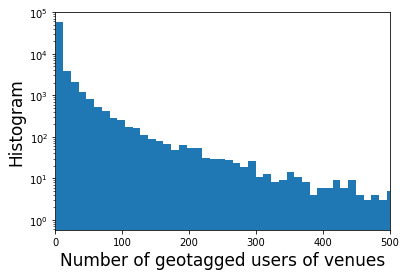

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlim(0,500)
plt.hist(venues_w_coordinate_users, bins = 250)
plt.xlabel('Number of geotagged users of venues', fontsize = 17)
plt.ylabel('Histogram', fontsize = 17)

plt.yscale('log')

# USERS GEO SPAN STUFF

In [52]:
    users_venue_coordinates = {}

    for ind, line in enumerate(open(outfolder+ 'user_info/london_FINAL_user_coordinates_raw_locals_filtered.dat')):

       # if ind == 10: break

        fields      = line.strip().split('\t')
        user        = fields[0]

        if user in users_location: 

            coordinates = [(float(fff.split(', ')[0]), float(fff.split(', ')[0])) for fff in fields[1:]]
            users_venue_coordinates[user] = coordinates

In [53]:
users_geostretch_feats = {}

for ind, (user, venues) in enumerate(users_venue_coordinates.items()):

    #if ind == 10: break
    #print user, users_location[user], venues
    
    userlng, userlat = users_location[user]  
    distances        = [mpu.haversine_distance((venlat, venlng ), (userlat, userlng)) for (venlng, venlat) in venues]
         
        
    social_stretch   = 1.0 / len(distances) * sum(distances)
    social_std       = np.std(distances)
    
    
    polygon  = 0.0
    lat, lon = zip(*venues)

    if len(lat) > 2:

        pa      = Proj("+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")
        x, y    = pa(lon, lat)
        cop     = {"type": "Polygon", "coordinates": [zip(x, y)]}
        polygon = shape(cop).area / 1000000.0
    
    
    if user not in users_geostretch_feats:
        users_geostretch_feats[user] = {}
    users_geostretch_feats[user]['social_stretch'] = social_stretch
    users_geostretch_feats[user]['social_std']     = social_std
    users_geostretch_feats[user]['polygon']        = polygon
    
    

In [54]:
len(users_geostretch_feats)

45369

In [68]:
features_of_venues_from_users = {}

for ind, (ven, users) in enumerate(venues_users.items()):
    
    if ind == 100: break
        

    'social_stretch'
    'social_std'
    social_stretch = []
    social_std     = []
    polygon        = []
        
    for user in users:
        
        if user in users_geostretch_feats:
            #print ven, user, users_geostretch_feats[user]['polygon']
            social_stretch.append(users_geostretch_feats[user]['social_stretch'])
            social_std.append(users_geostretch_feats[user]['social_std'])
            polygon.append(users_geostretch_feats[user]['polygon'])            


    
    if len(social_stretch) == 0: social_stretch = [0]
    if len(social_std)     == 0: social_std     = [0]
    if len(polygon)        == 0: polygon        = [0]

        
    social_stretch = np.asarray(social_stretch)
    social_std     = np.asarray(social_std)
    polygon        = np.asarray(polygon)
        
    features_of_venues_from_users[ven] = {}    
        
    features_of_venues_from_users[ven]['social_stretch_avg']     = np.mean(social_stretch)
    features_of_venues_from_users[ven]['social_stretch_std']     = np.std(social_stretch)
    features_of_venues_from_users[ven]['social_stretch_entropy'] = entropy(social_stretch, base = len(social_stretch))  
    features_of_venues_from_users[ven]['social_std_avg']     = np.mean(social_std)
    features_of_venues_from_users[ven]['social_std_std']     = np.std(social_std)
    features_of_venues_from_users[ven]['social_std_entropy'] = entropy(social_std, base = len(social_std))
    features_of_venues_from_users[ven]['polygon_avg']     = np.mean(polygon)  
    features_of_venues_from_users[ven]['polygon_std']     = np.std(polygon)
    features_of_venues_from_users[ven]['polygon_entropy'] = entropy(polygon, base = len(polygon))  

    
    
  


In [69]:
features_of_venues_from_users

{'4a880617f964a520f90420e3': {'polygon_avg': 0.0,
  'polygon_entropy': nan,
  'polygon_std': 0.0,
  'social_std_avg': 0.0,
  'social_std_entropy': nan,
  'social_std_std': 0.0,
  'social_stretch_avg': 0.0,
  'social_stretch_entropy': nan,
  'social_stretch_std': 0.0},
 '4ab1340cf964a520756820e3': {'polygon_avg': 0.0,
  'polygon_entropy': nan,
  'polygon_std': 0.0,
  'social_std_avg': 0.0,
  'social_std_entropy': nan,
  'social_std_std': 0.0,
  'social_stretch_avg': 0.0,
  'social_stretch_entropy': nan,
  'social_stretch_std': 0.0},
 '4abc29c3f964a520a08620e3': {'polygon_avg': 0.0,
  'polygon_entropy': nan,
  'polygon_std': 0.0,
  'social_std_avg': 0.0,
  'social_std_entropy': nan,
  'social_std_std': 0.0,
  'social_stretch_avg': 0.0,
  'social_stretch_entropy': nan,
  'social_stretch_std': 0.0},
 '4abd714cf964a5205b8a20e3': {'polygon_avg': 0.0,
  'polygon_entropy': nan,
  'polygon_std': 0.0,
  'social_std_avg': 0.0,
  'social_std_entropy': nan,
  'social_std_std': 0.0,
  'social_stretc